# Exit Poll prediction Modle

<h1>Indian Candidates for General Election Analysis & Prediction of winning</h1>
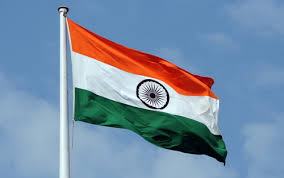
<h2>Description</h2>

### **This is data analysis of past national elections in the india and building a model to predict probable outcome of comming elections in india**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins
%config InlineBackend.figure_format = 'retina' 
plt.rcParams['figure.figsize'] = 8, 5
pd.options.mode.chained_assignment = None 
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./indian_national_level_election.csv')
national_data = pd.read_csv('./indian_national_level_election.csv')
df.tail(100)

st_name  year  pc_no    pc_name pc_type                 cand_name  \
72981  West Bengal  2014     34  Medinipur     GEN                Ashok Bera   
72982  West Bengal  2014     34  Medinipur     GEN               Kavita Rani   
72983  West Bengal  2014     34  Medinipur     GEN               Tushar Jana   
72984  West Bengal  2014     34  Medinipur     GEN         None Of The Above   
72985  West Bengal  2014     34  Medinipur     GEN       Dr. Bimal Kumar Raj   
...            ...   ...    ...        ...     ...                       ...   
73076  West Bengal  2014     42    Birbhum     GEN         None Of The Above   
73077  West Bengal  2014     42    Birbhum     GEN          Syed Siraj Jimmi   
73078  West Bengal  2014     42    Birbhum     GEN              Joy Banerjee   
73079  West Bengal  2014     42    Birbhum     GEN  Dr. Elahi Kamre Mahammad   
73080  West Bengal  2014     42    Birbhum     GEN               Satabdi Roy   

      cand_sex partyname partyabbre  totvotpoll  electors  
72981        M       AMB        AMB        7881   1499673  
72982        F       BSP        BSP        8640   1499673  
72983        M      SUCI       SUCI        9800   1499673  
72984      NaN      NOTA       NOTA       13616   1499673  
72985        M       INC        INC       48914   1499673  
...        ...       ...        ...         ...       ...  
73076      NaN      NOTA       NOTA       14557   1495089  
73077        M       INC        INC      132084   1495089  
73078        M       BJP        BJP      235753   1495089  
73079        M       CPM        CPM      393305   1495089  
73080        F      AITC       AITC      460568   1495089  

[100 rows x 11 columns]

# Explore the number of rows & columns, ranges of values etc

1) What are number of rows and columns ?

In [3]:
print('Number of rows and columns :',df.shape) # Number of rows and columns

Number of rows and columns : (73081, 11)


2. Can you describe given dataset ?

In [4]:
df.describe()

year         pc_no     totvotpoll      electors
count  73081.000000  73081.000000   73081.000000  7.308100e+04
mean    1996.779505     22.311490   49834.760266  1.122277e+06
std       10.432527     19.039793  104893.319706  3.560049e+05
min     1977.000000      1.000000       0.000000  1.947100e+04
25%     1989.000000      7.000000     872.000000  9.129850e+05
50%     1996.000000     18.000000    2743.000000  1.099503e+06
75%     2004.000000     33.000000   19185.000000  1.329086e+06
max     2014.000000     85.000000  863358.000000  3.368399e+06

4).column types

In [5]:
df.dtypes

st_name       object
year           int64
pc_no          int64
pc_name       object
pc_type       object
cand_name     object
cand_sex      object
partyname     object
partyabbre    object
totvotpoll     int64
electors       int64
dtype: object

4) check count of missing values ?

In [6]:
national_data.isna().sum()   

st_name          0
year             0
pc_no            0
pc_name          0
pc_type       8070
cand_name        0
cand_sex       542
partyname        0
partyabbre       0
totvotpoll       0
electors         0
dtype: int64

#### Observations:   pc_type has 8070 and cand_sex has 542 missing or null values


### Percentage of missing values

In [7]:
df1 = df[df['partyname']!= 'NOTA']
percentage_missing_values = round(df1.isnull().sum()*100/len(df1),2).reset_index()
percentage_missing_values.columns = ['column_name','percentage_missing_values']
percentage_missing_values = percentage_missing_values.sort_values('percentage_missing_values',ascending = False)
percentage_missing_values

column_name  percentage_missing_values
4      pc_type                      11.13
0      st_name                       0.00
1         year                       0.00
2        pc_no                       0.00
3      pc_name                       0.00
5    cand_name                       0.00
6     cand_sex                       0.00
7    partyname                       0.00
8   partyabbre                       0.00
9   totvotpoll                       0.00
10    electors                       0.00

If we exclude NOTA(None Of The Above) rows, there are no missing values.

***to check columns of data***

In [8]:
df.columns

Index(['st_name', 'year', 'pc_no', 'pc_name', 'pc_type', 'cand_name',
       'cand_sex', 'partyname', 'partyabbre', 'totvotpoll', 'electors'],
      dtype='object')

**5. What are the top 5 parties that got most votes in Uttar Pradesh?**

In [9]:
data_2014 = national_data[national_data['year'] == 2014]
up_data_2014 = data_2014[data_2014['st_name'] =='Uttar Pradesh']
up_data_2014_max_voted_party = up_data_2014.groupby('partyabbre')['totvotpoll'].sum()
up_data_2014_max_voted_party = pd.DataFrame(up_data_2014_max_voted_party)
up_data_2014_max_voted_party = up_data_2014_max_voted_party.sort_values(by= 'totvotpoll',ascending=False)
up_data_2014_top5_max_voted_party = up_data_2014_max_voted_party.head(5)
up_data_2014_top5_max_voted_party = up_data_2014_top5_max_voted_party.reset_index()
up_data_2014_top5_max_voted_party 

partyabbre  totvotpoll
0        BJP    34318854
1         SP    17988967
2        BSP    15914194
3        INC     6061267
4        IND     1414869

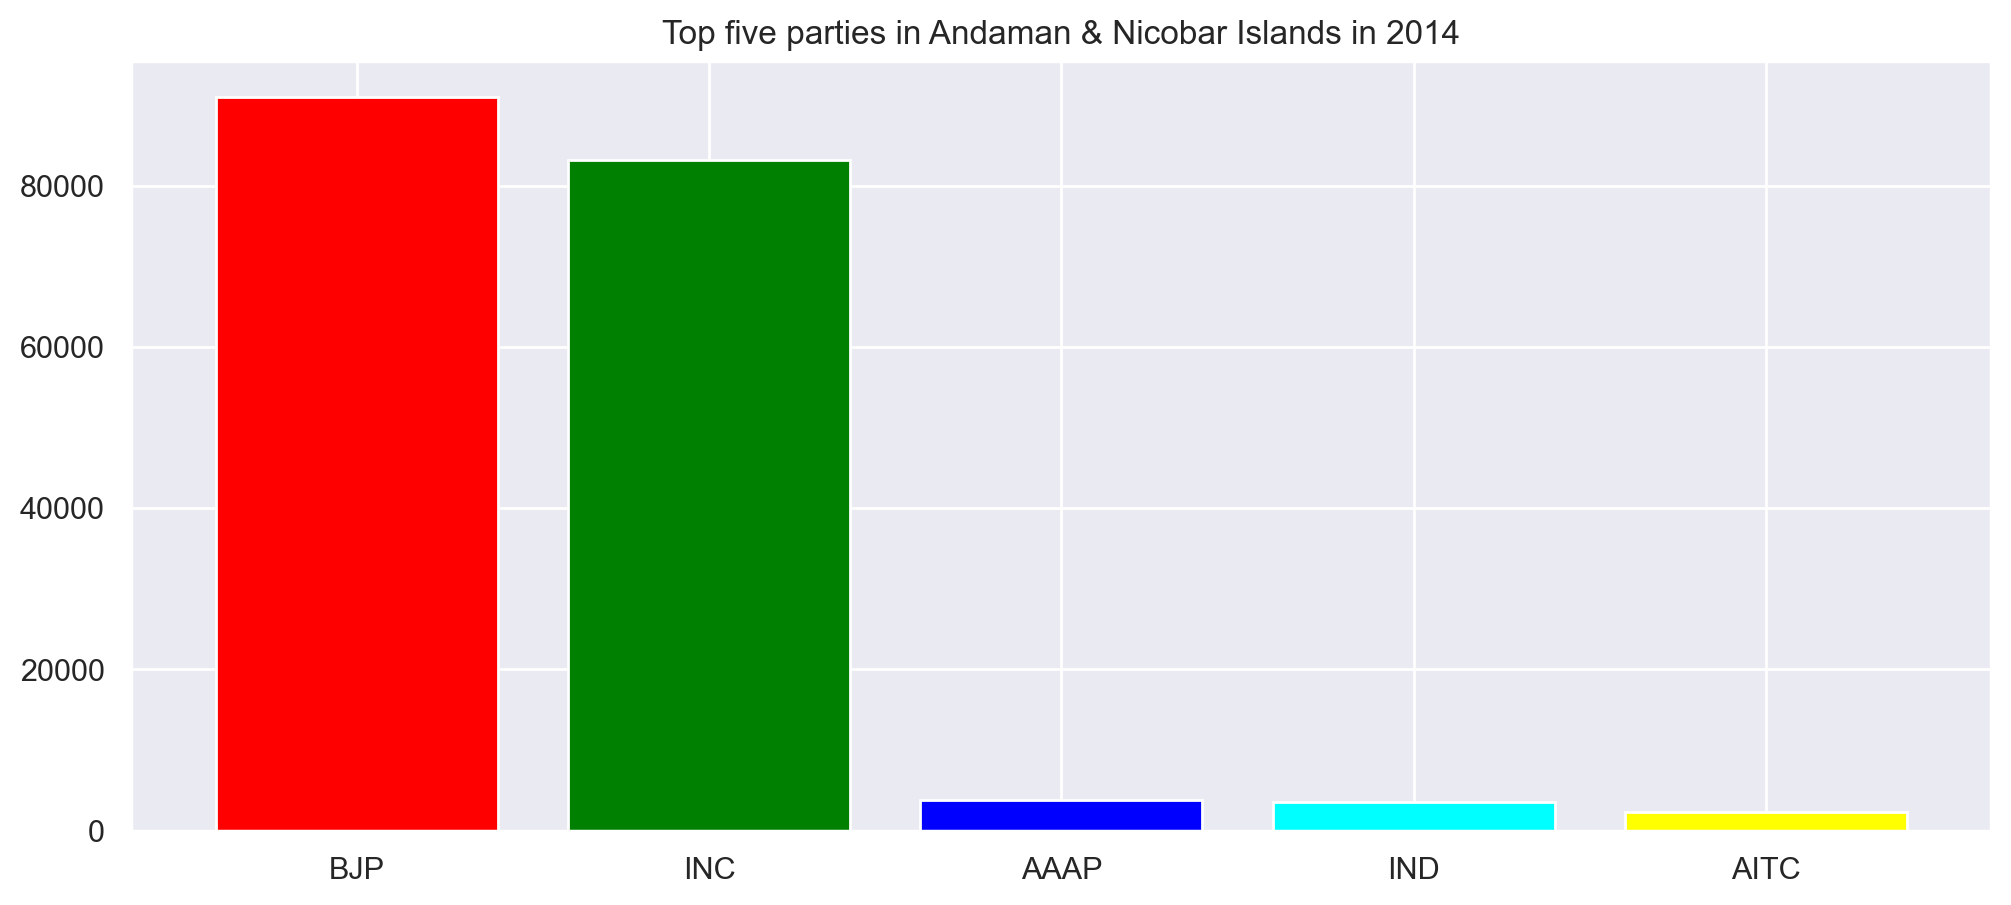

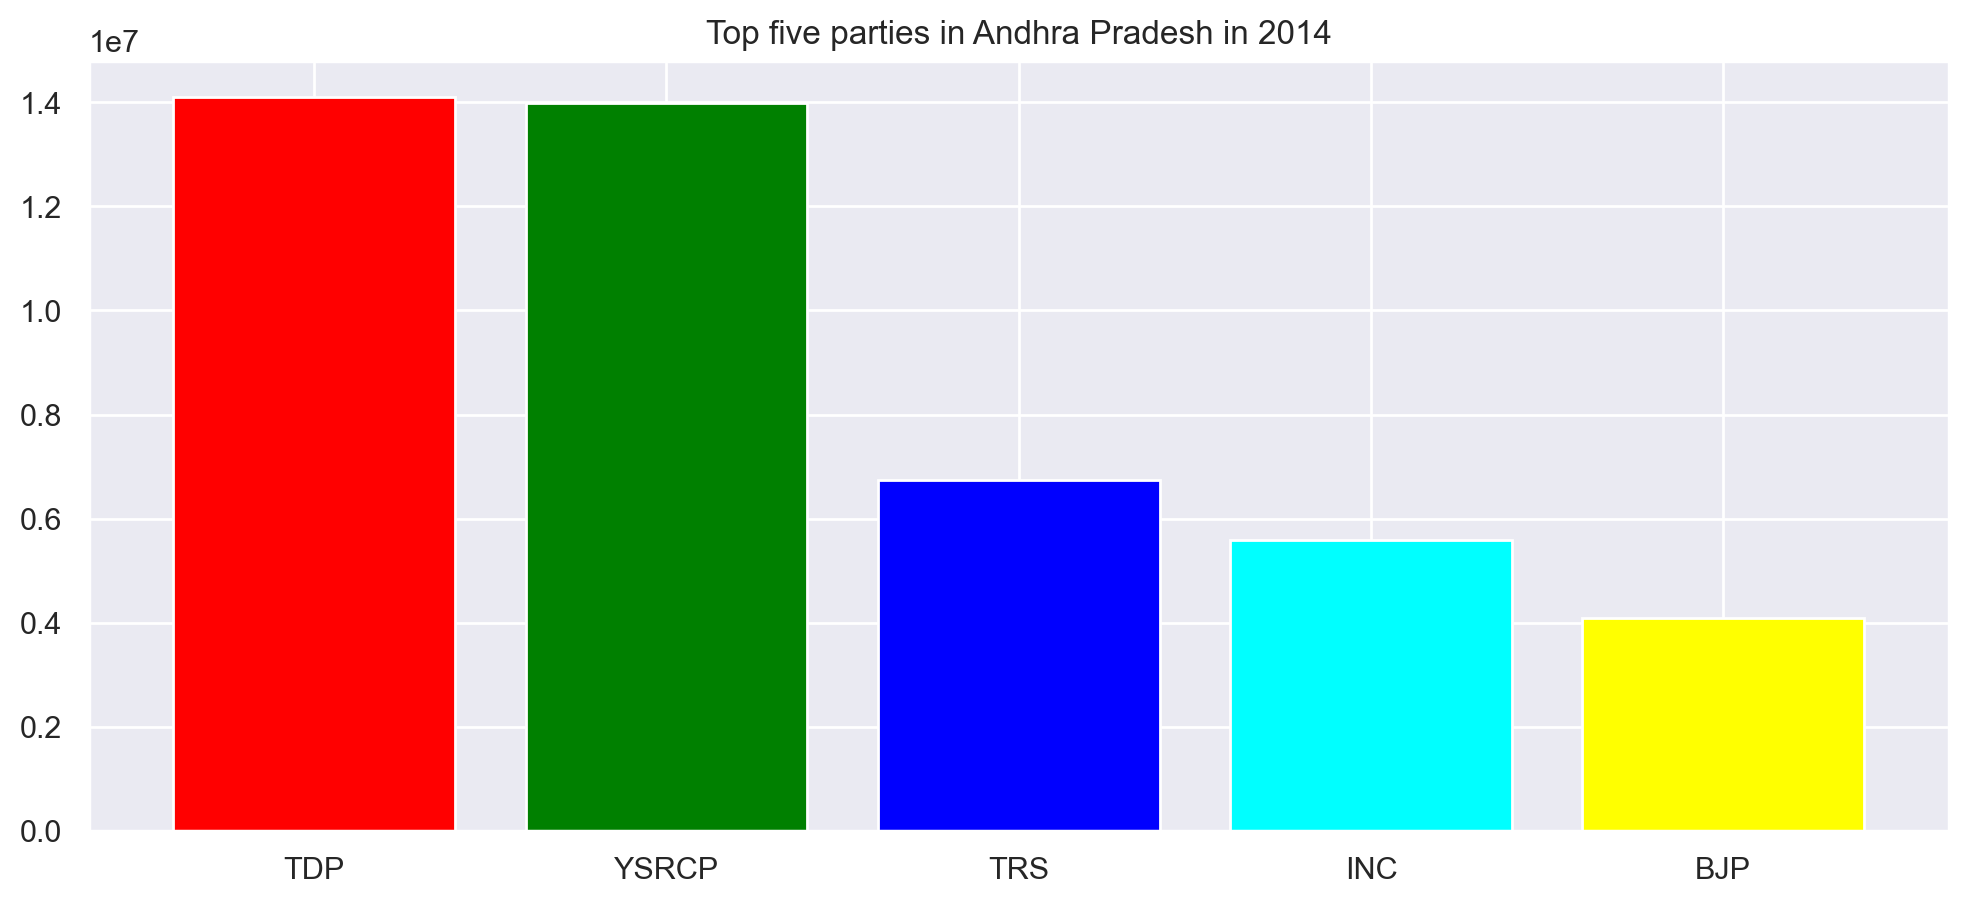

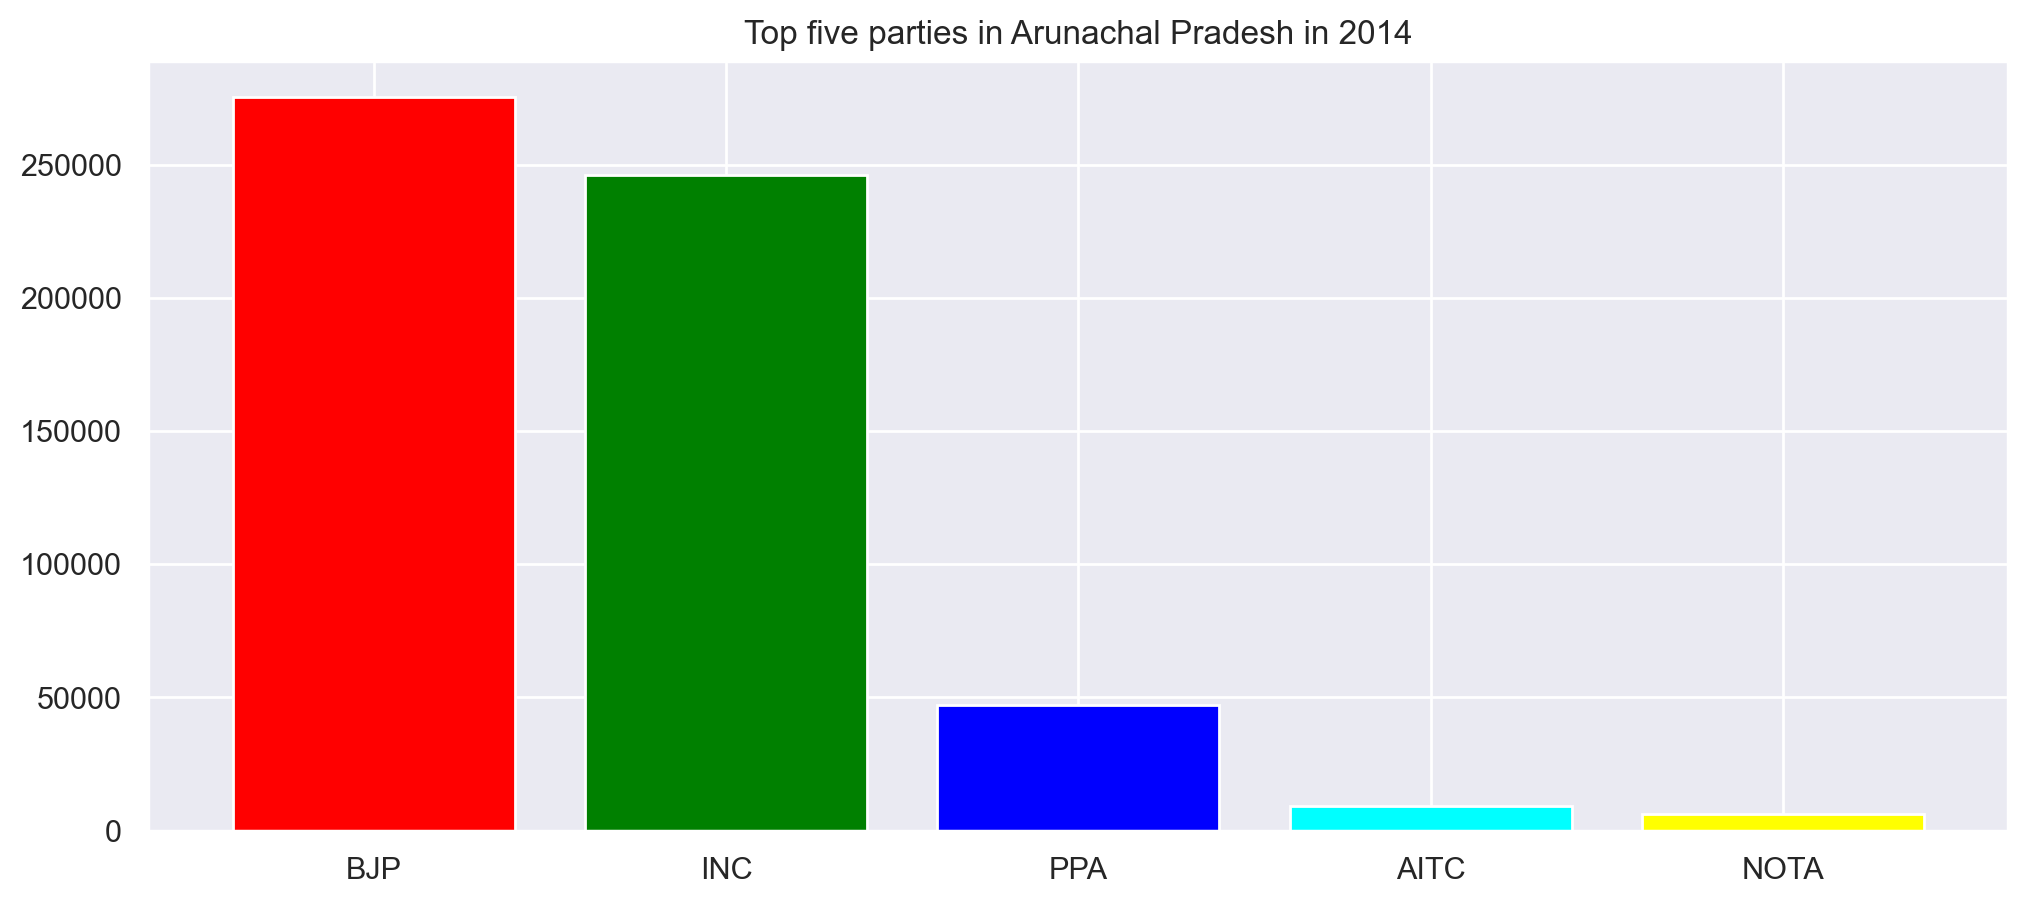

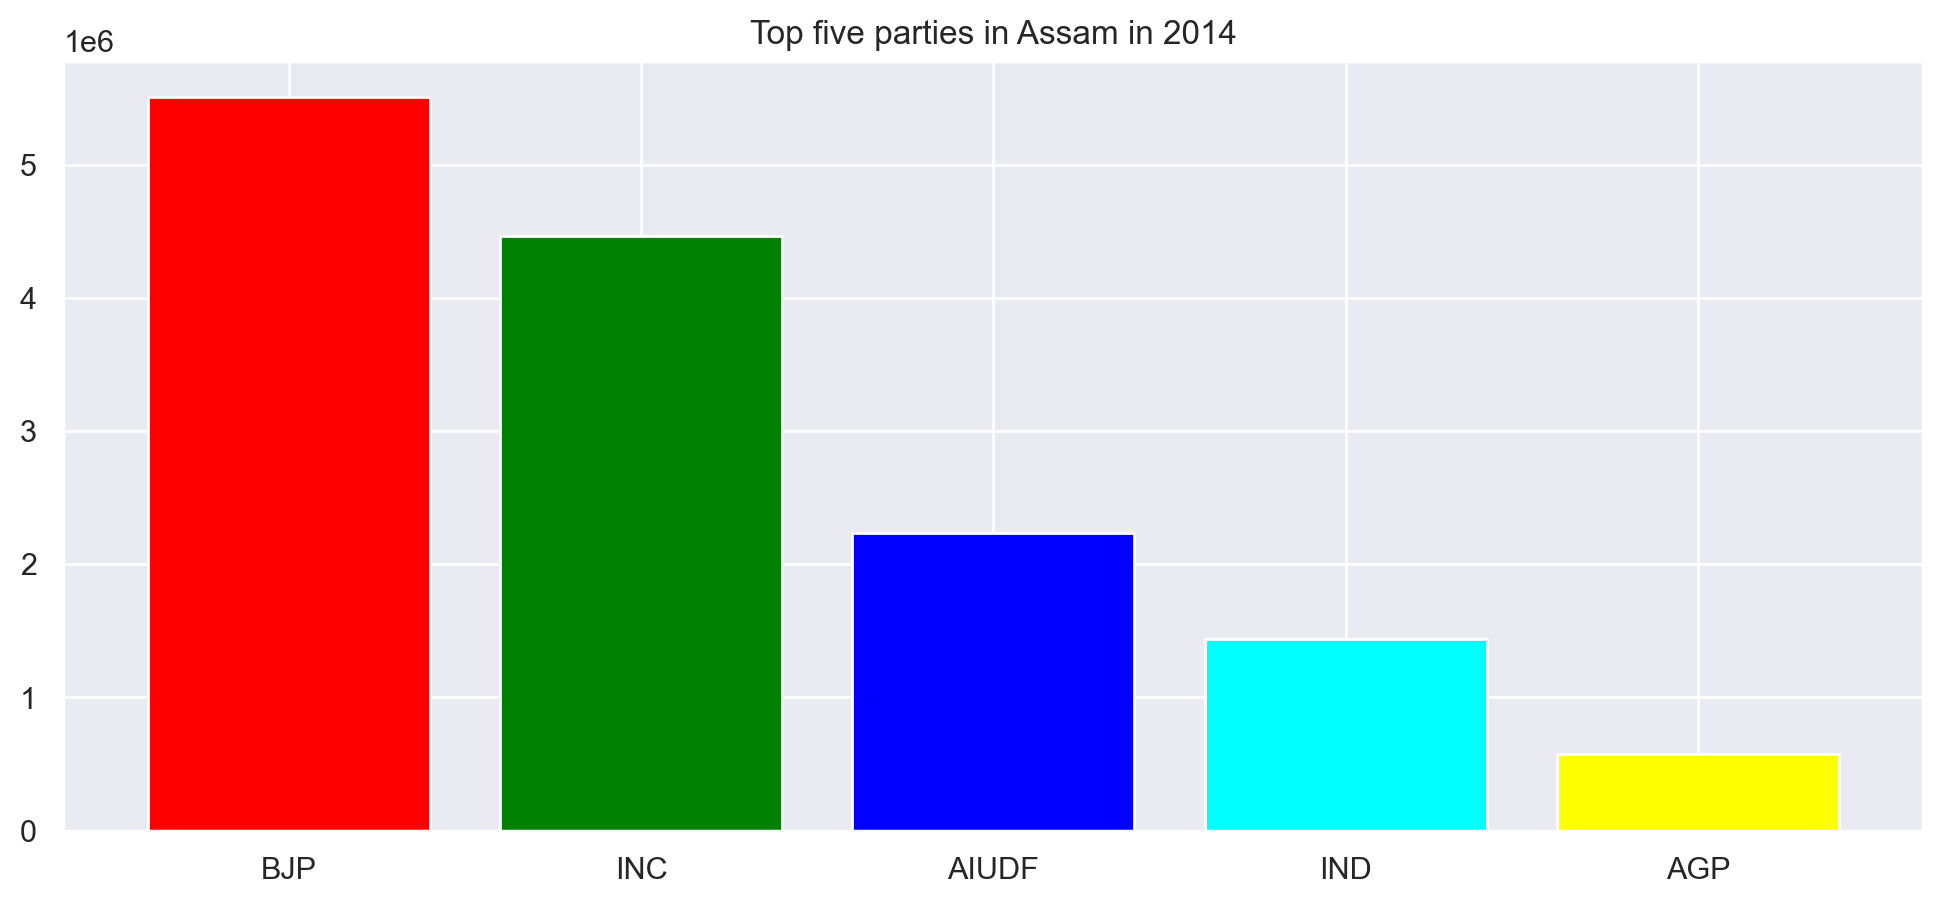

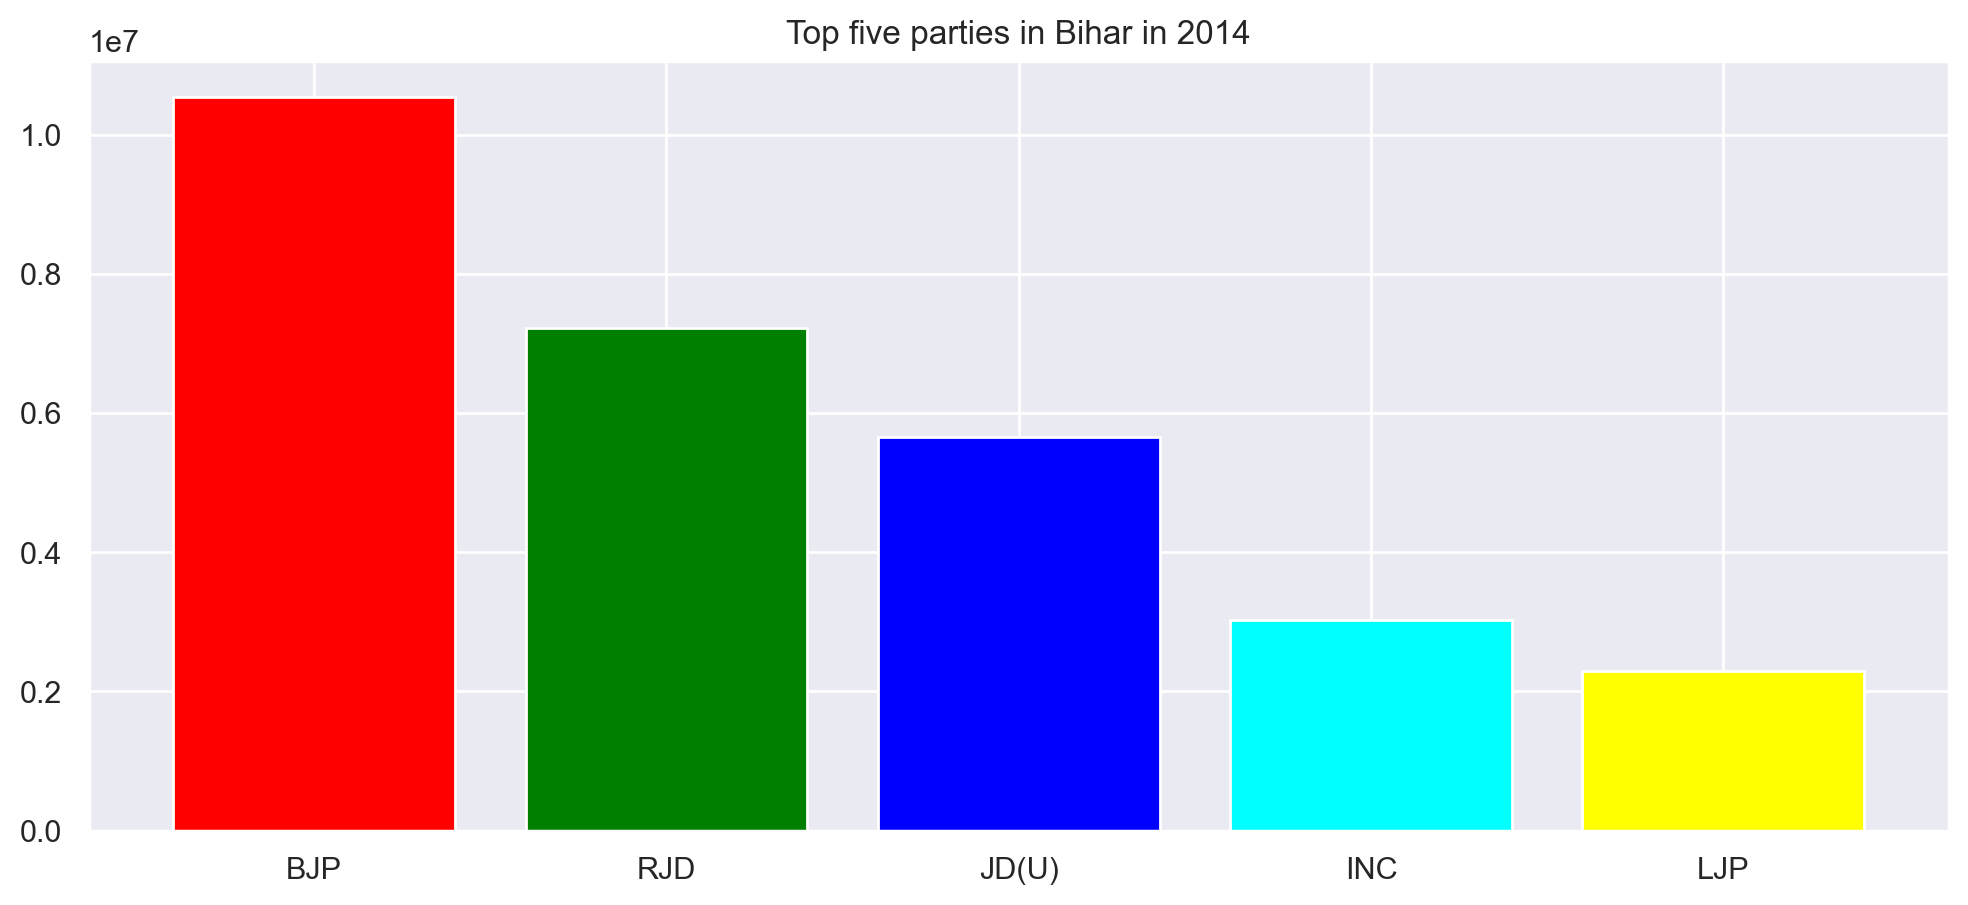

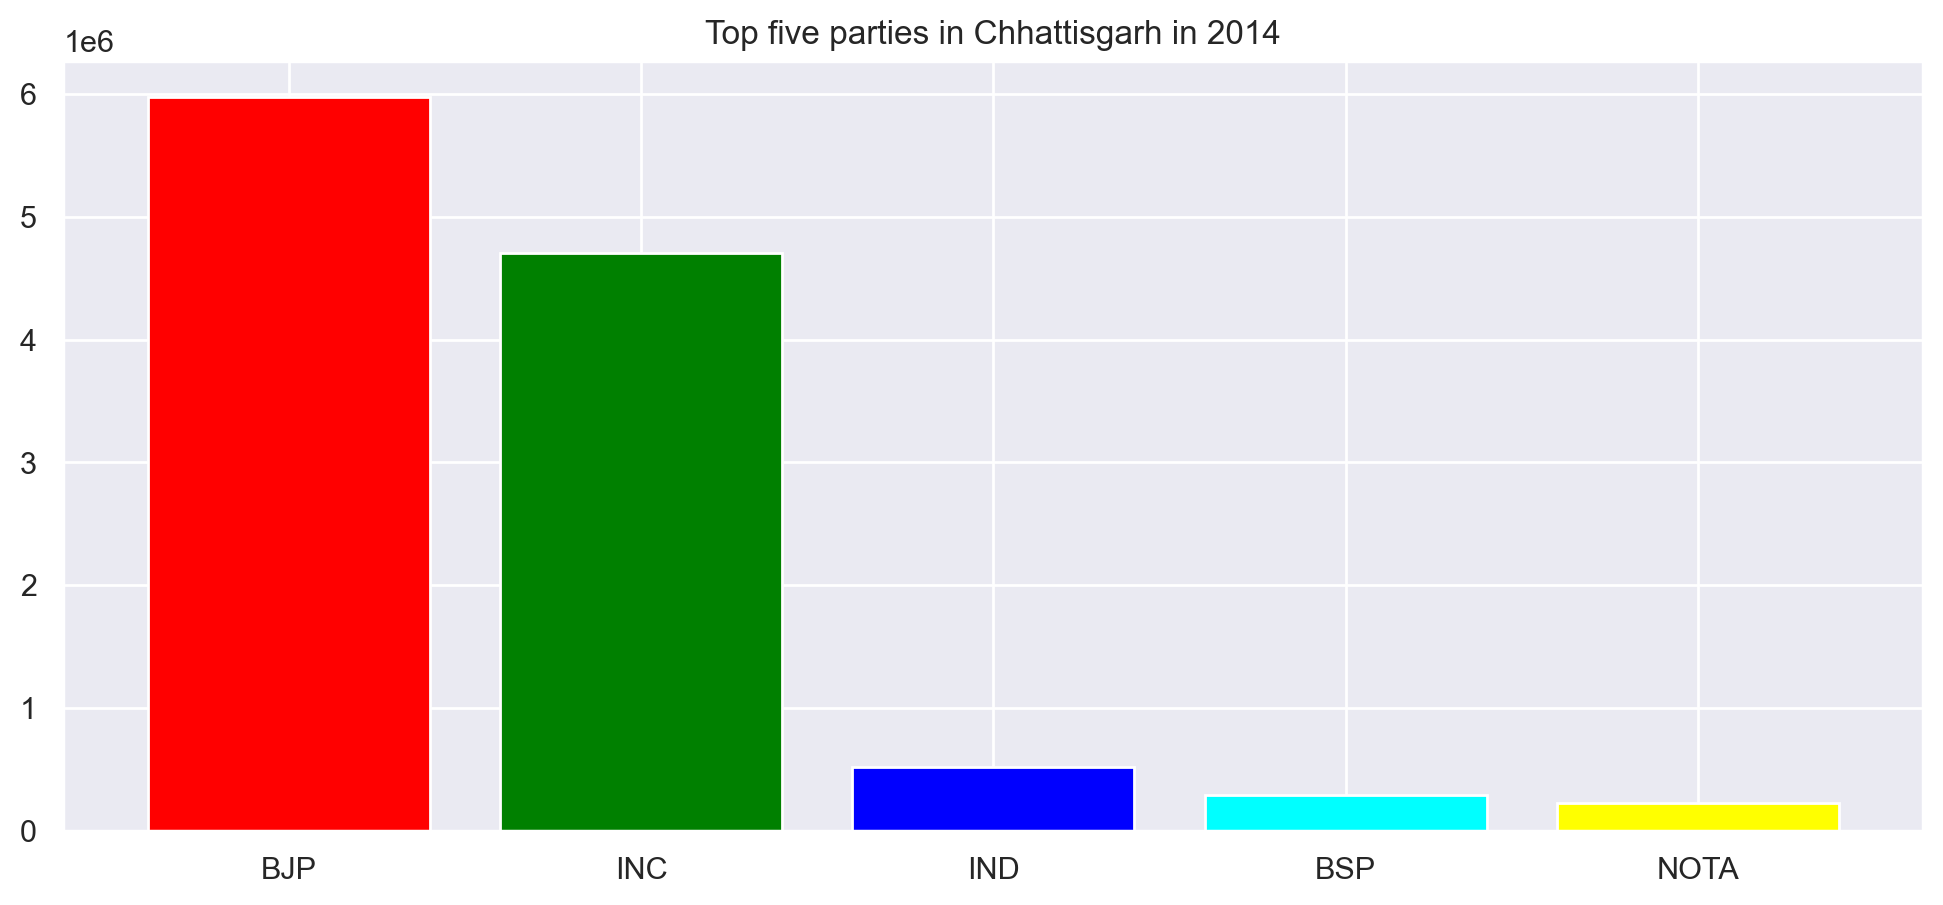

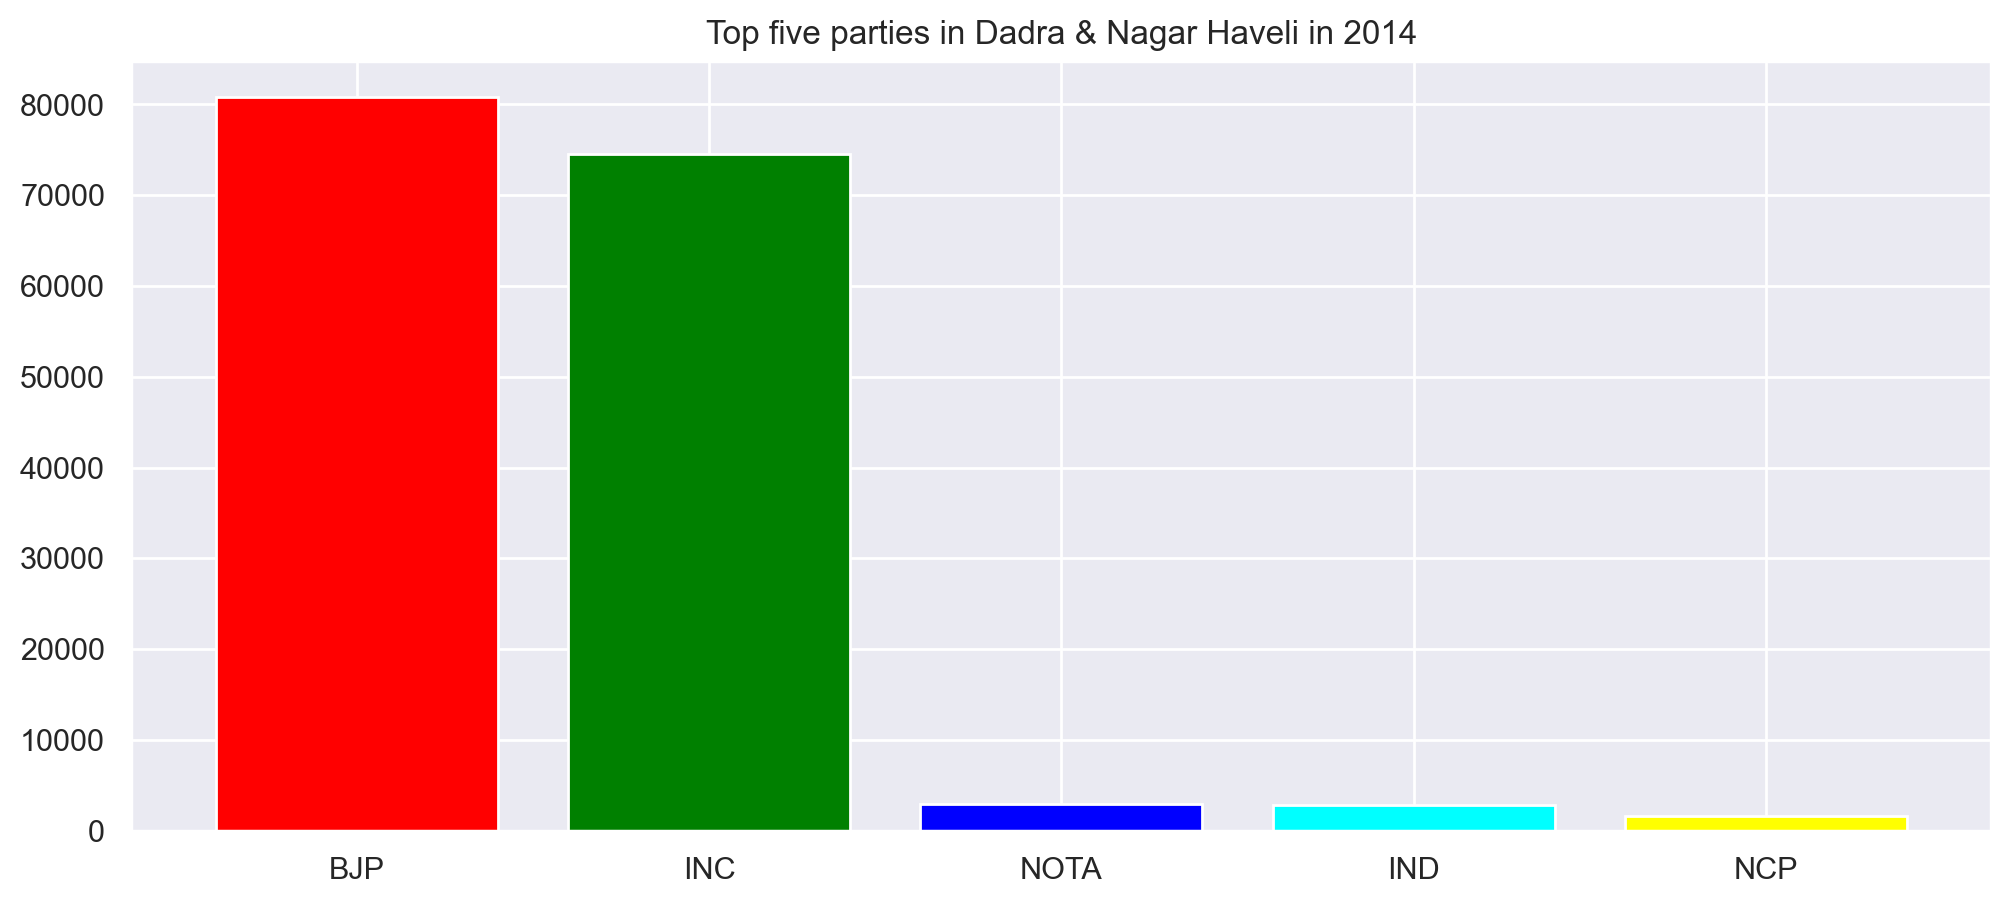

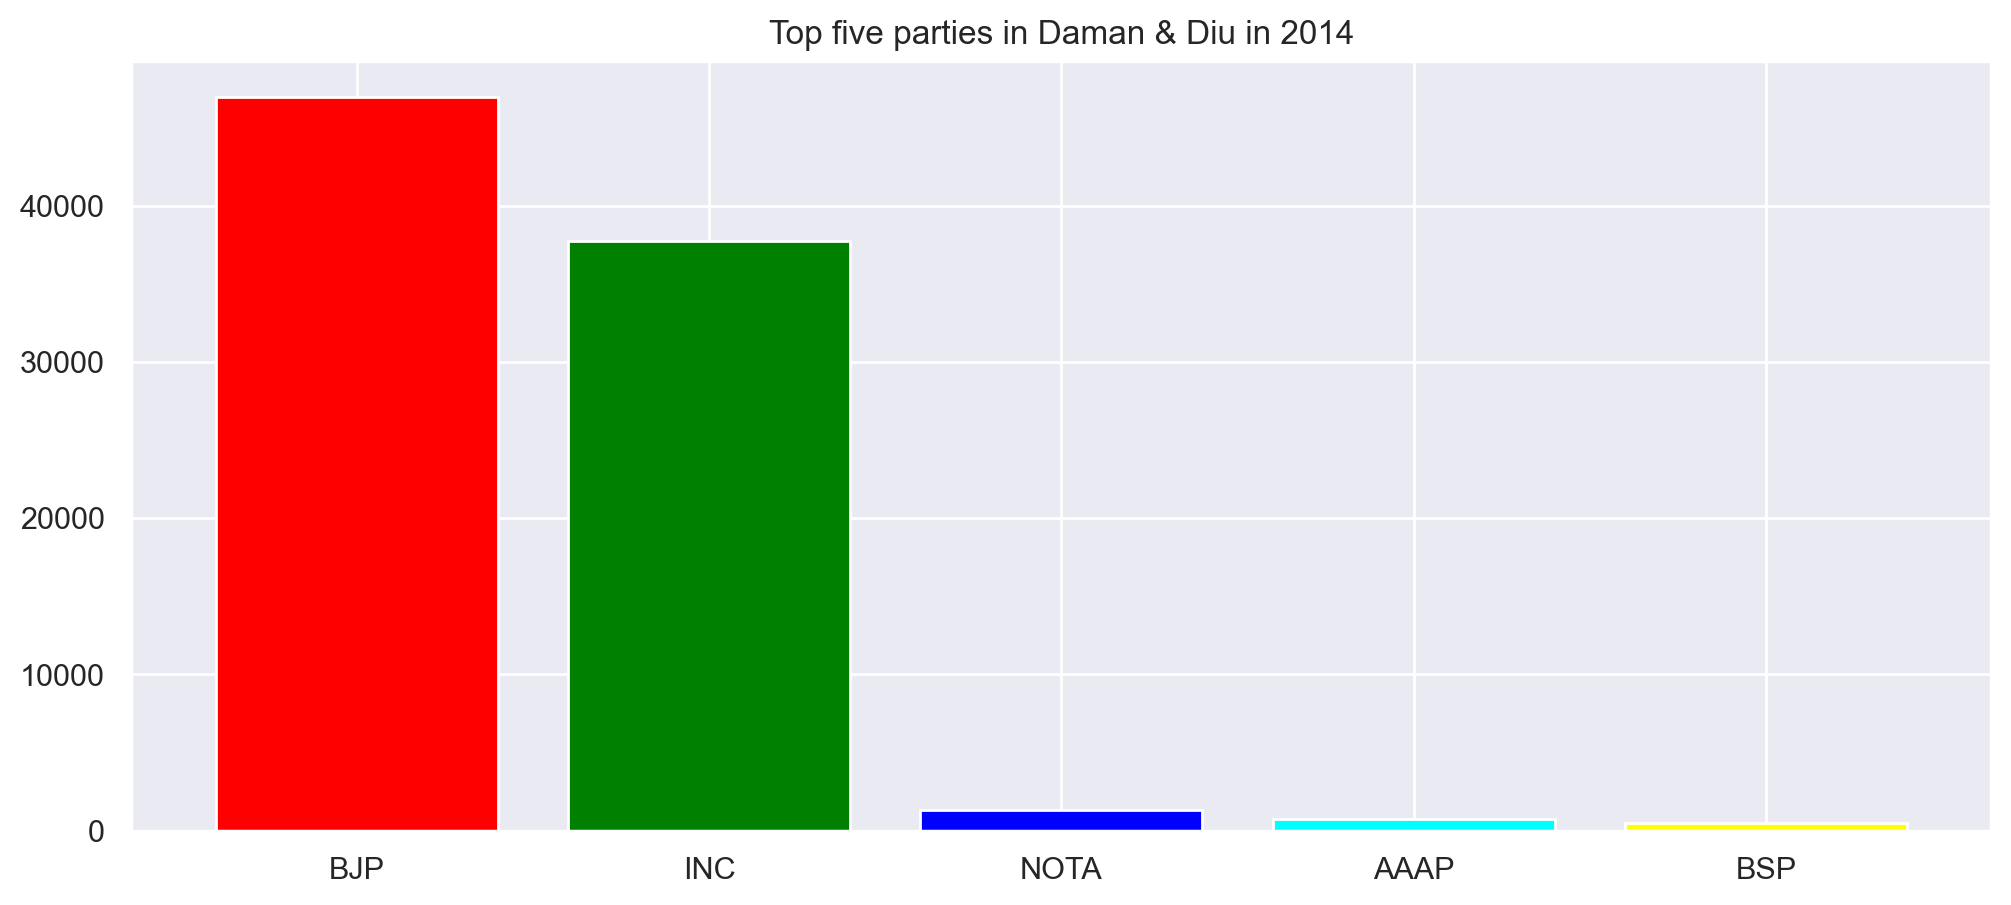

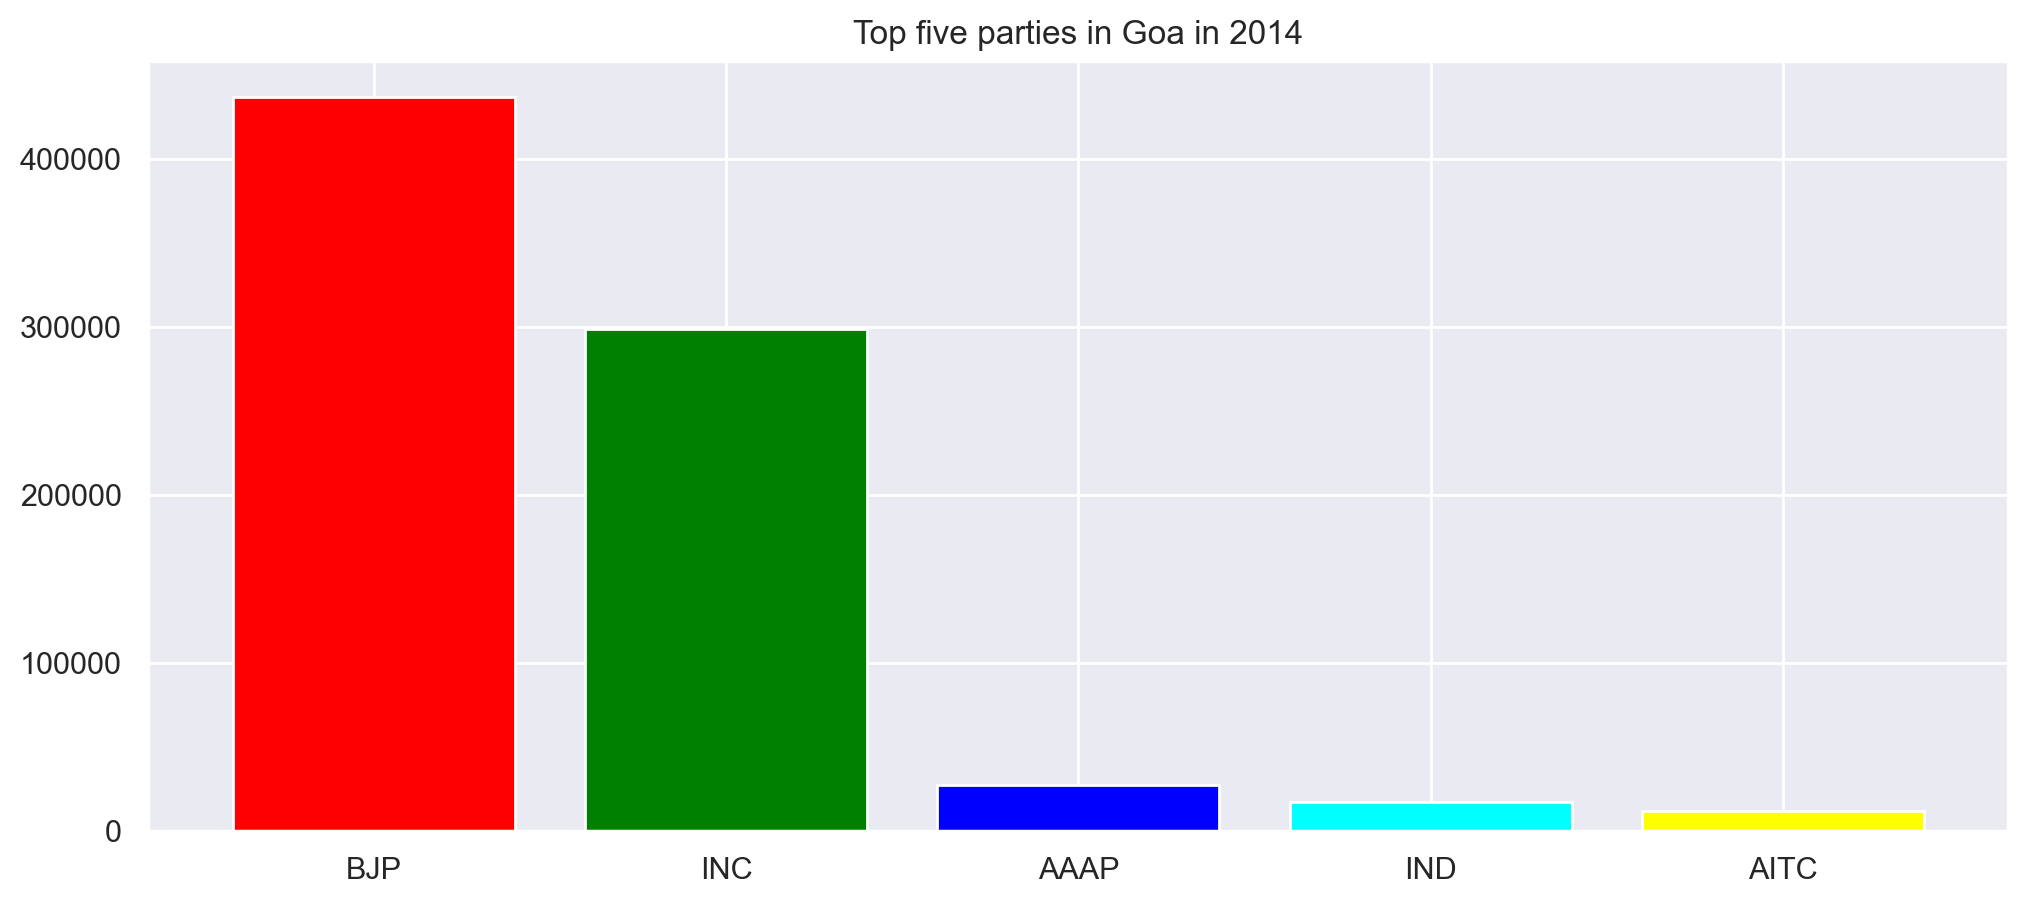

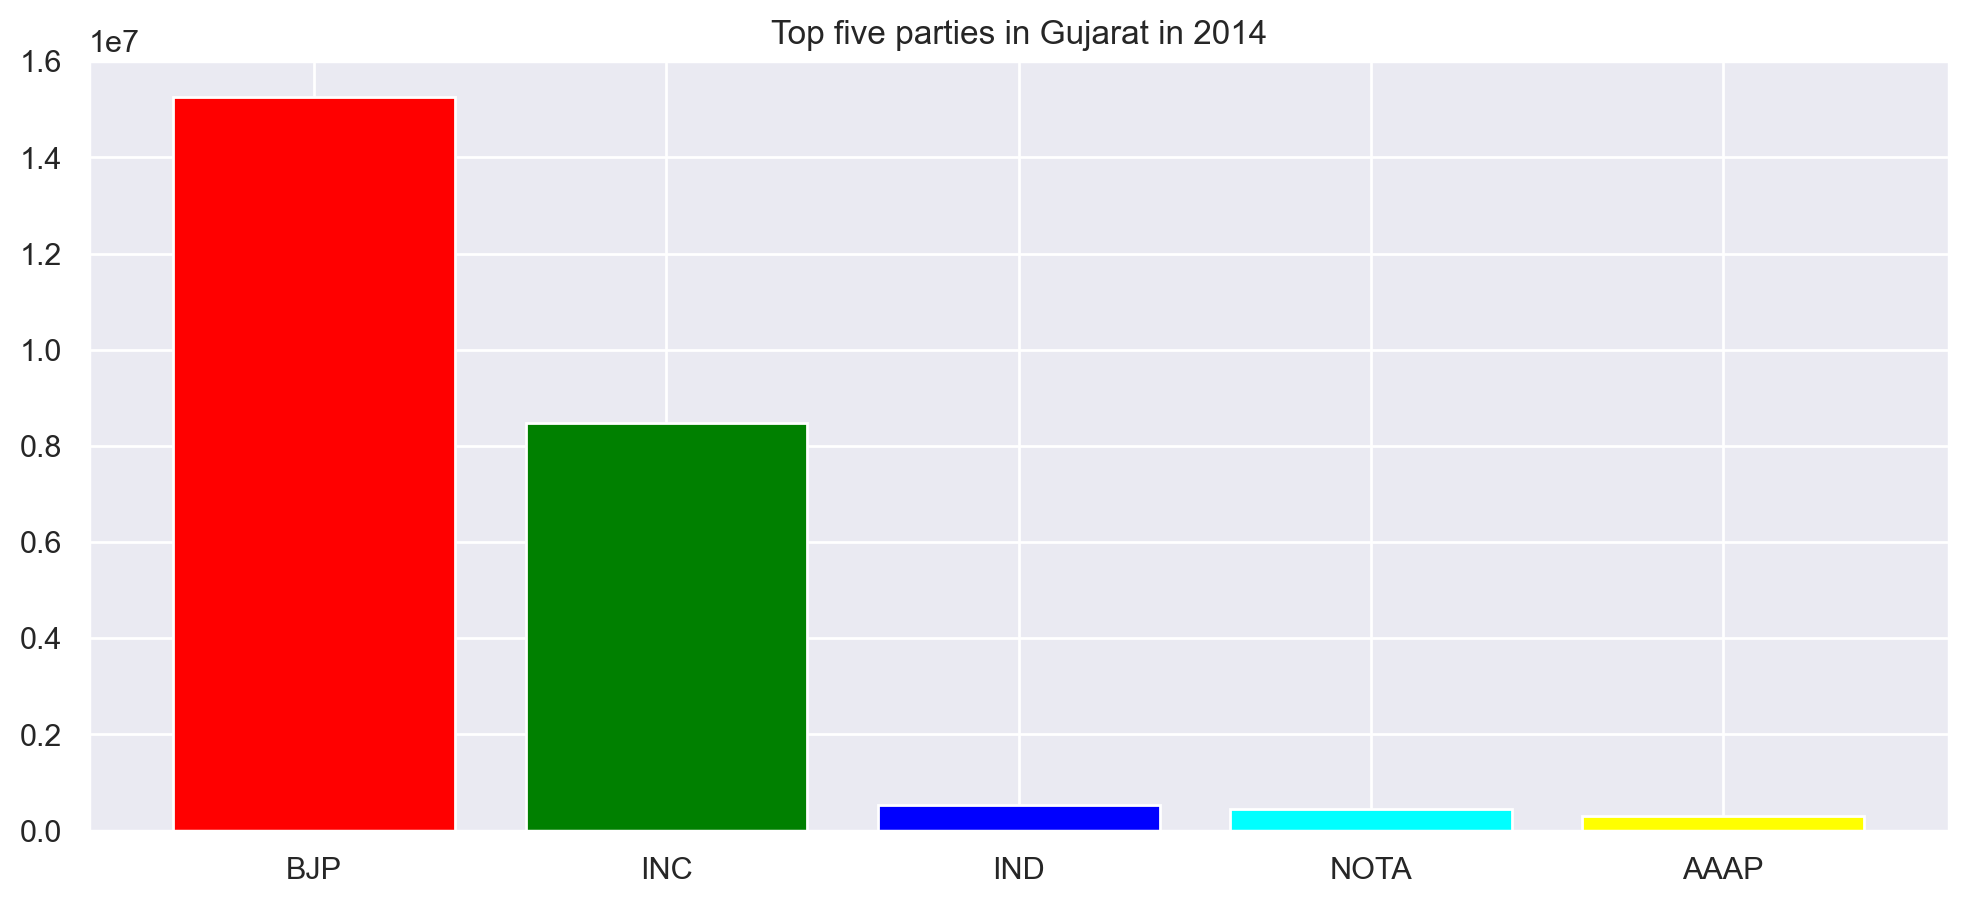

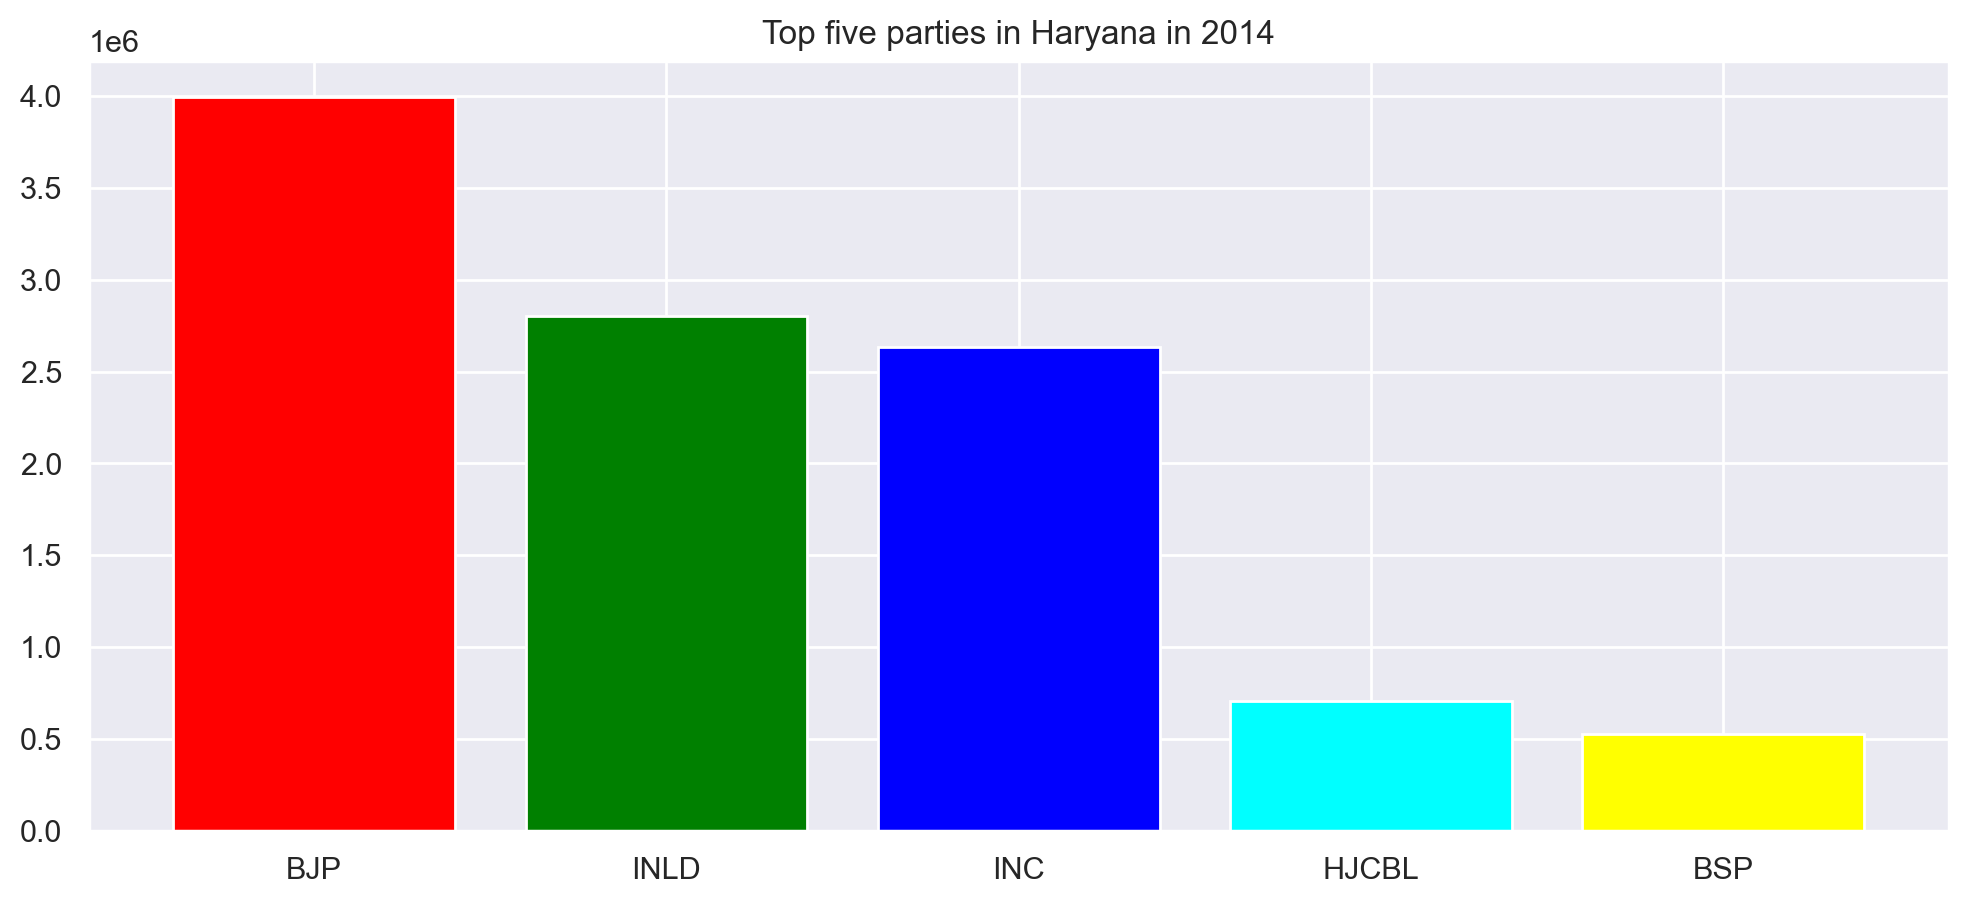

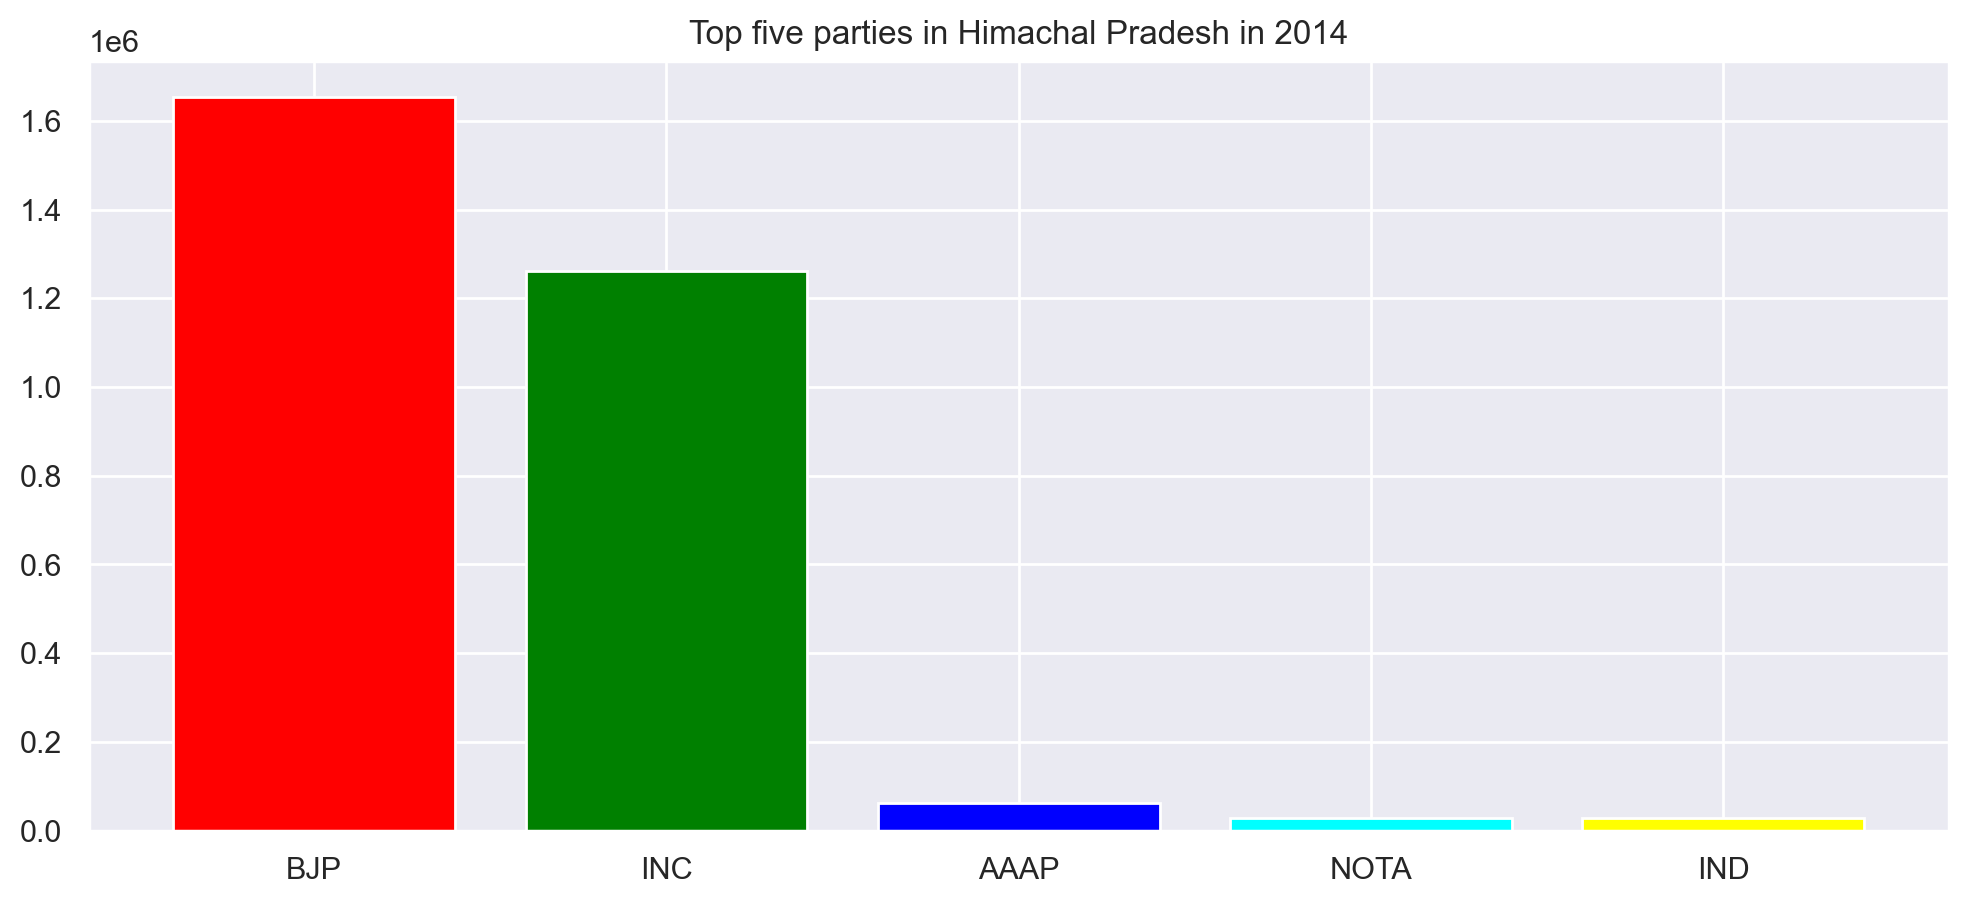

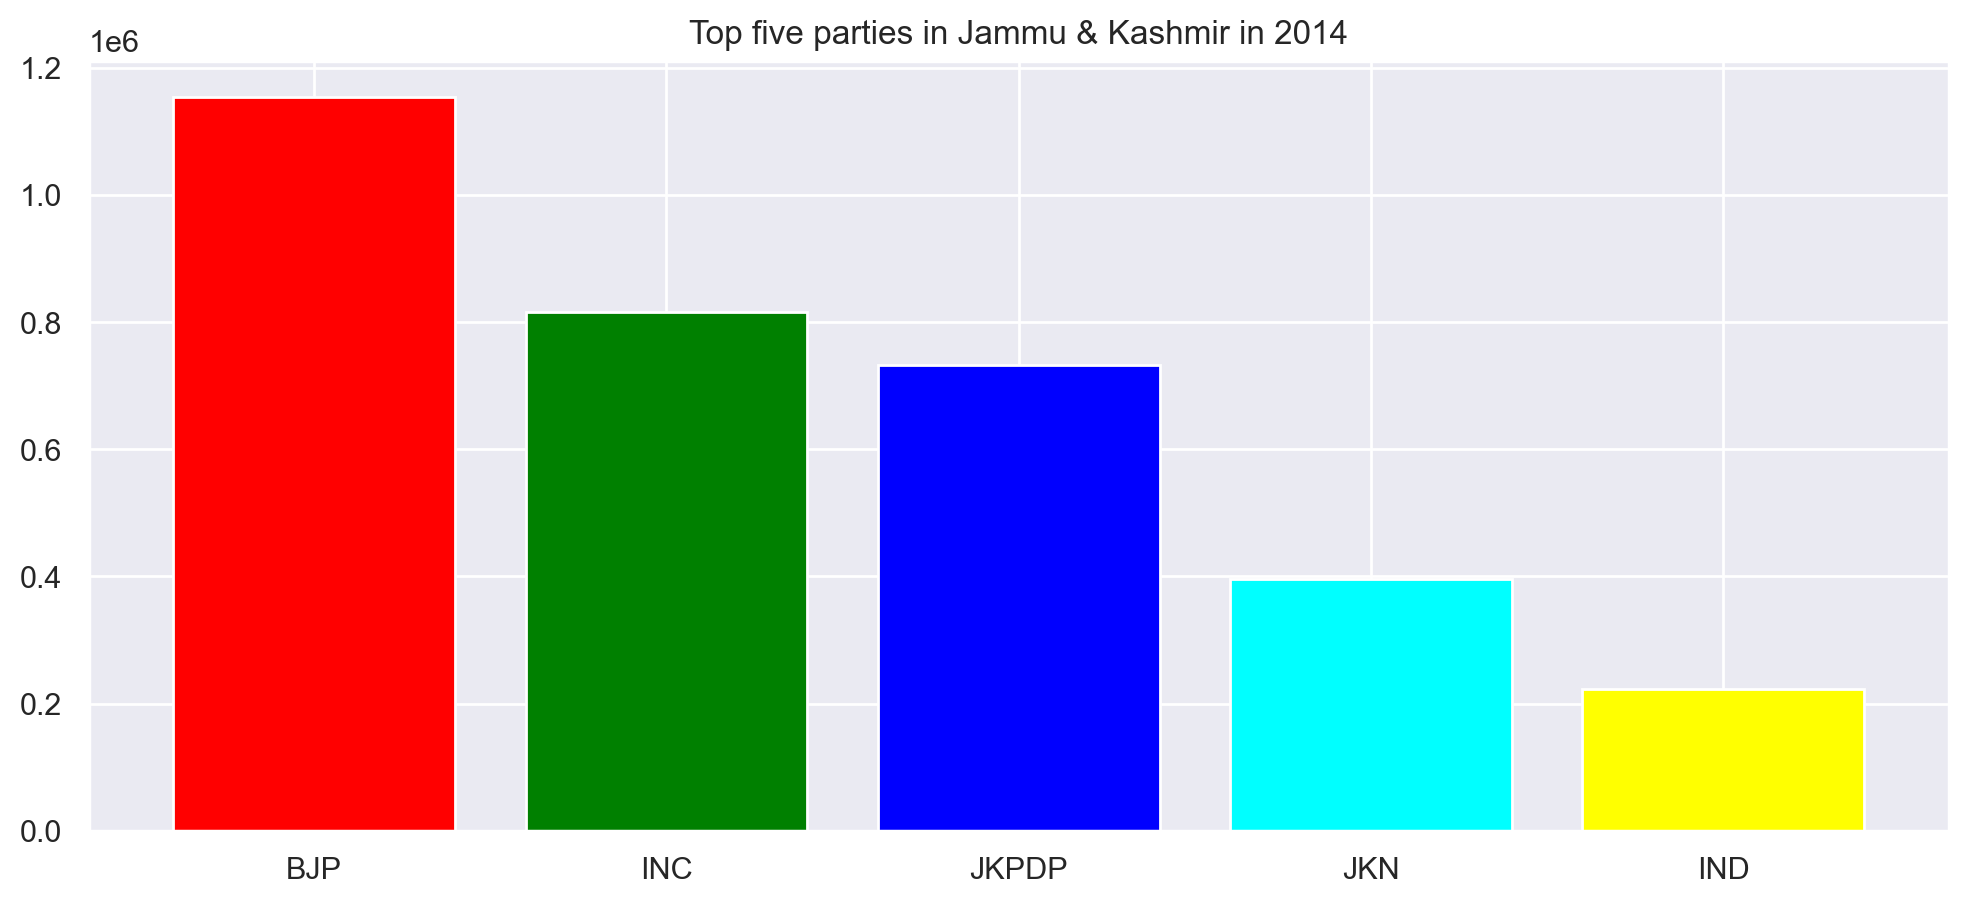

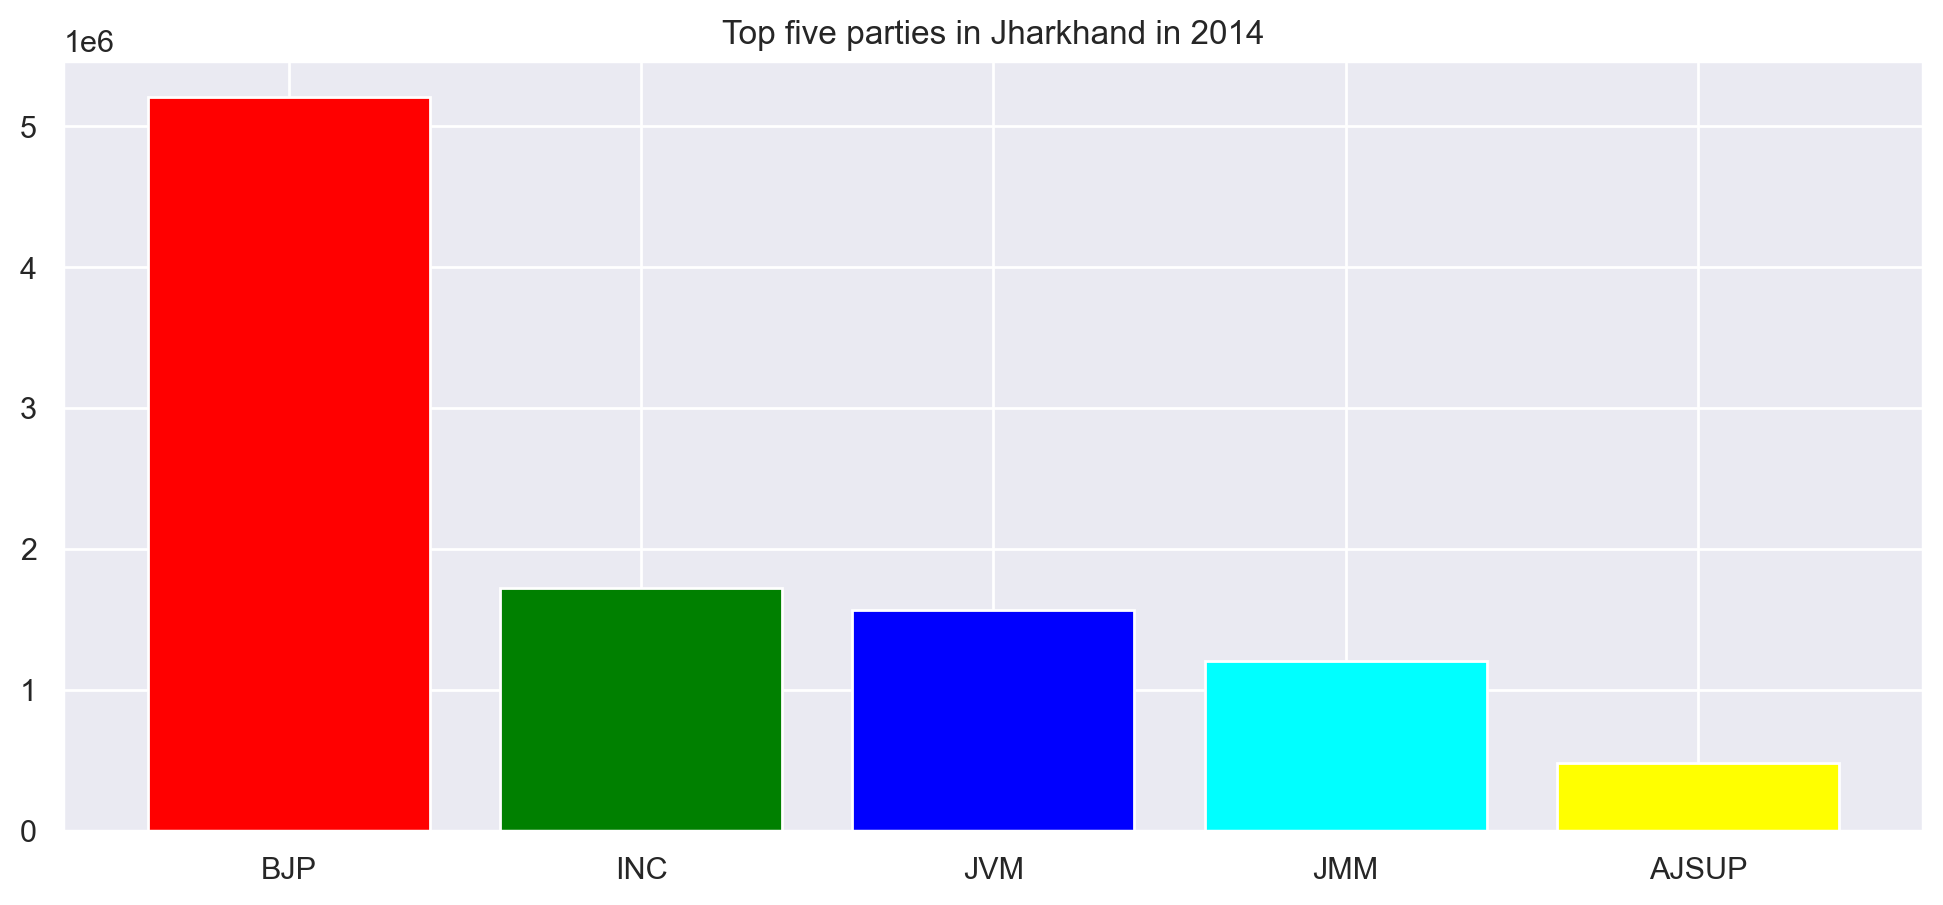

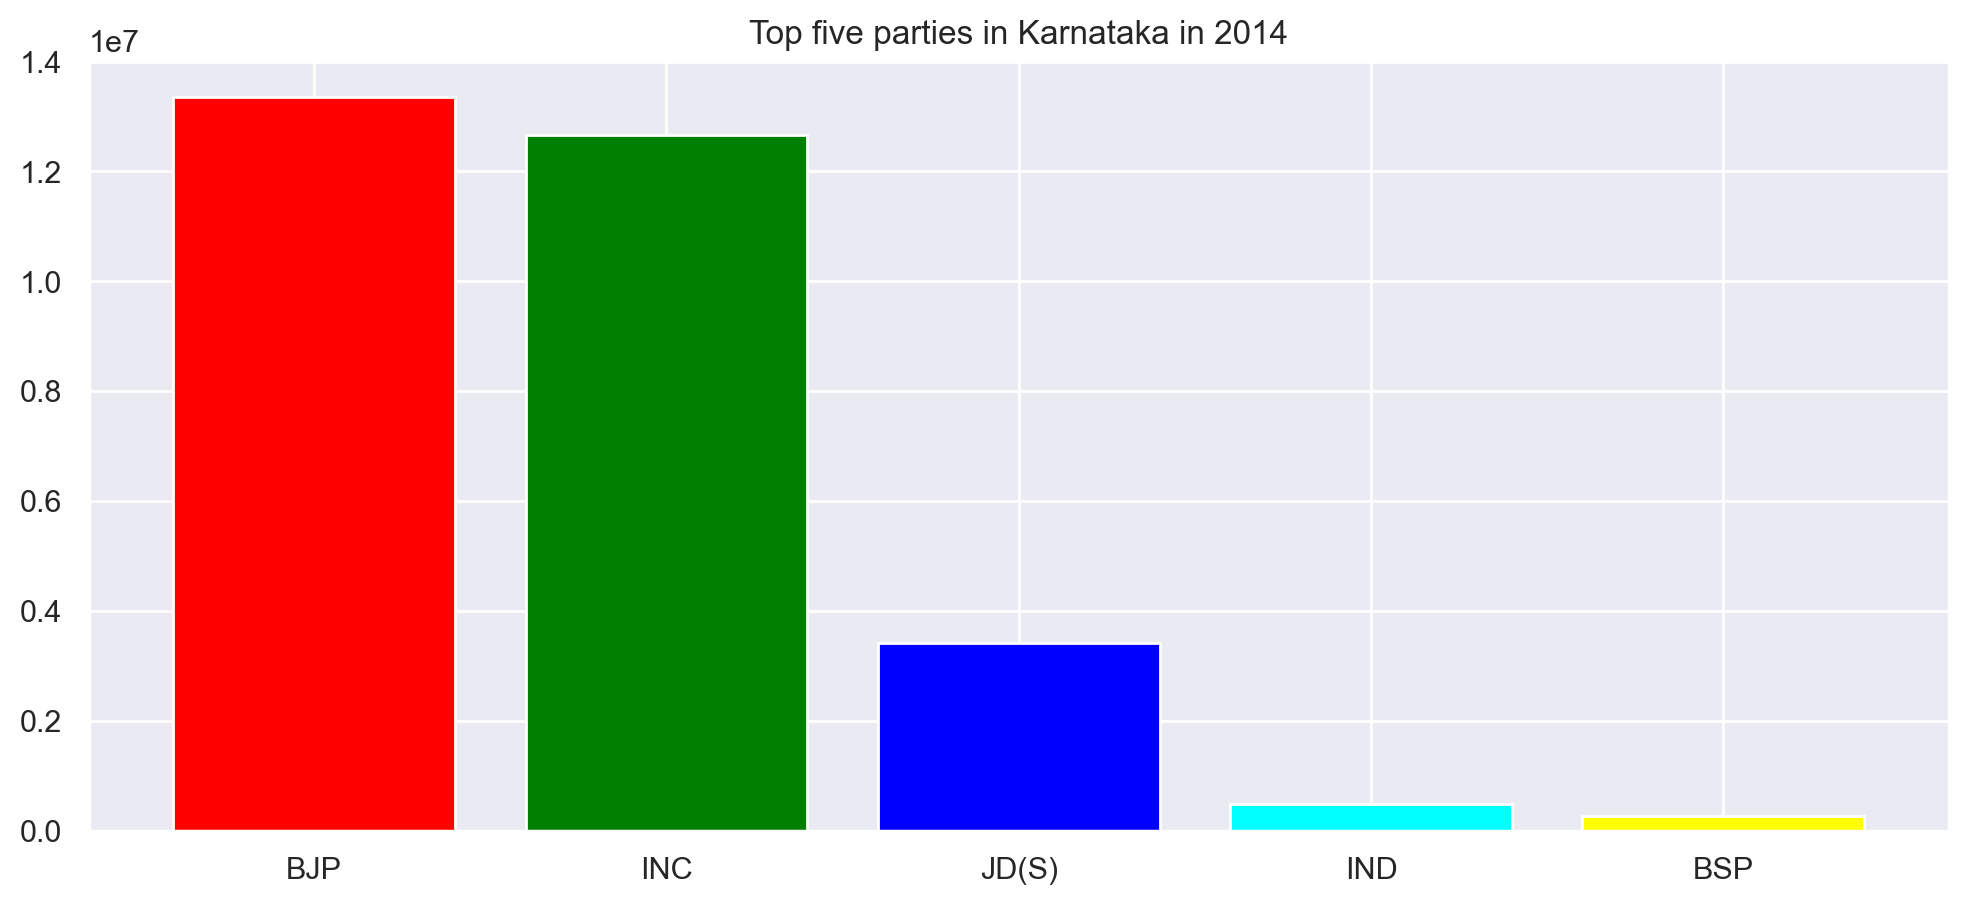

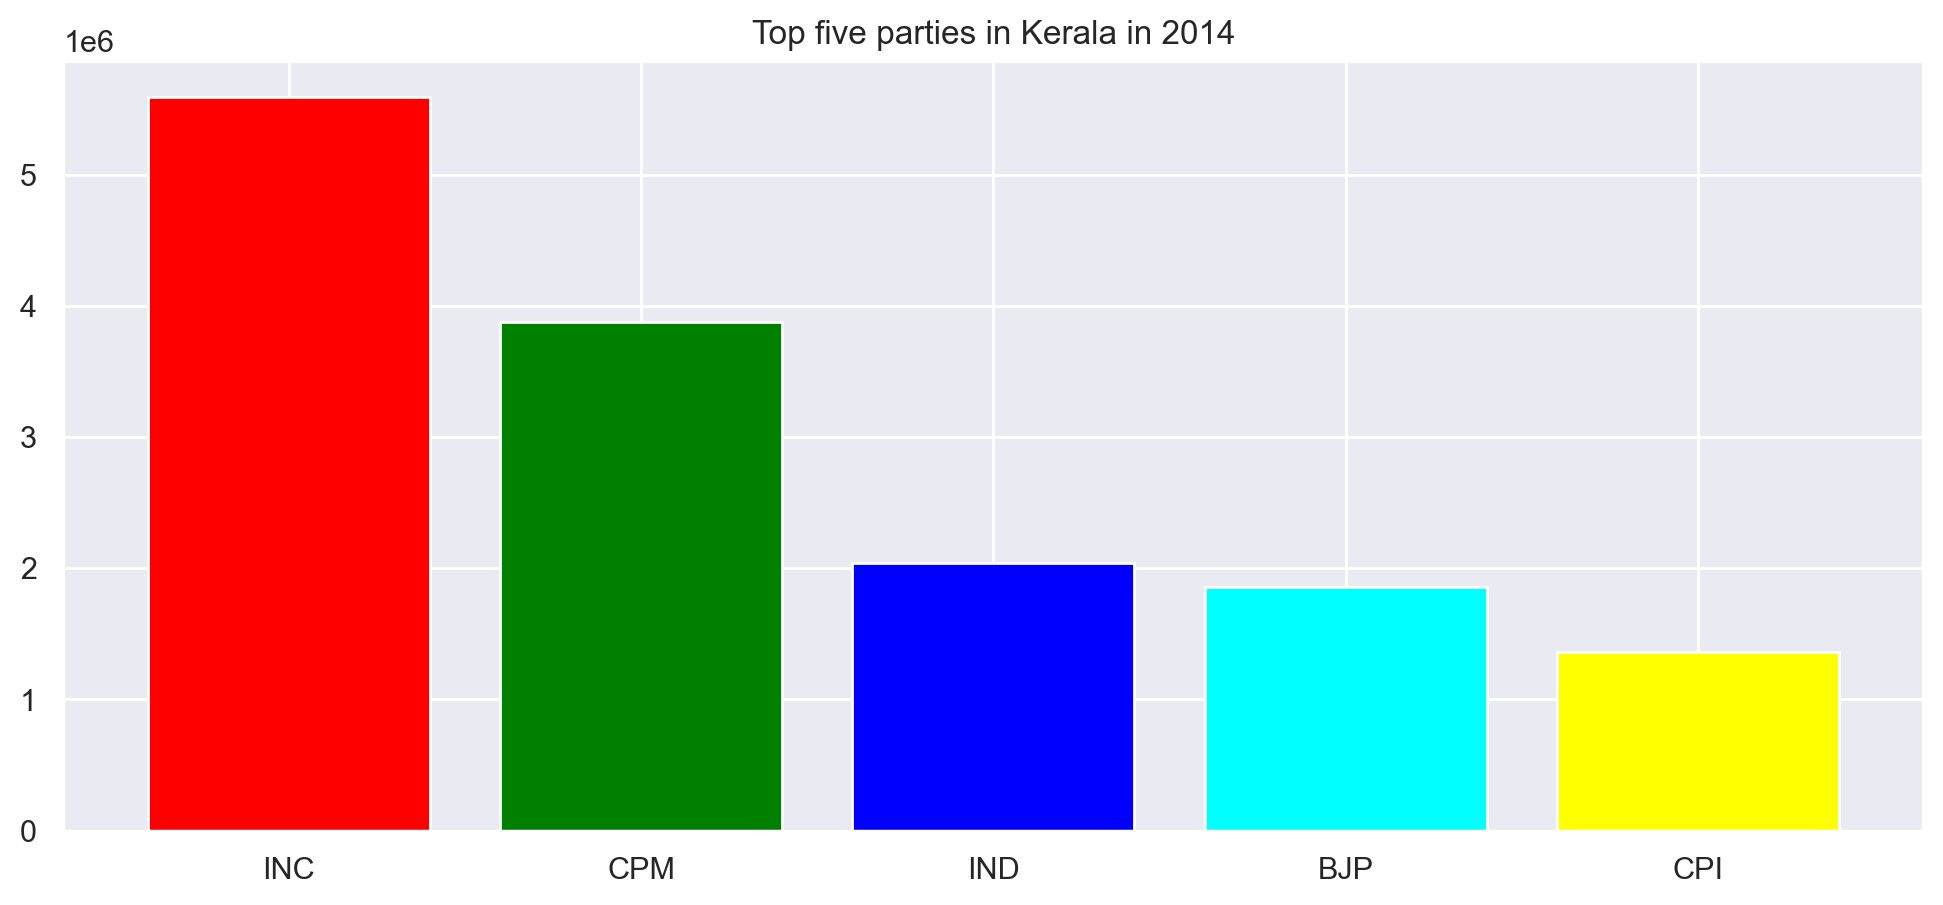

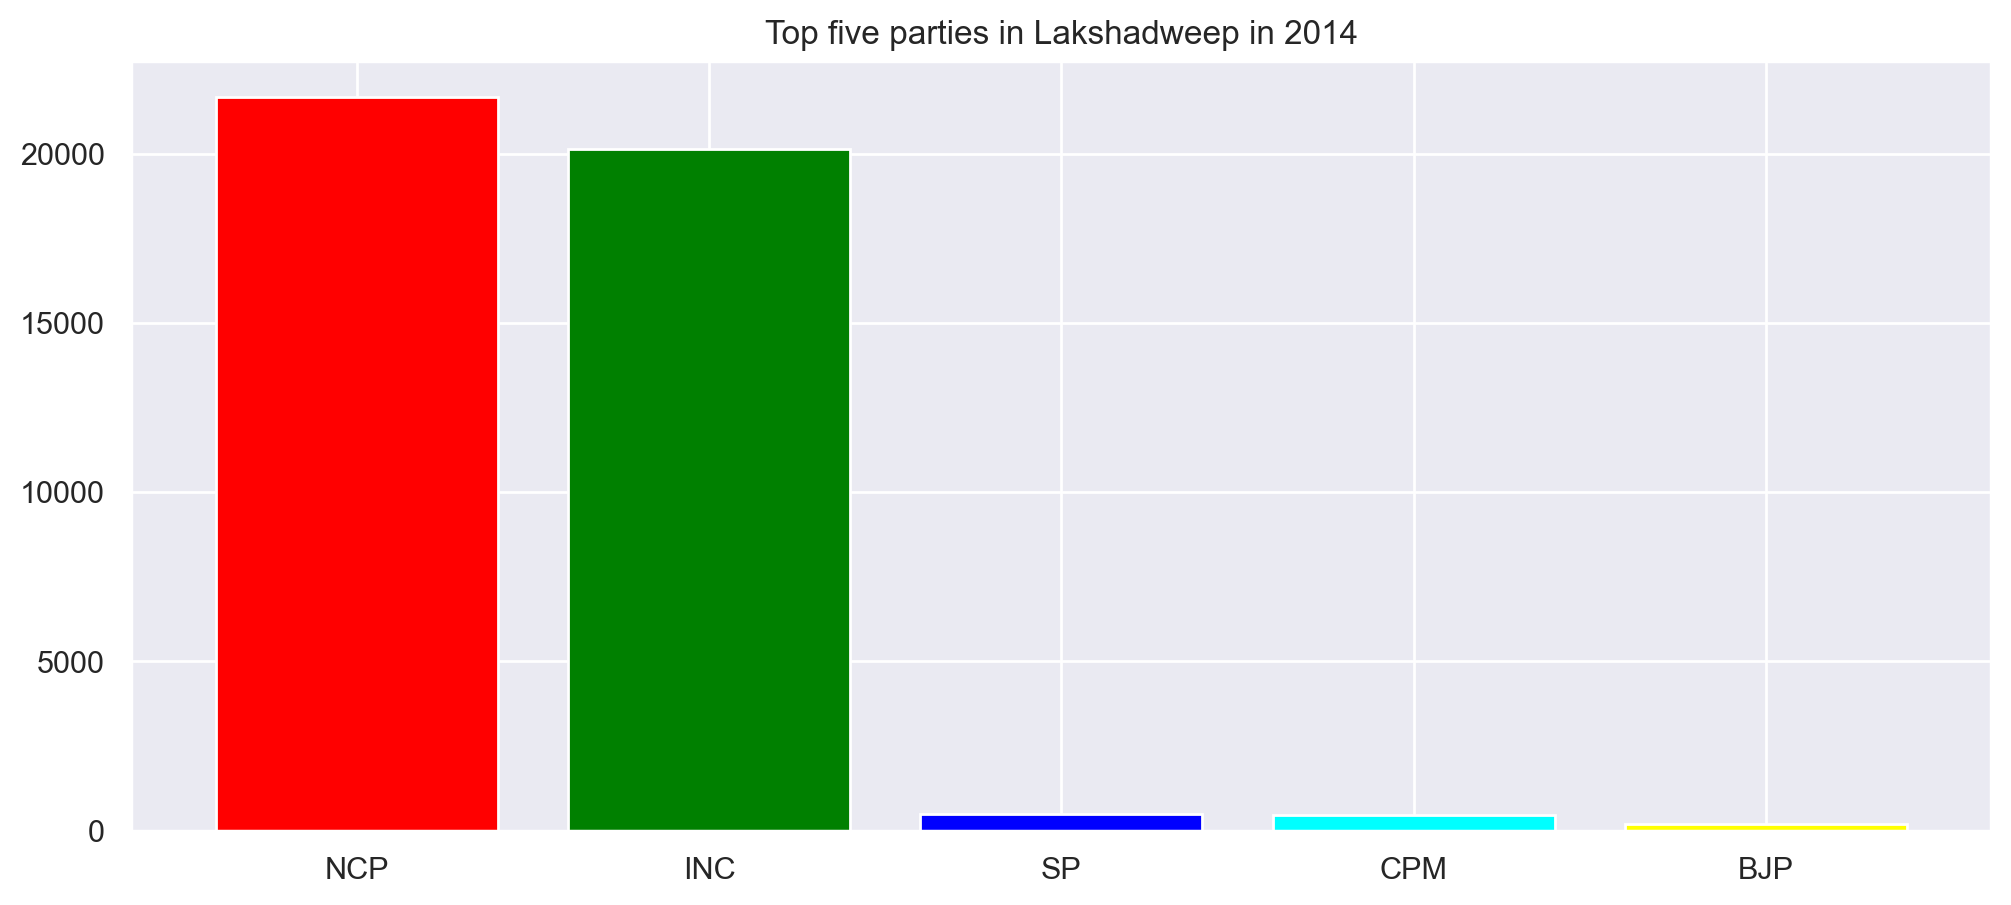

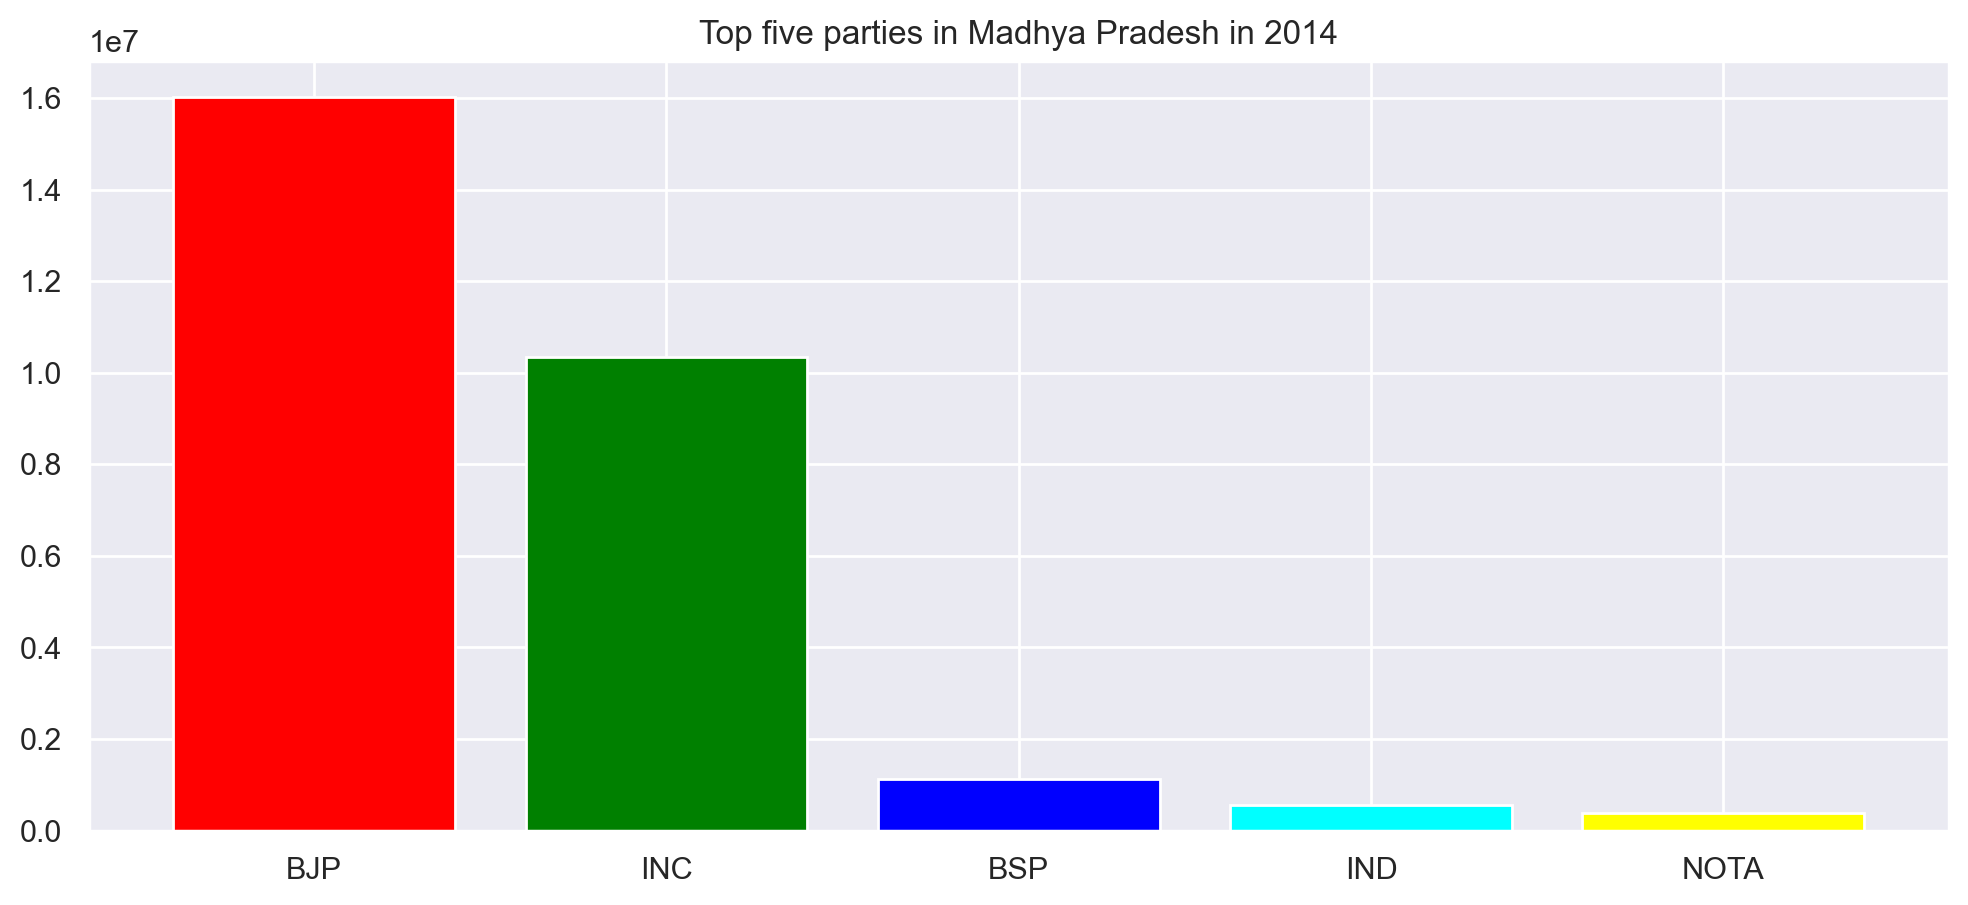

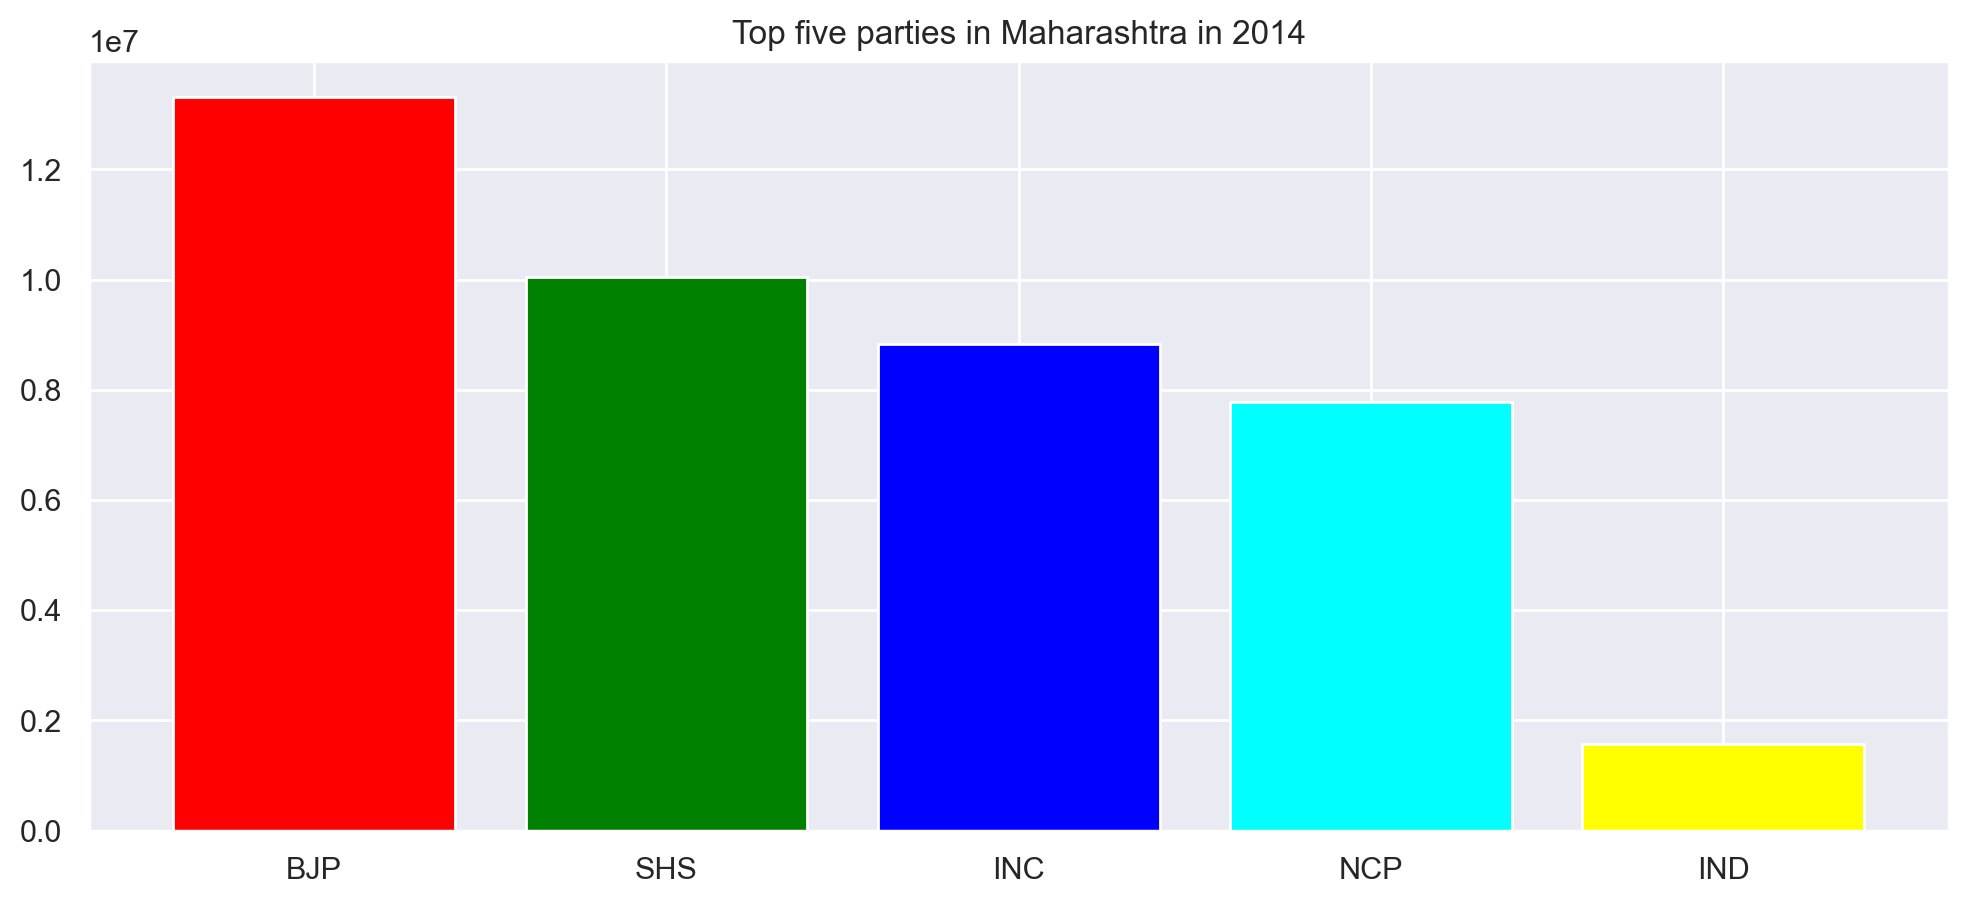

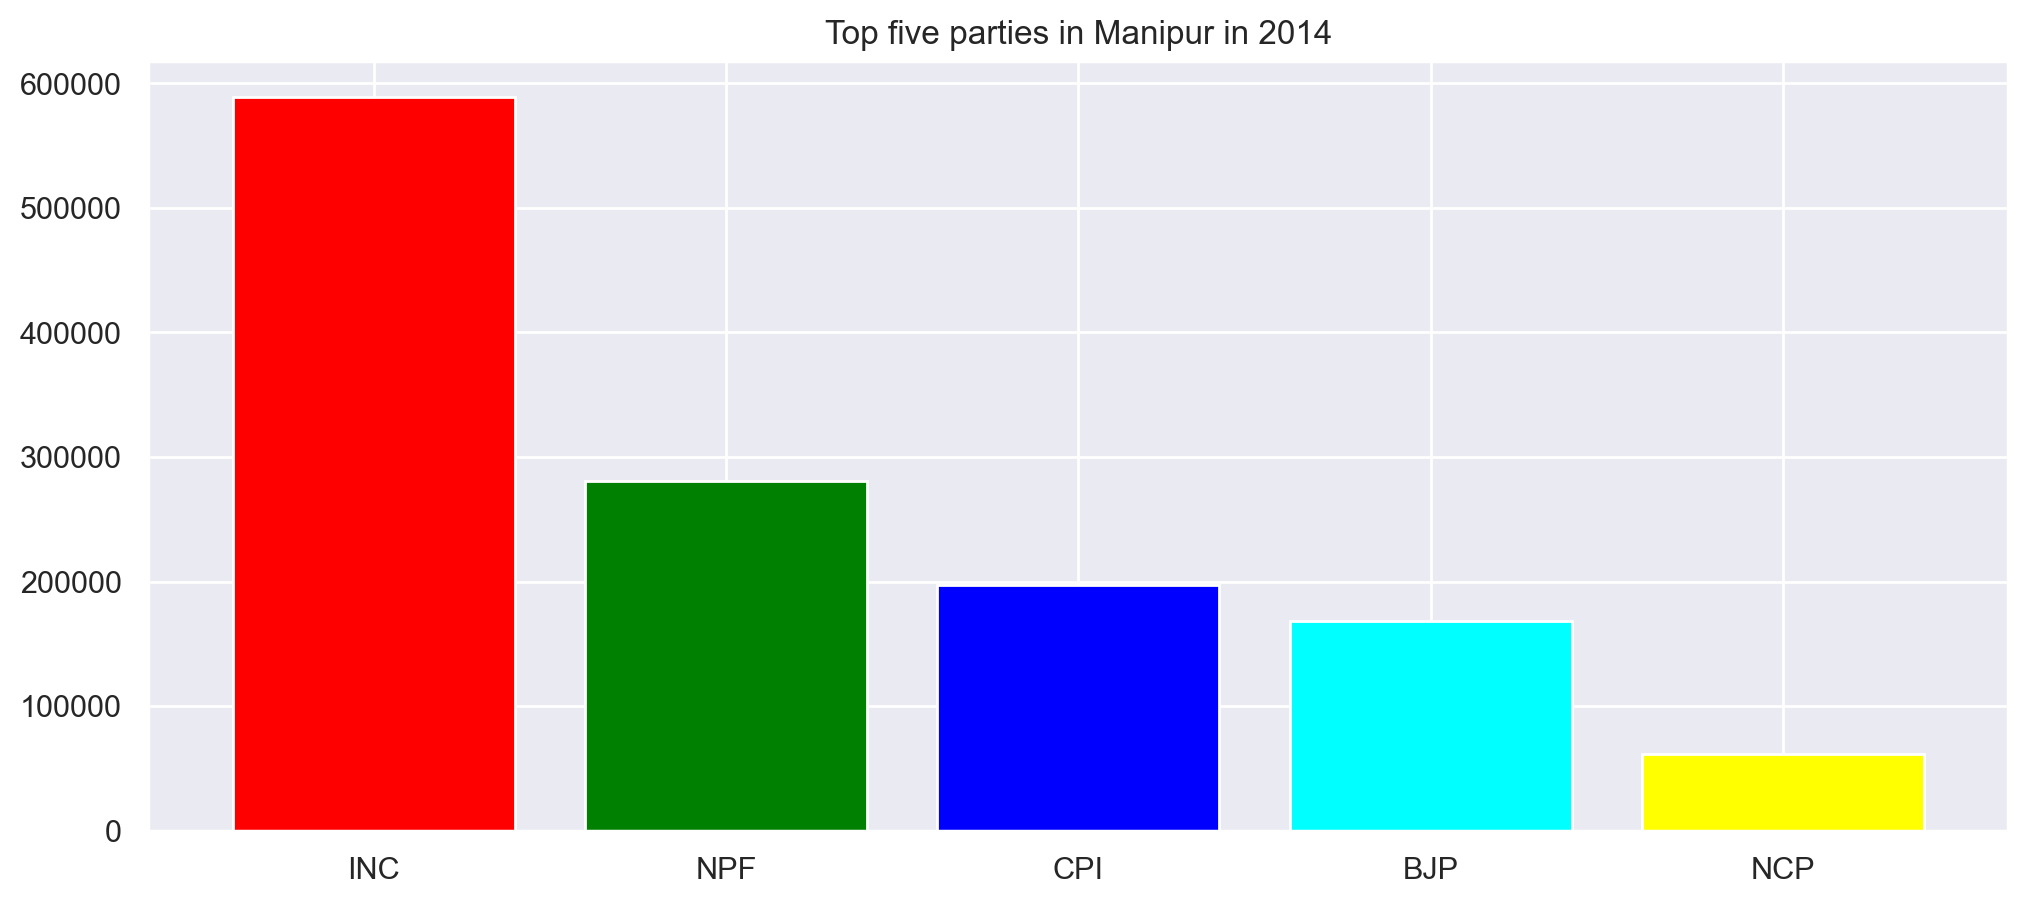

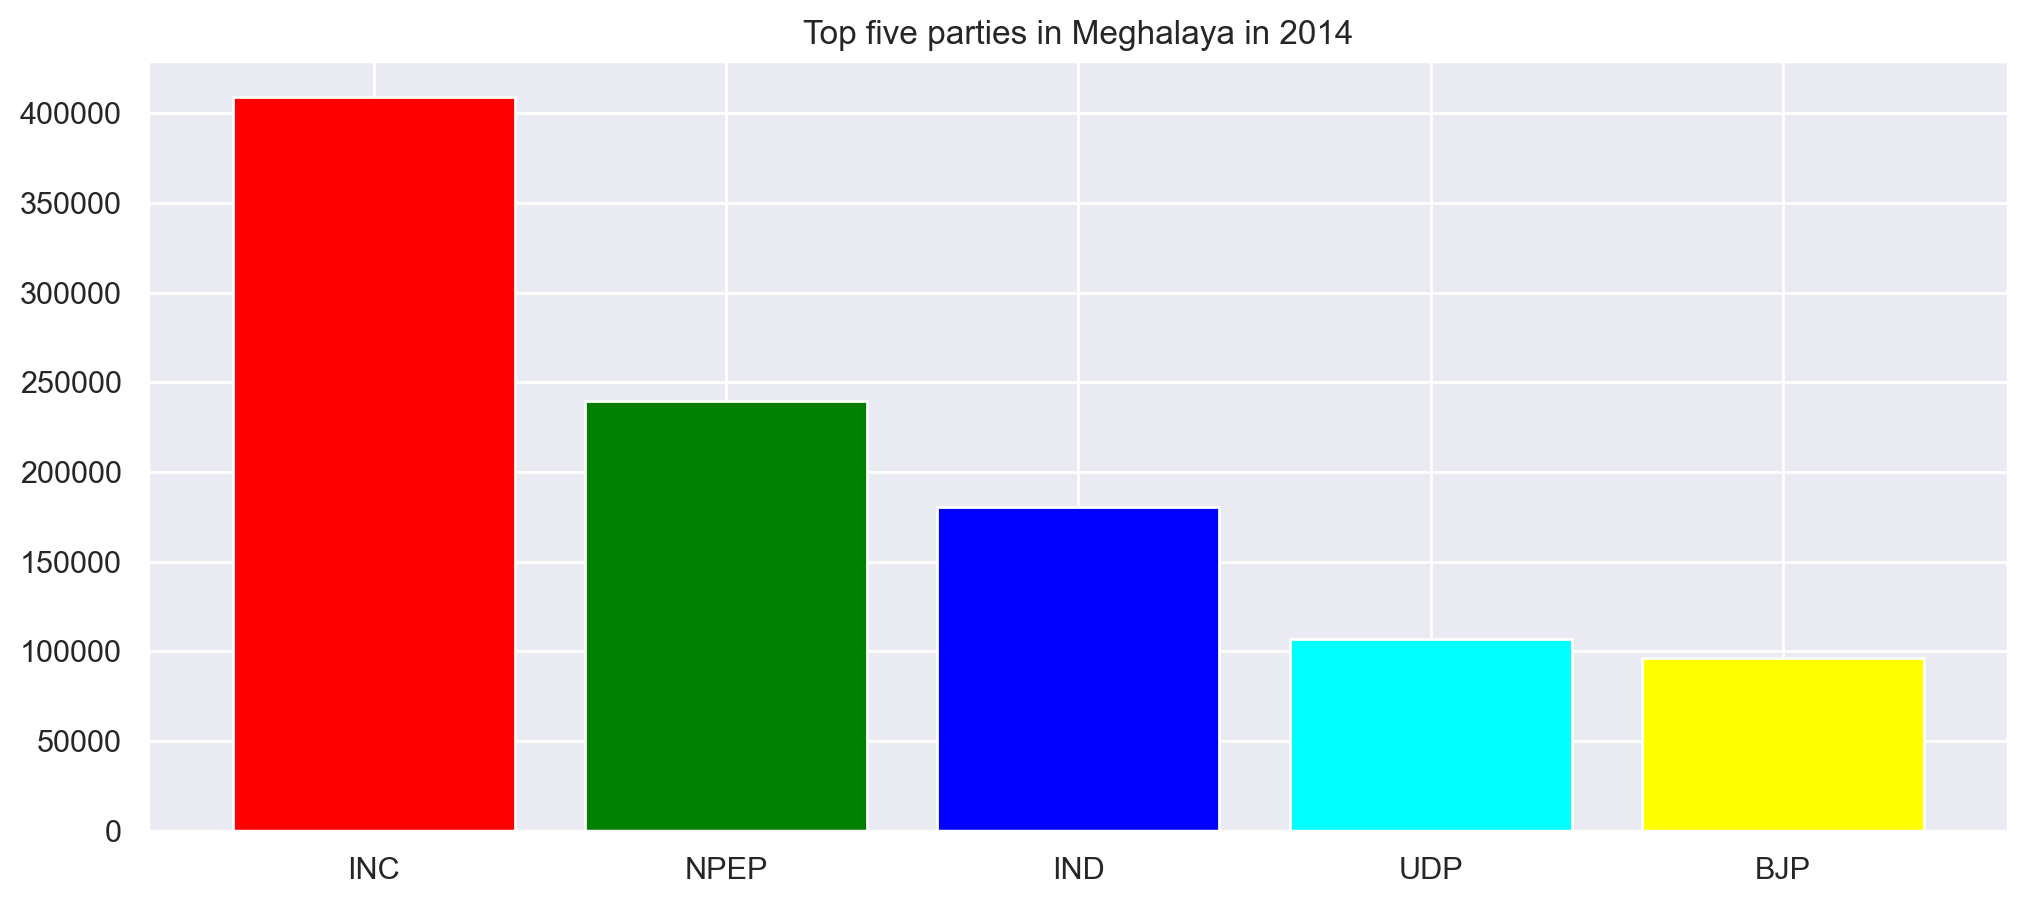

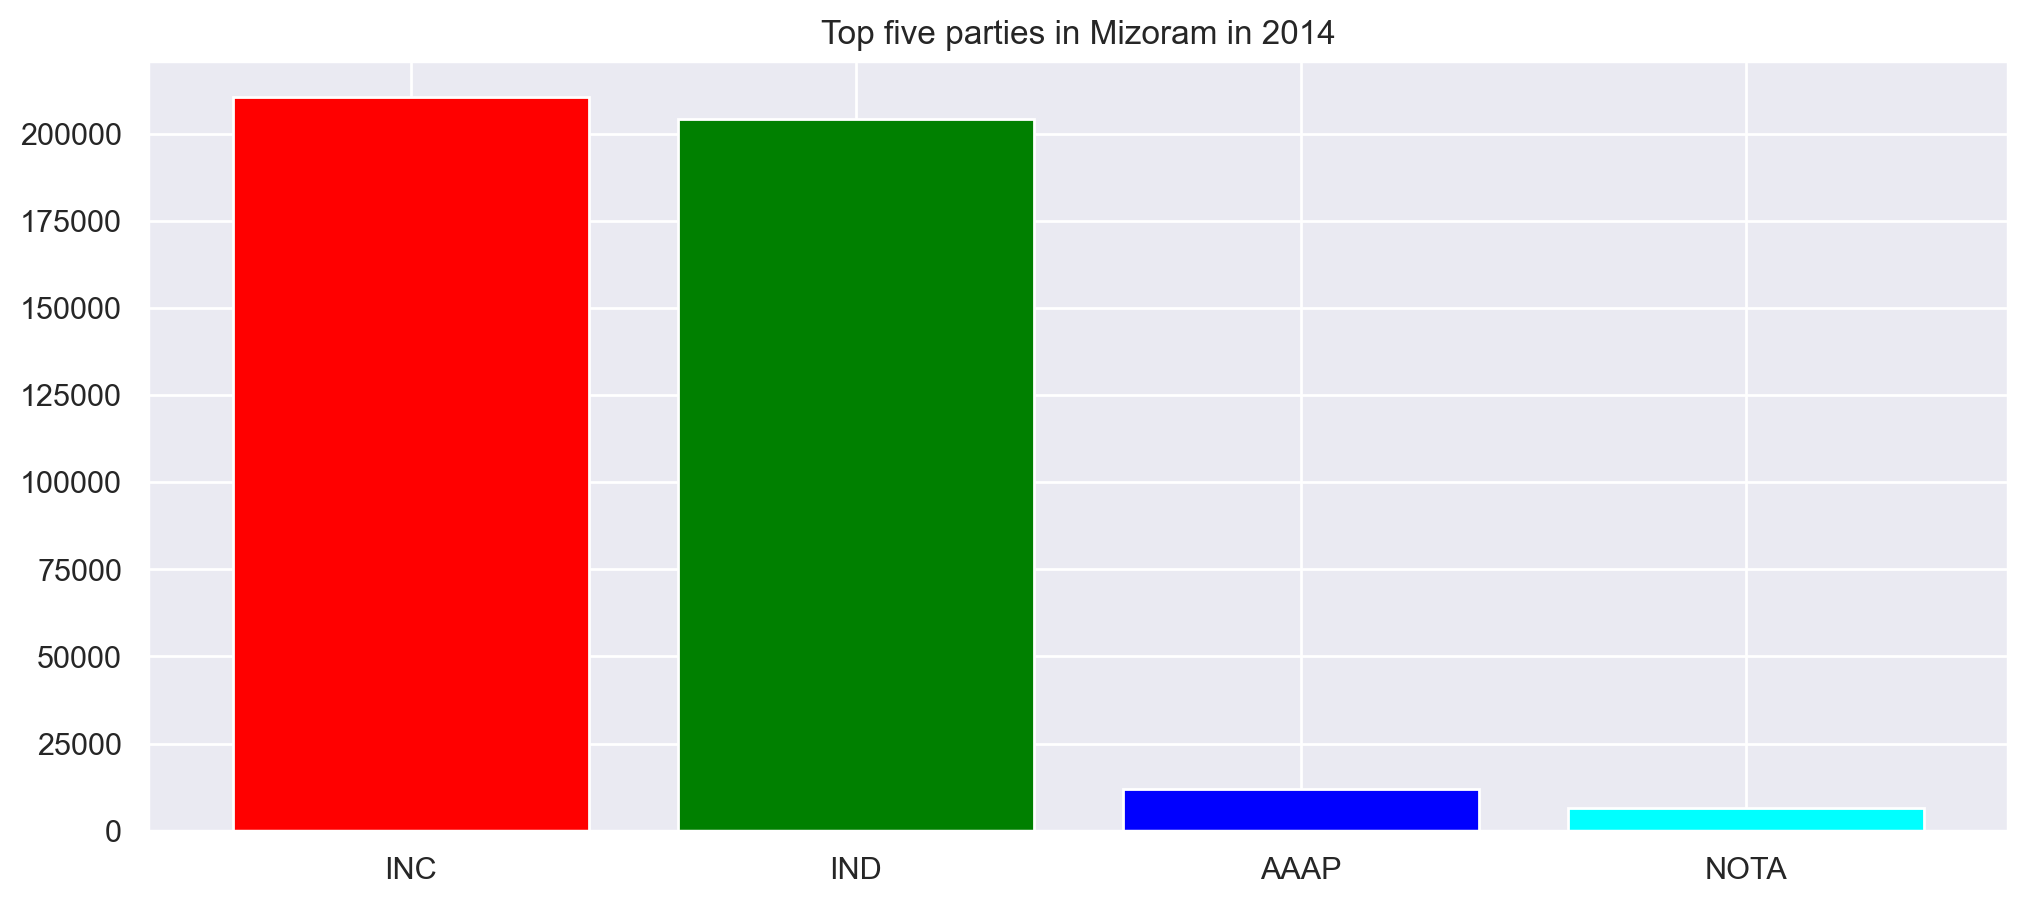

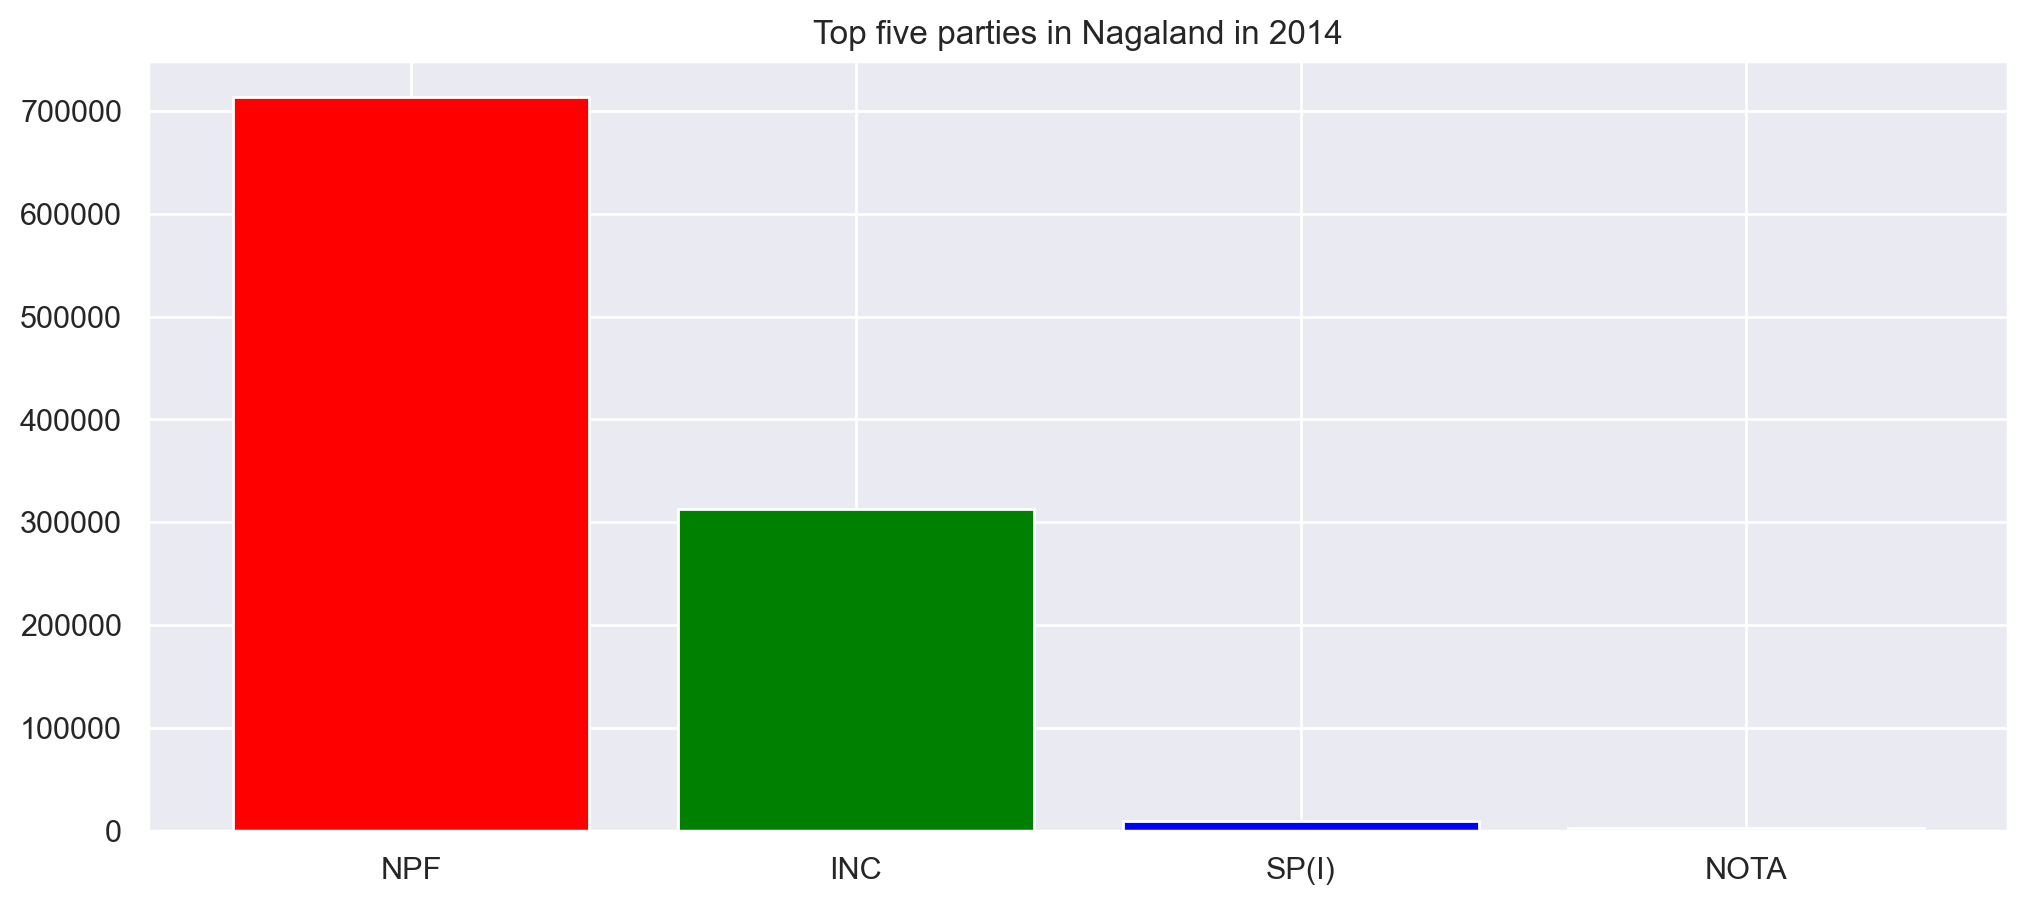

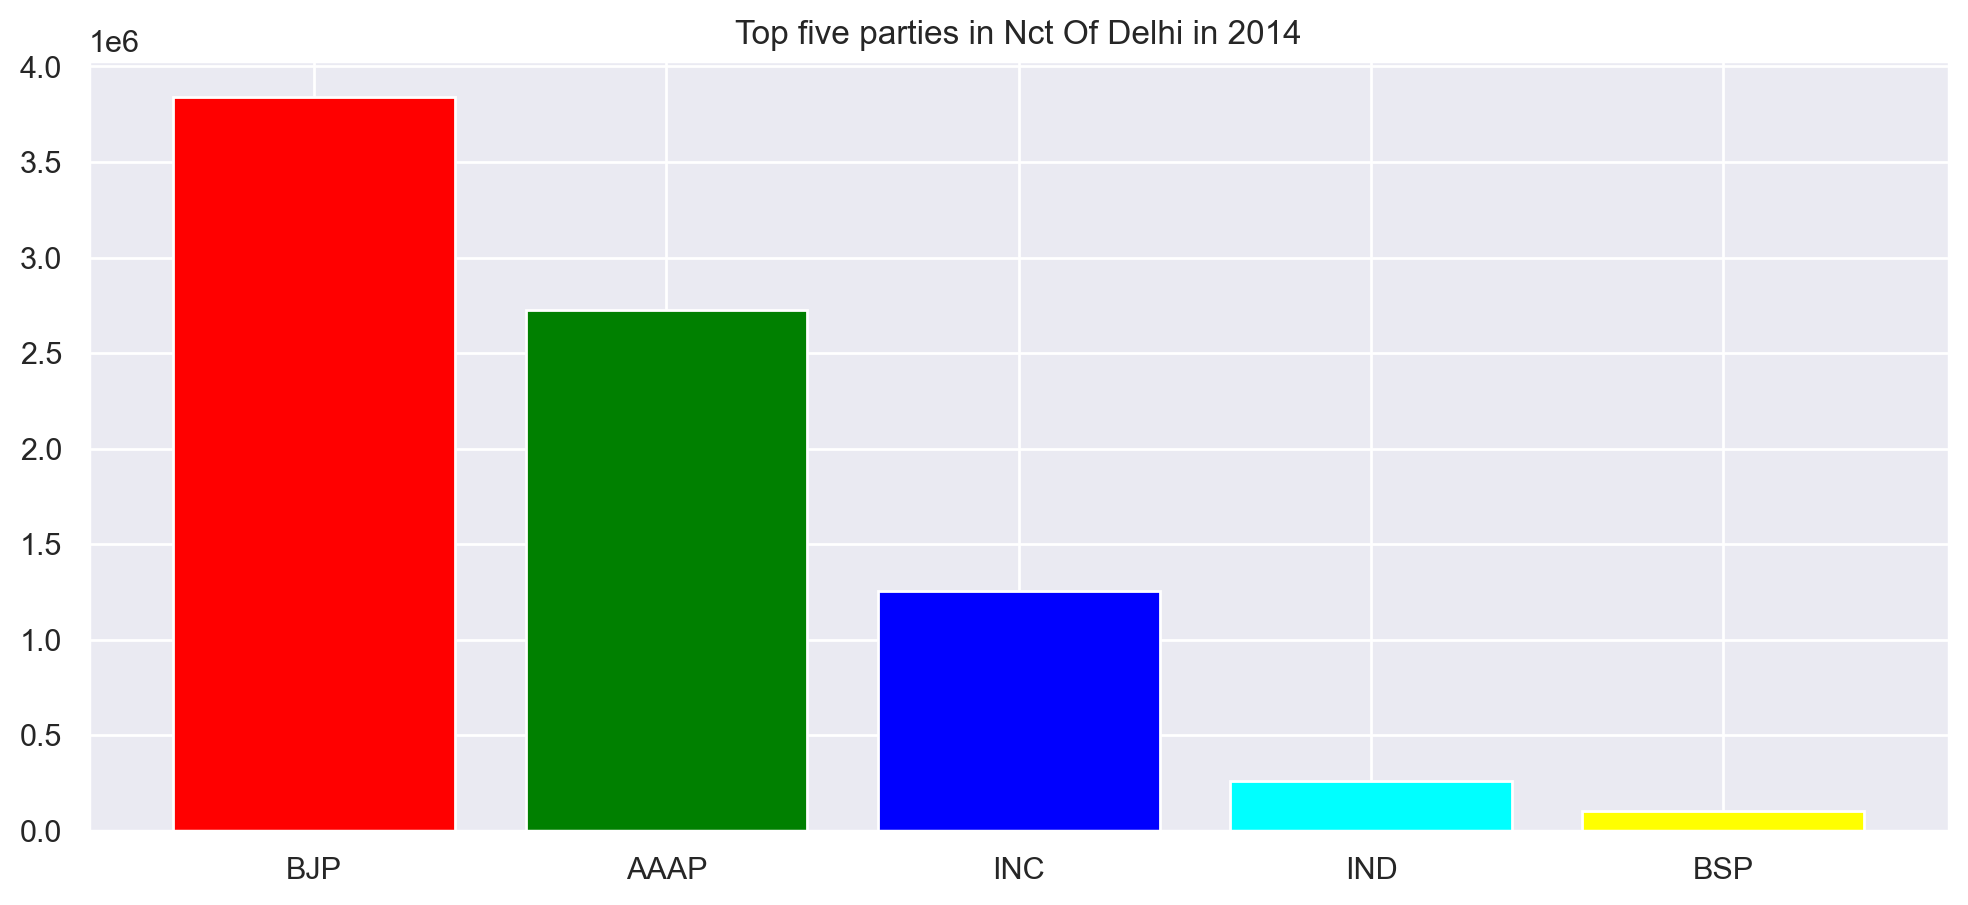

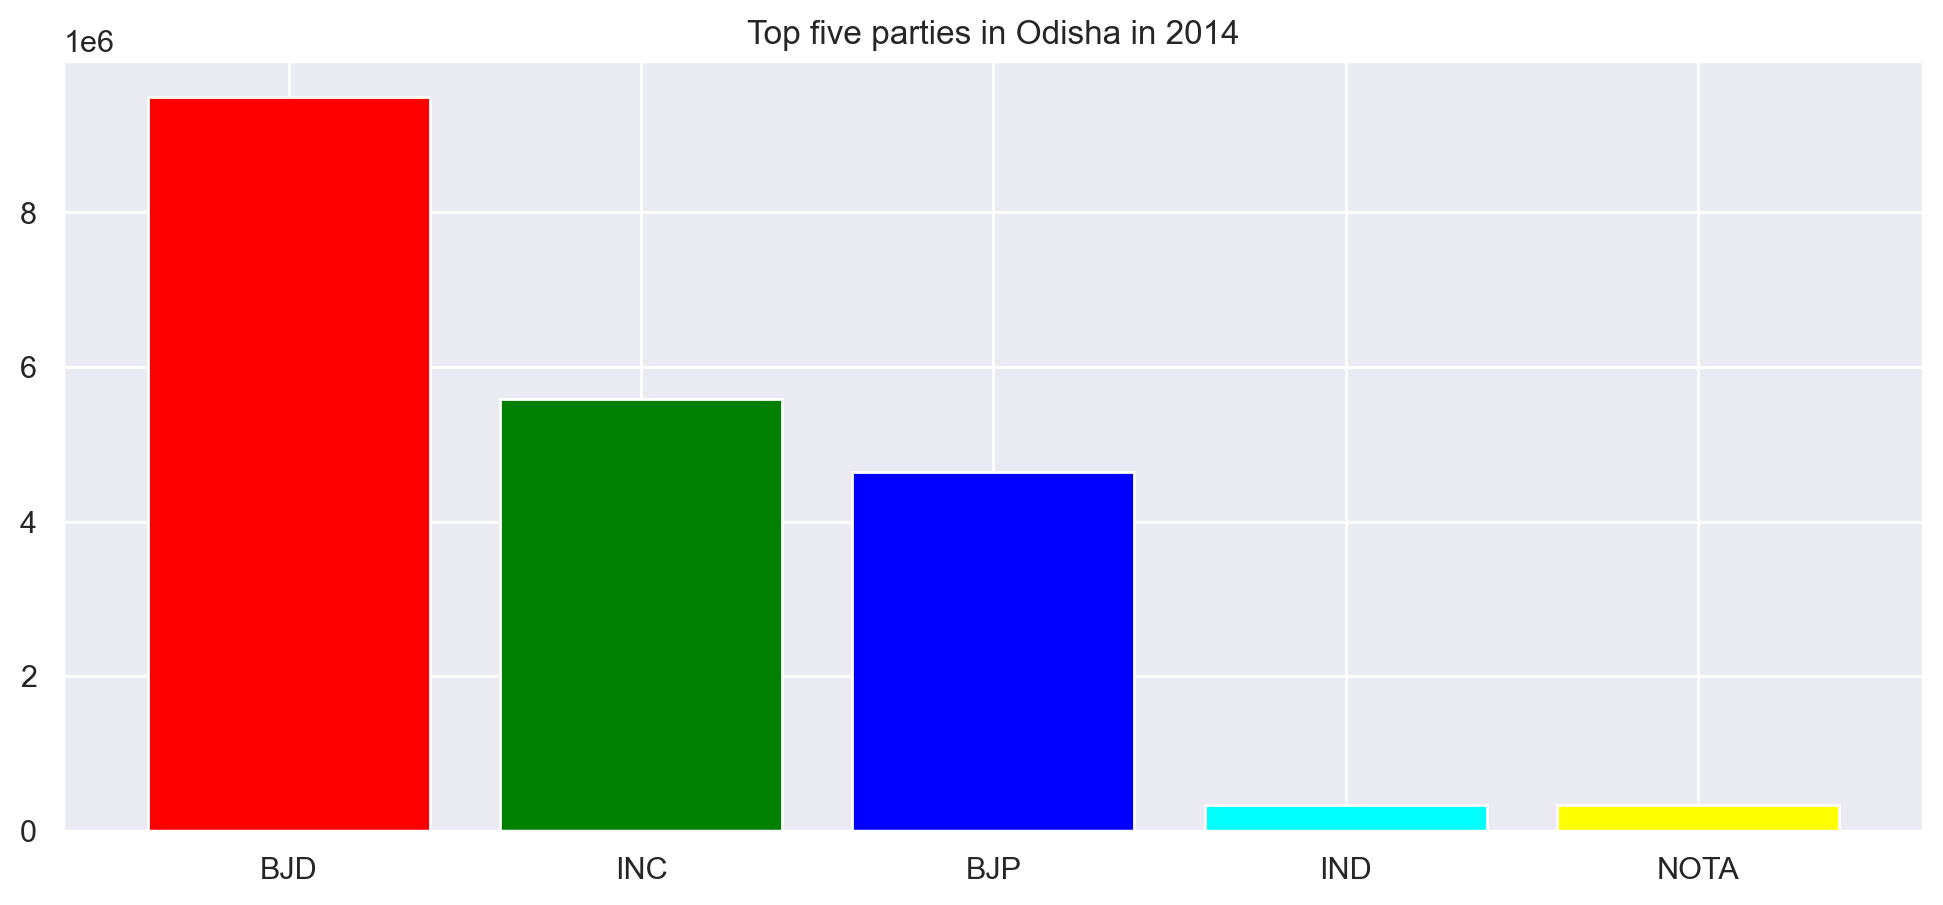

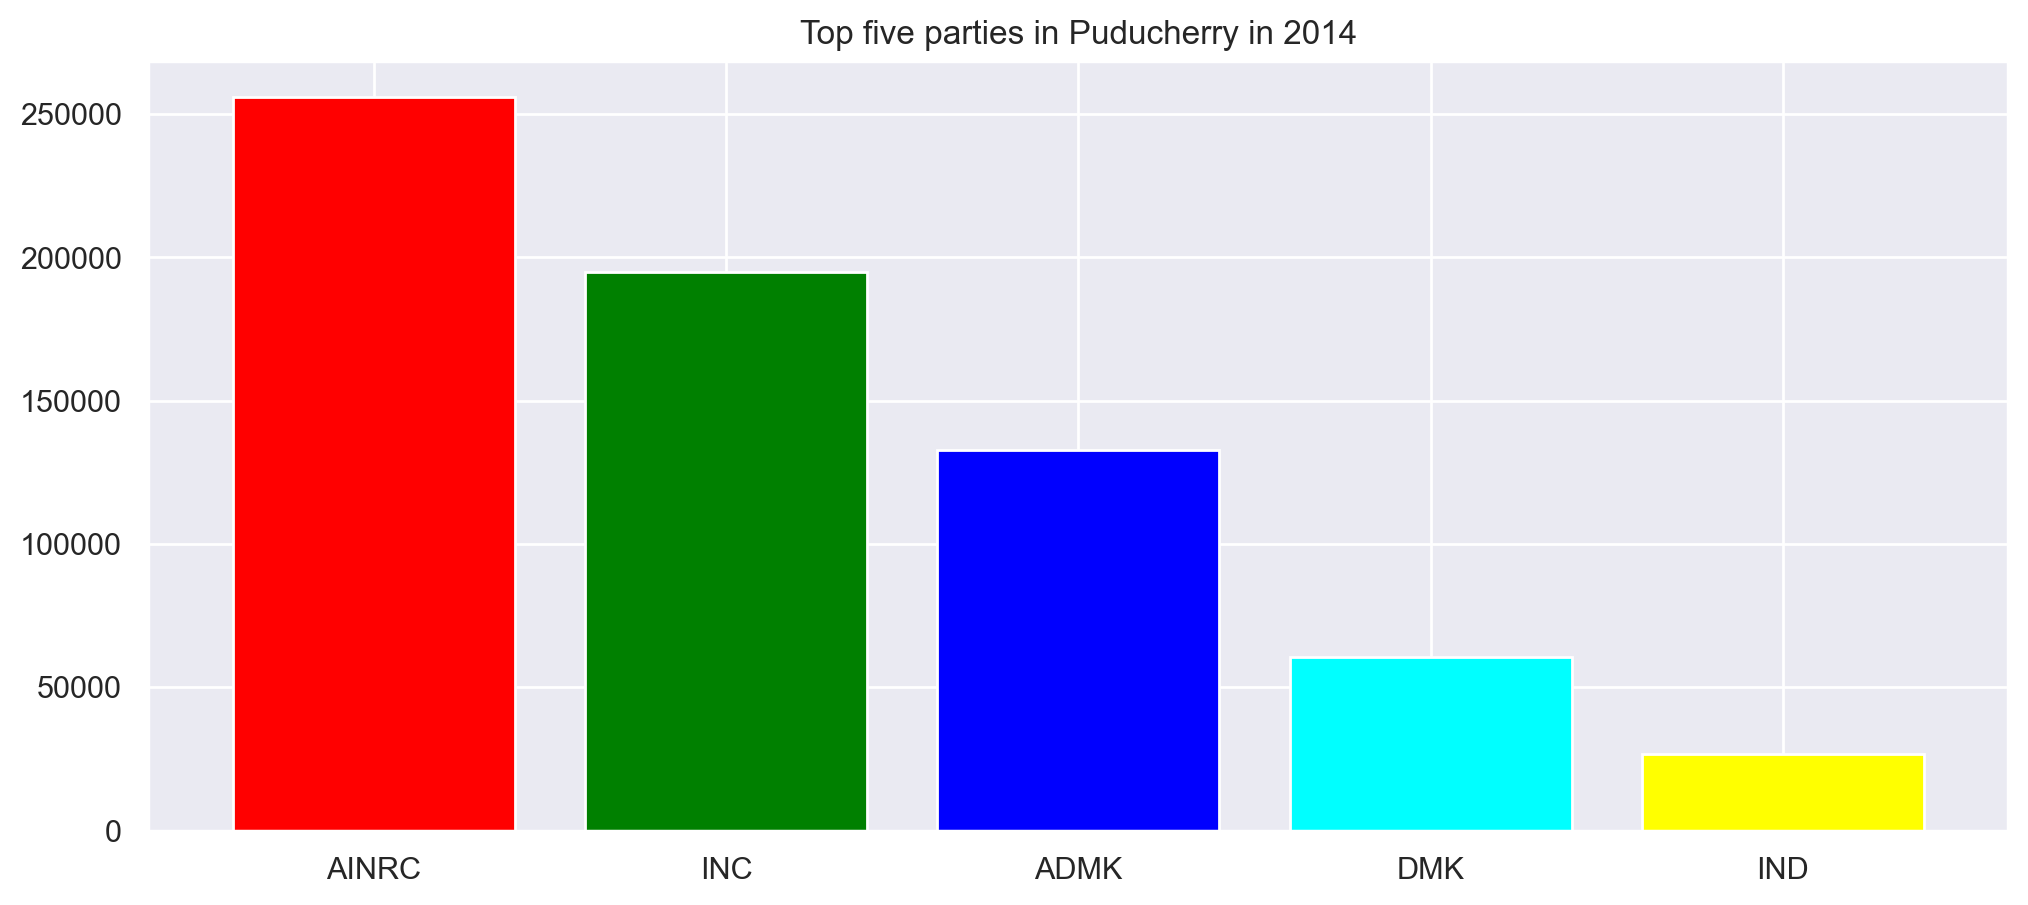

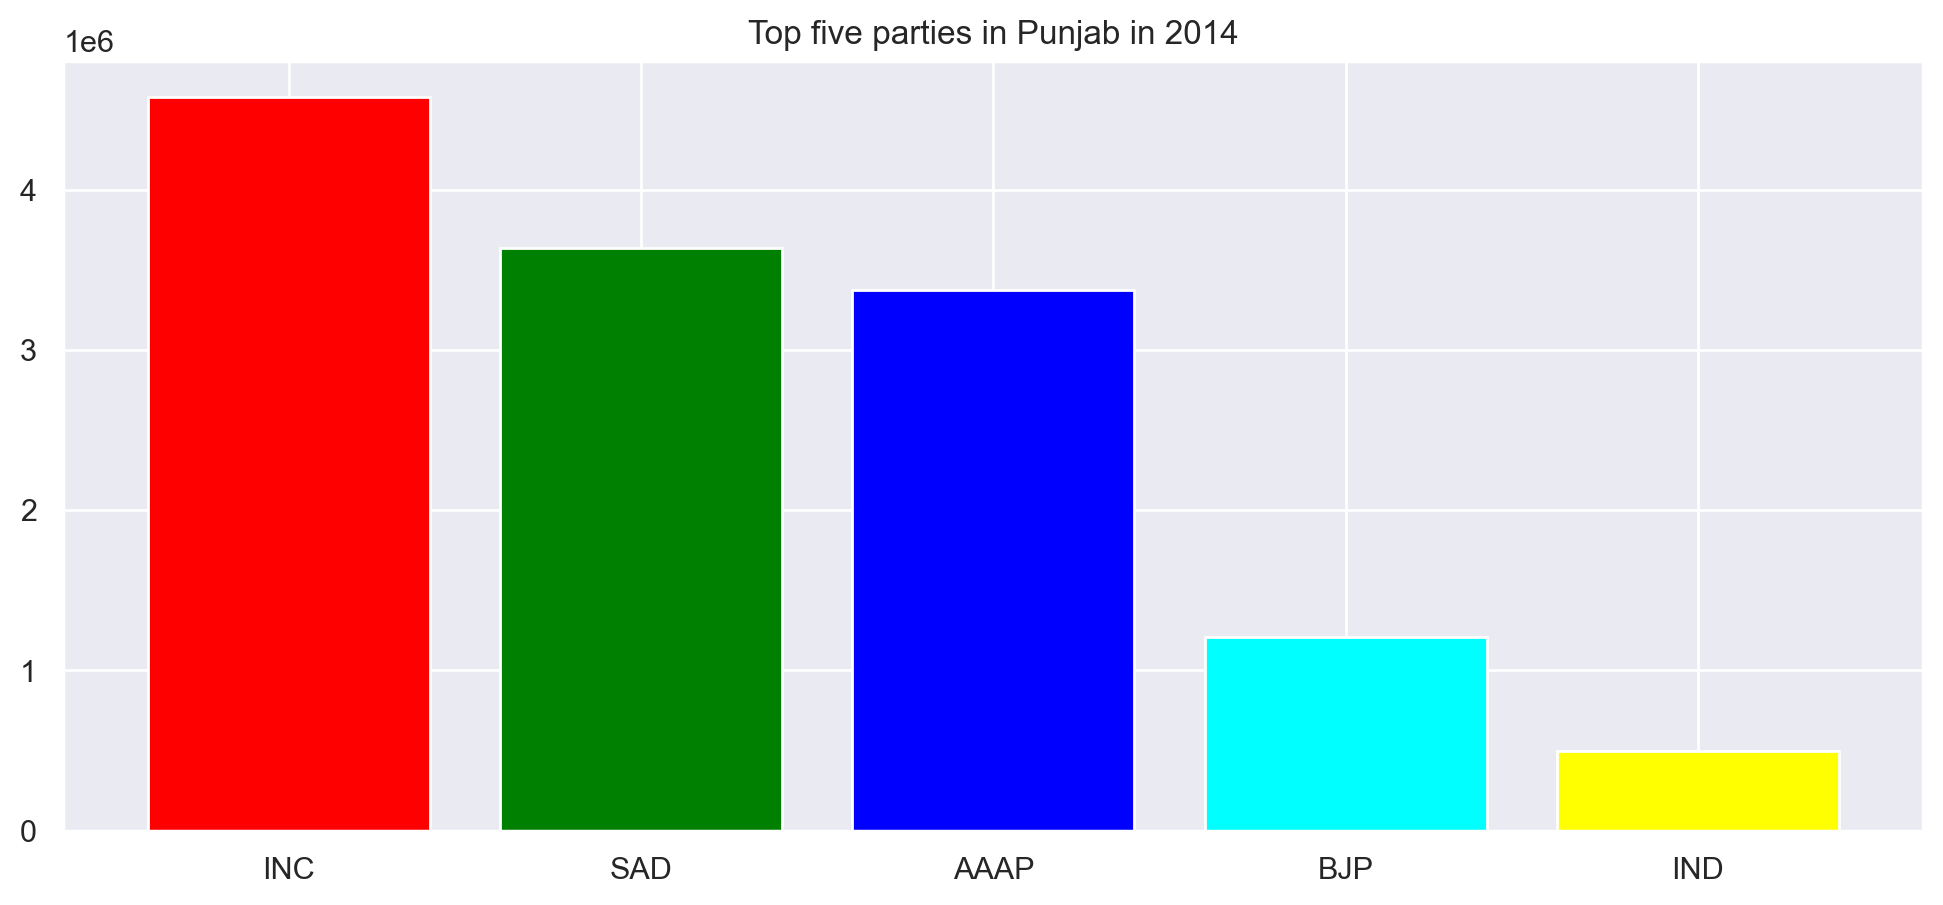

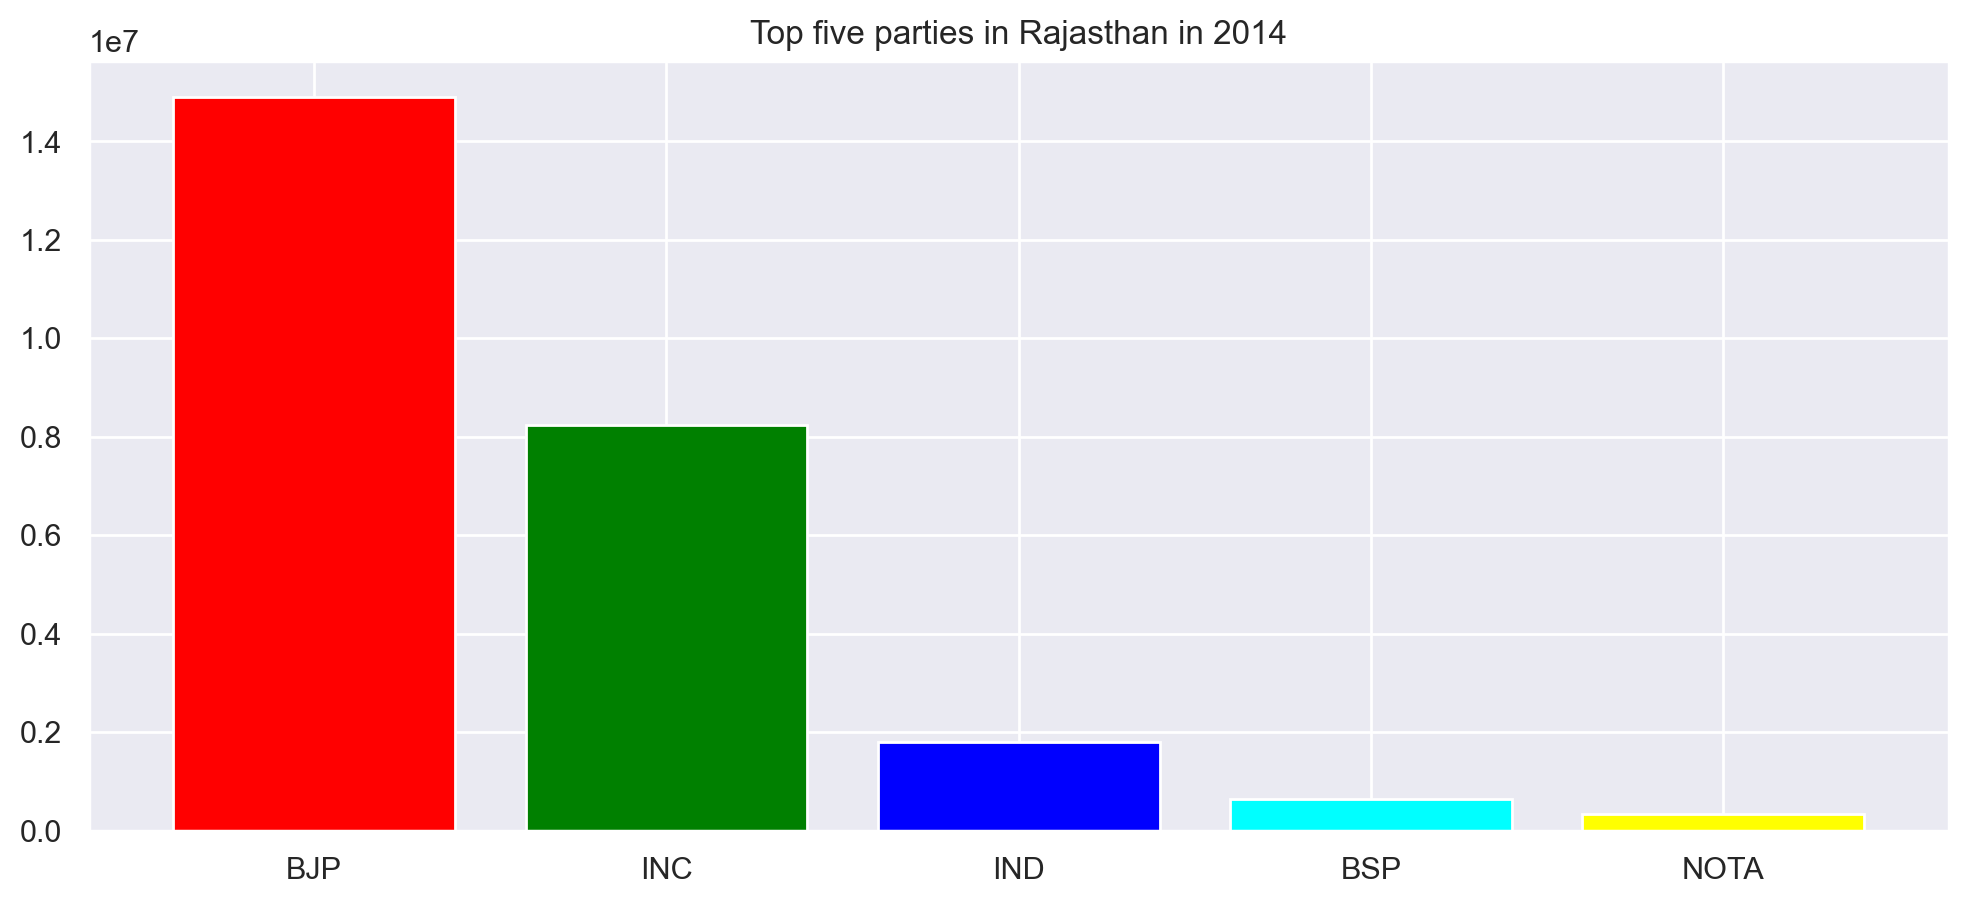

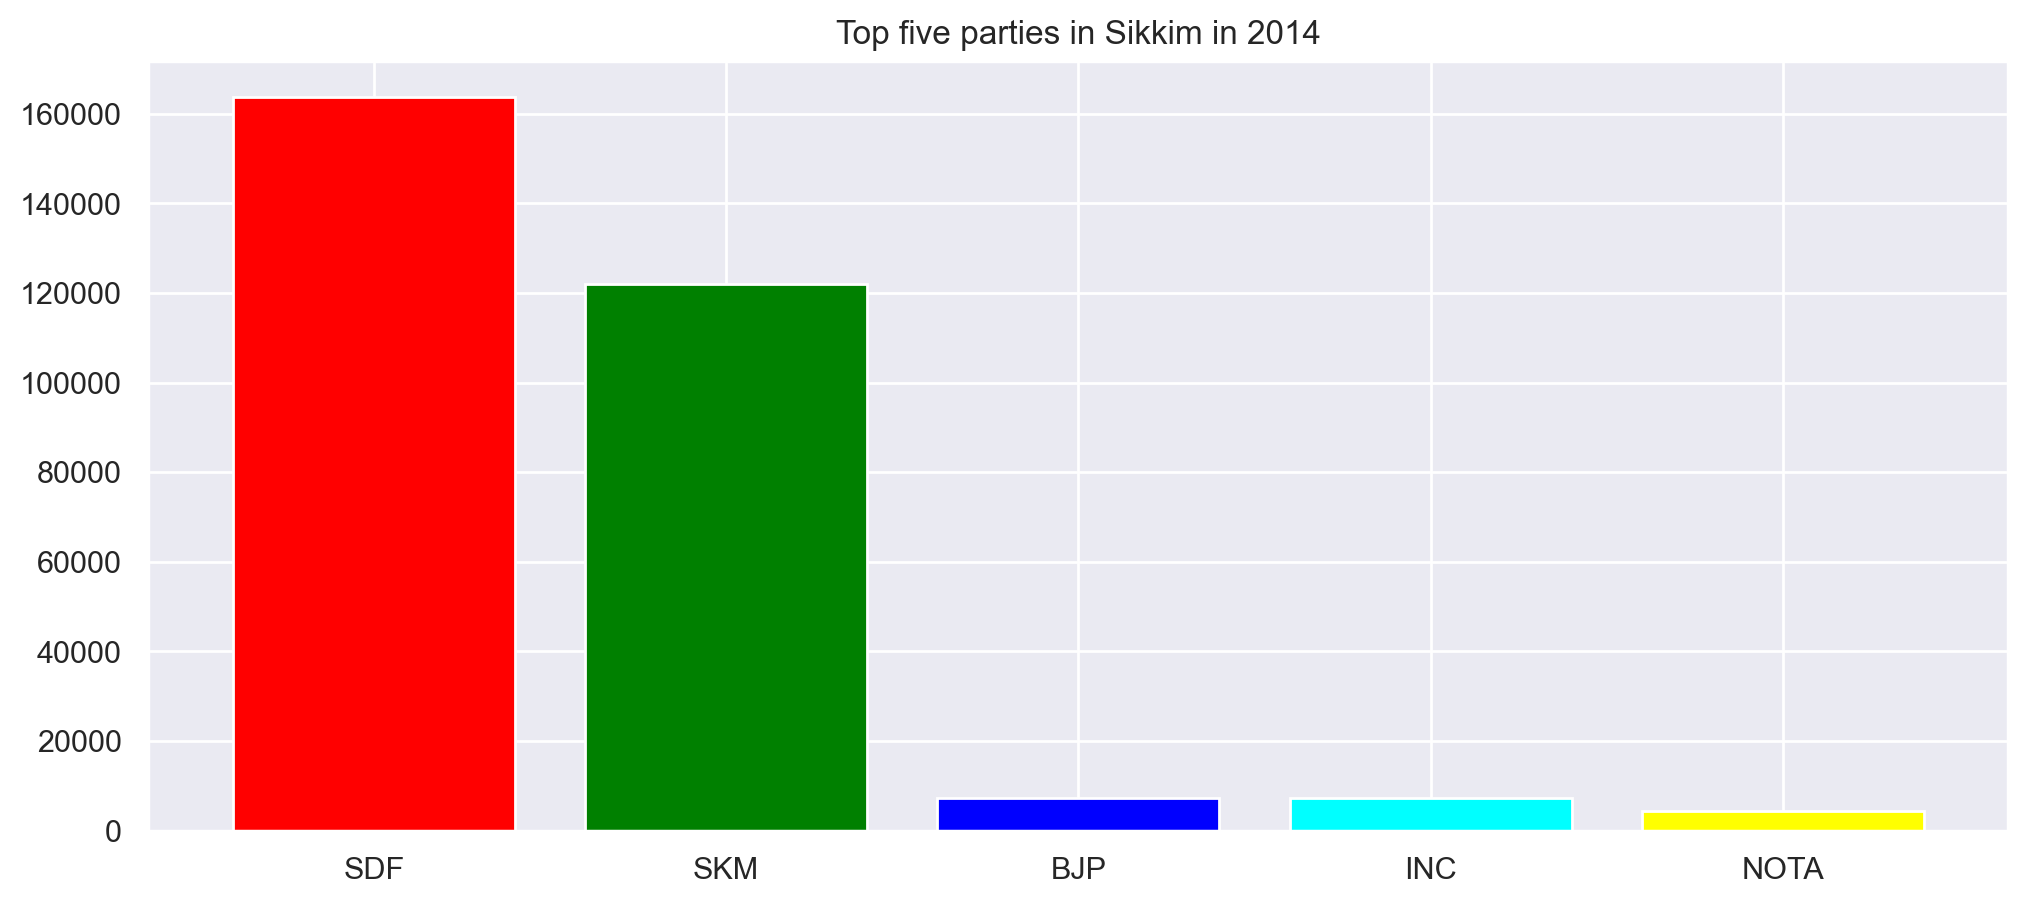

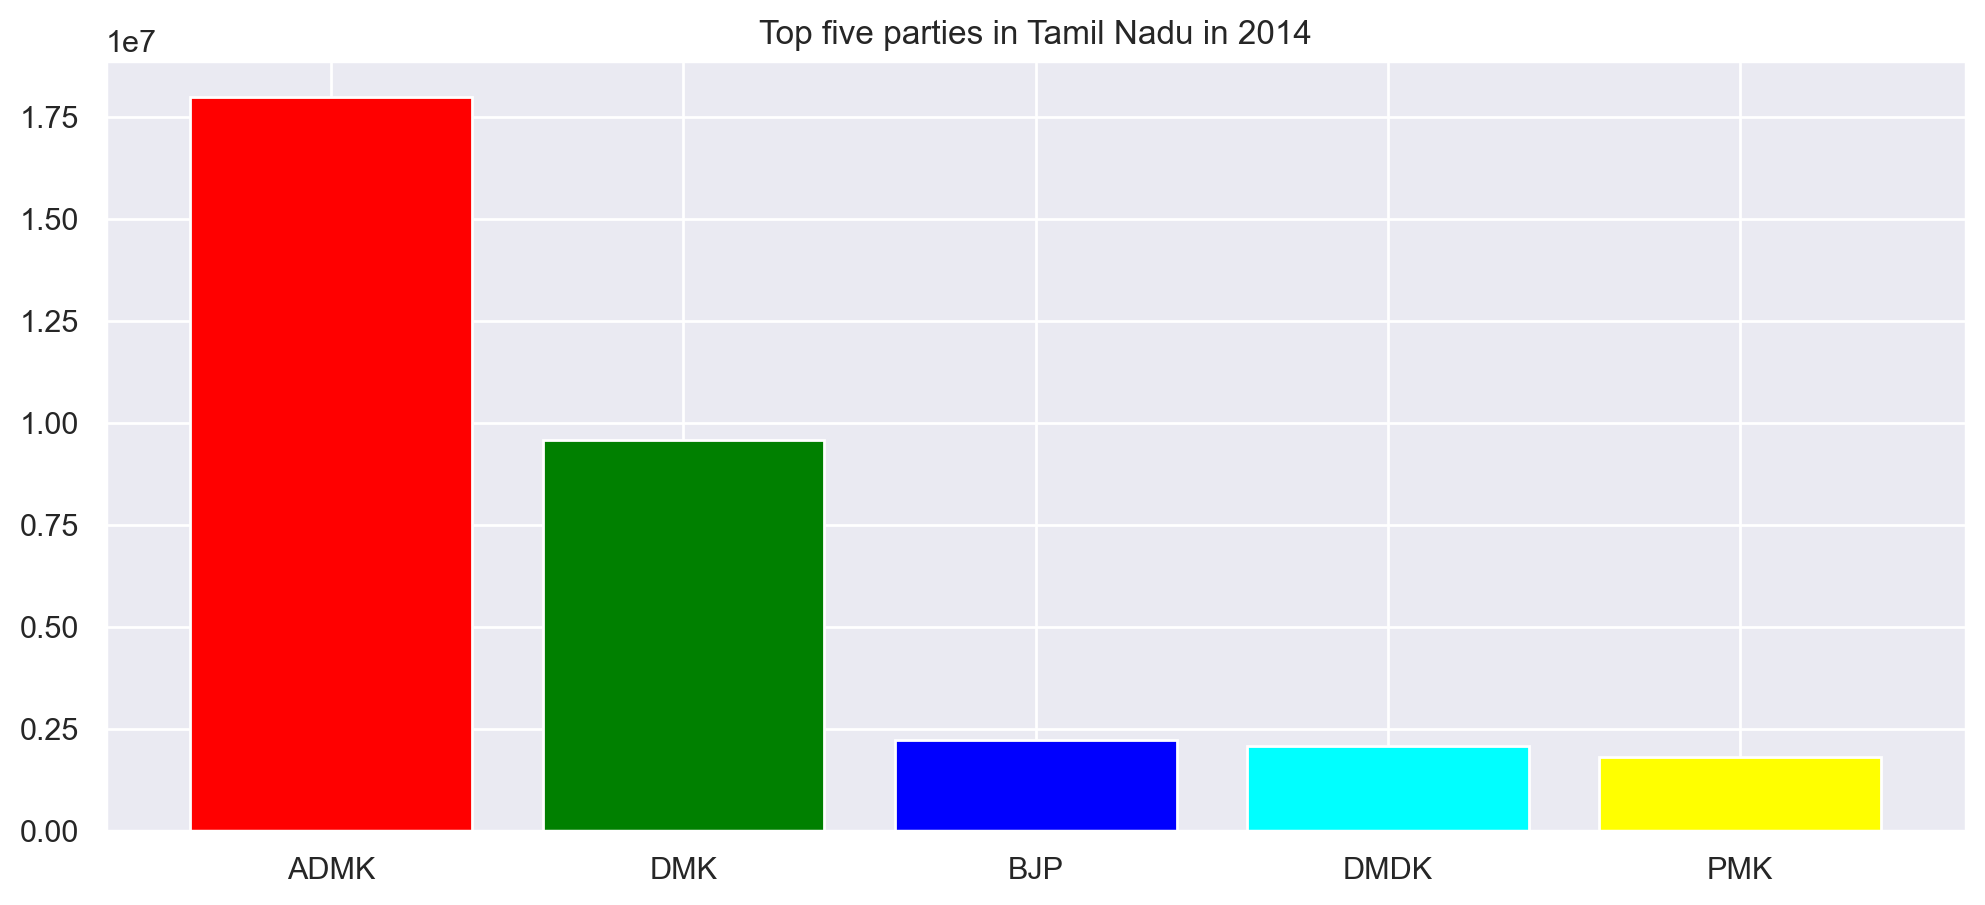

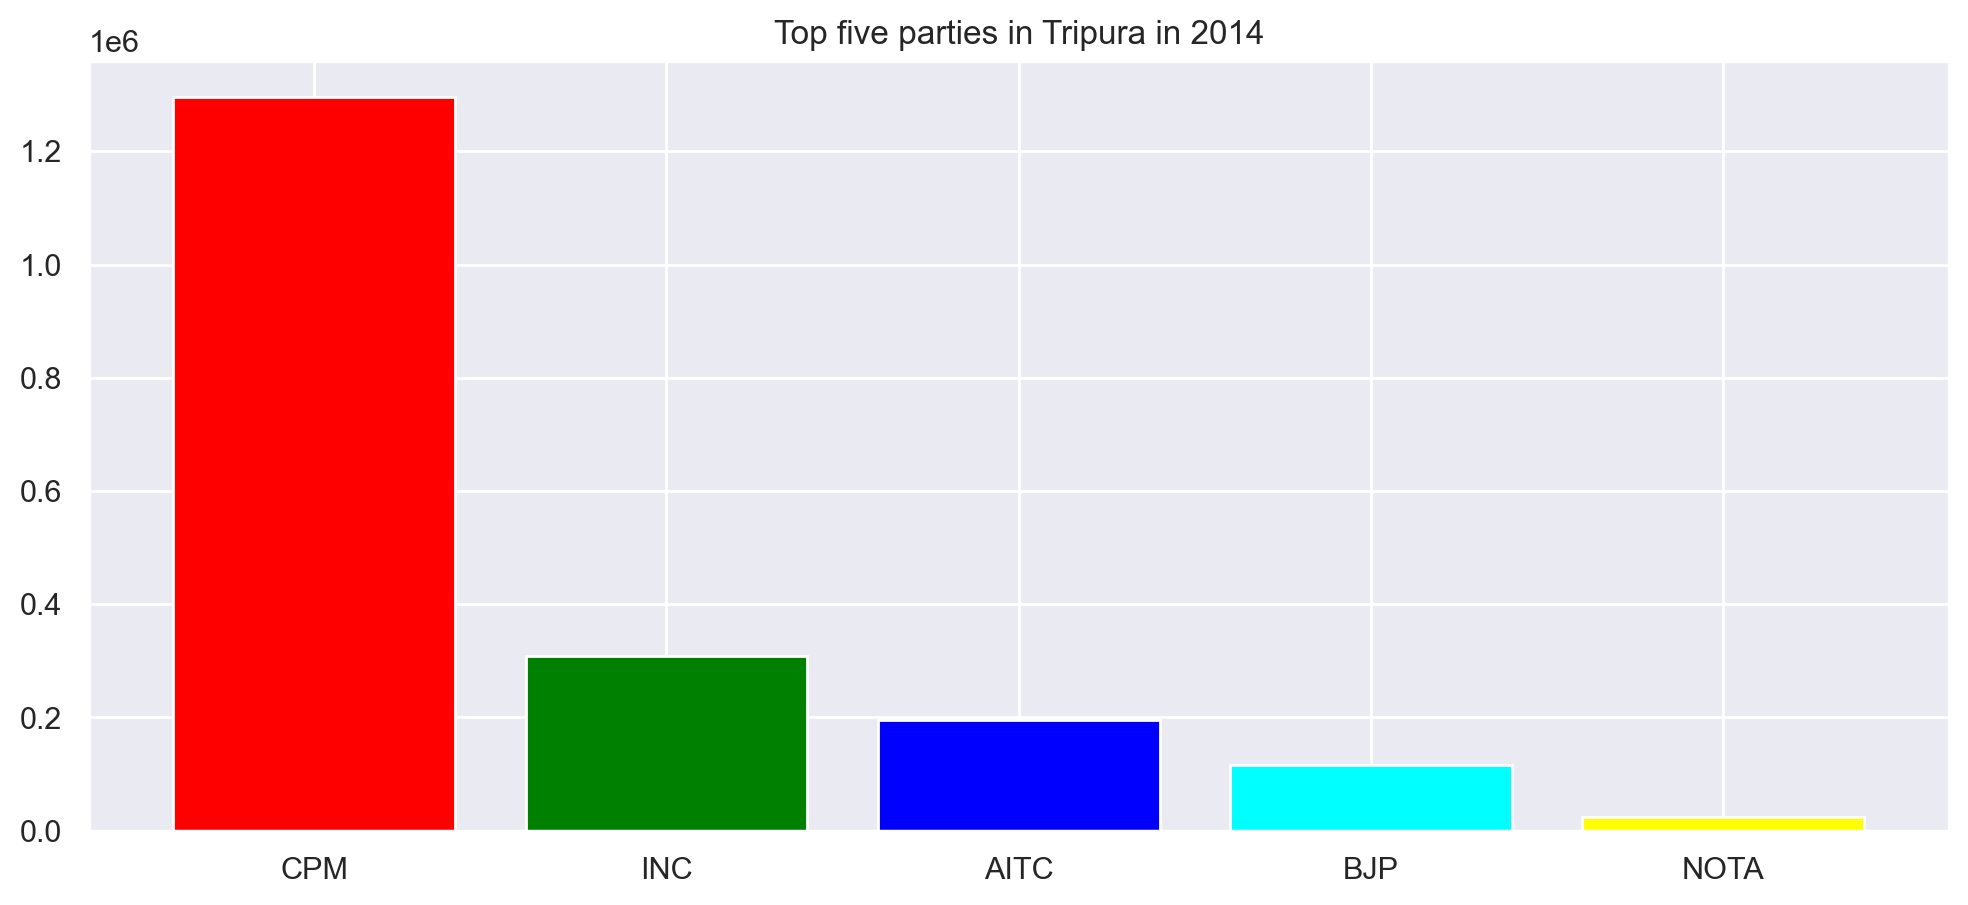

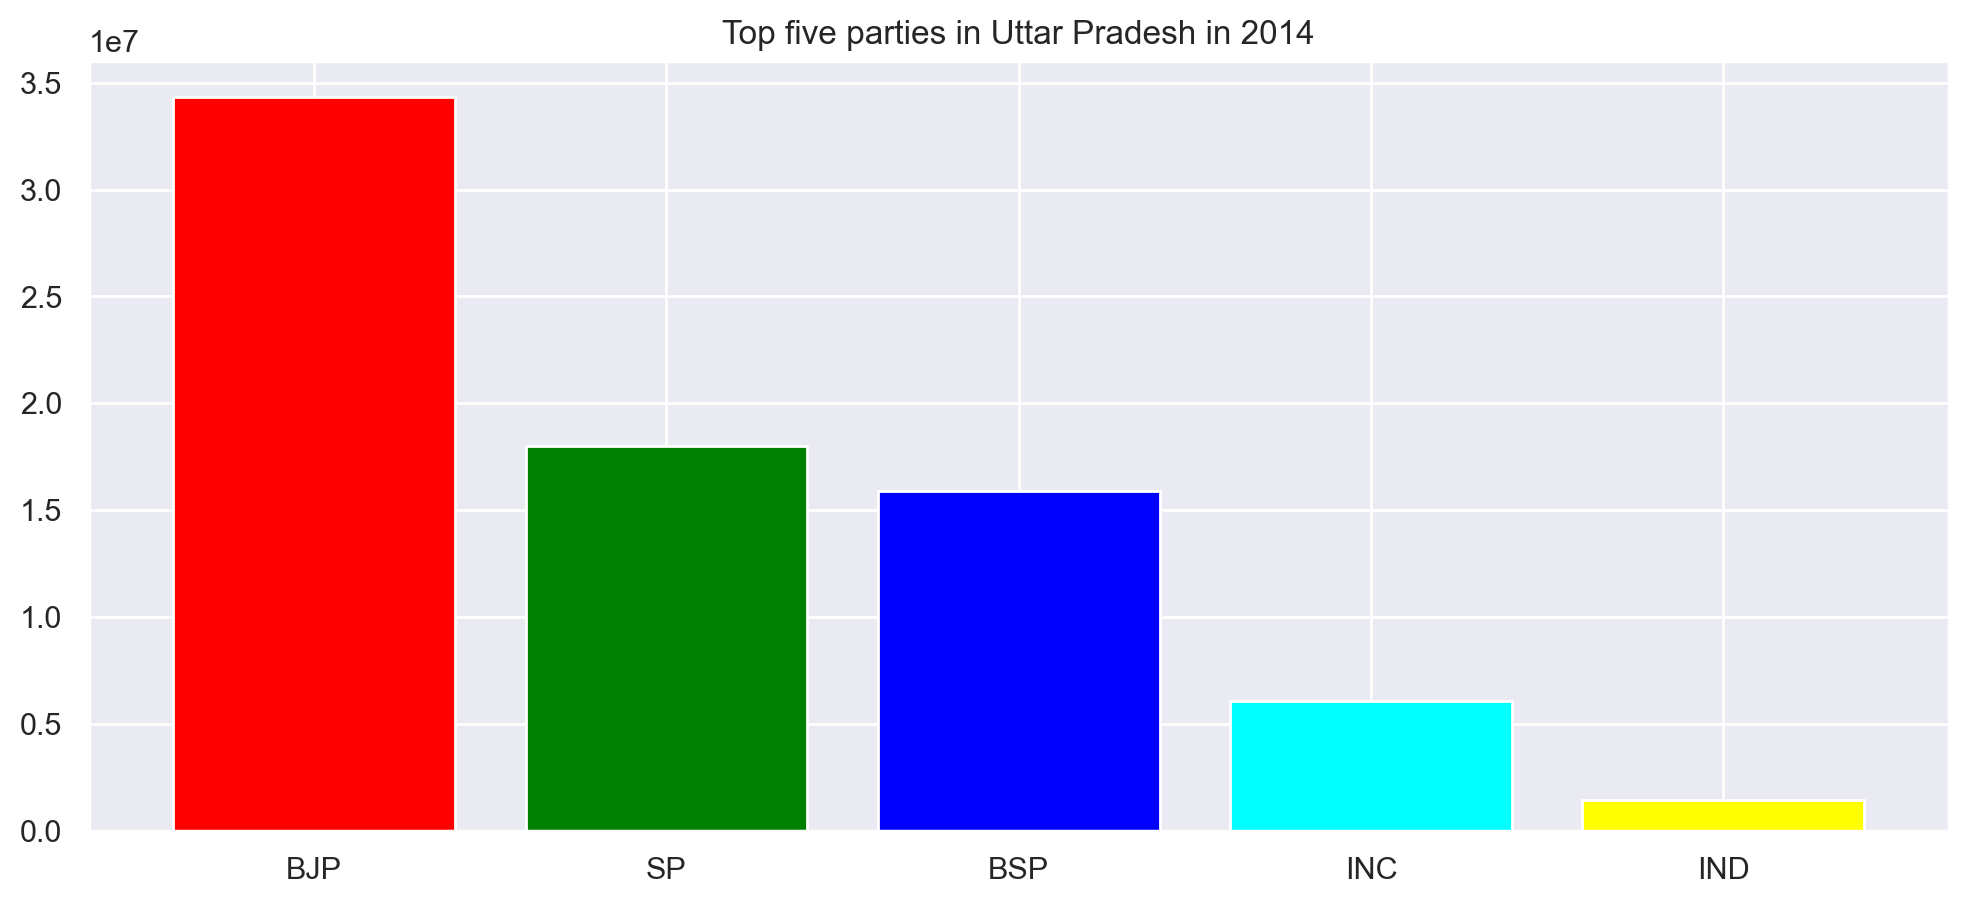

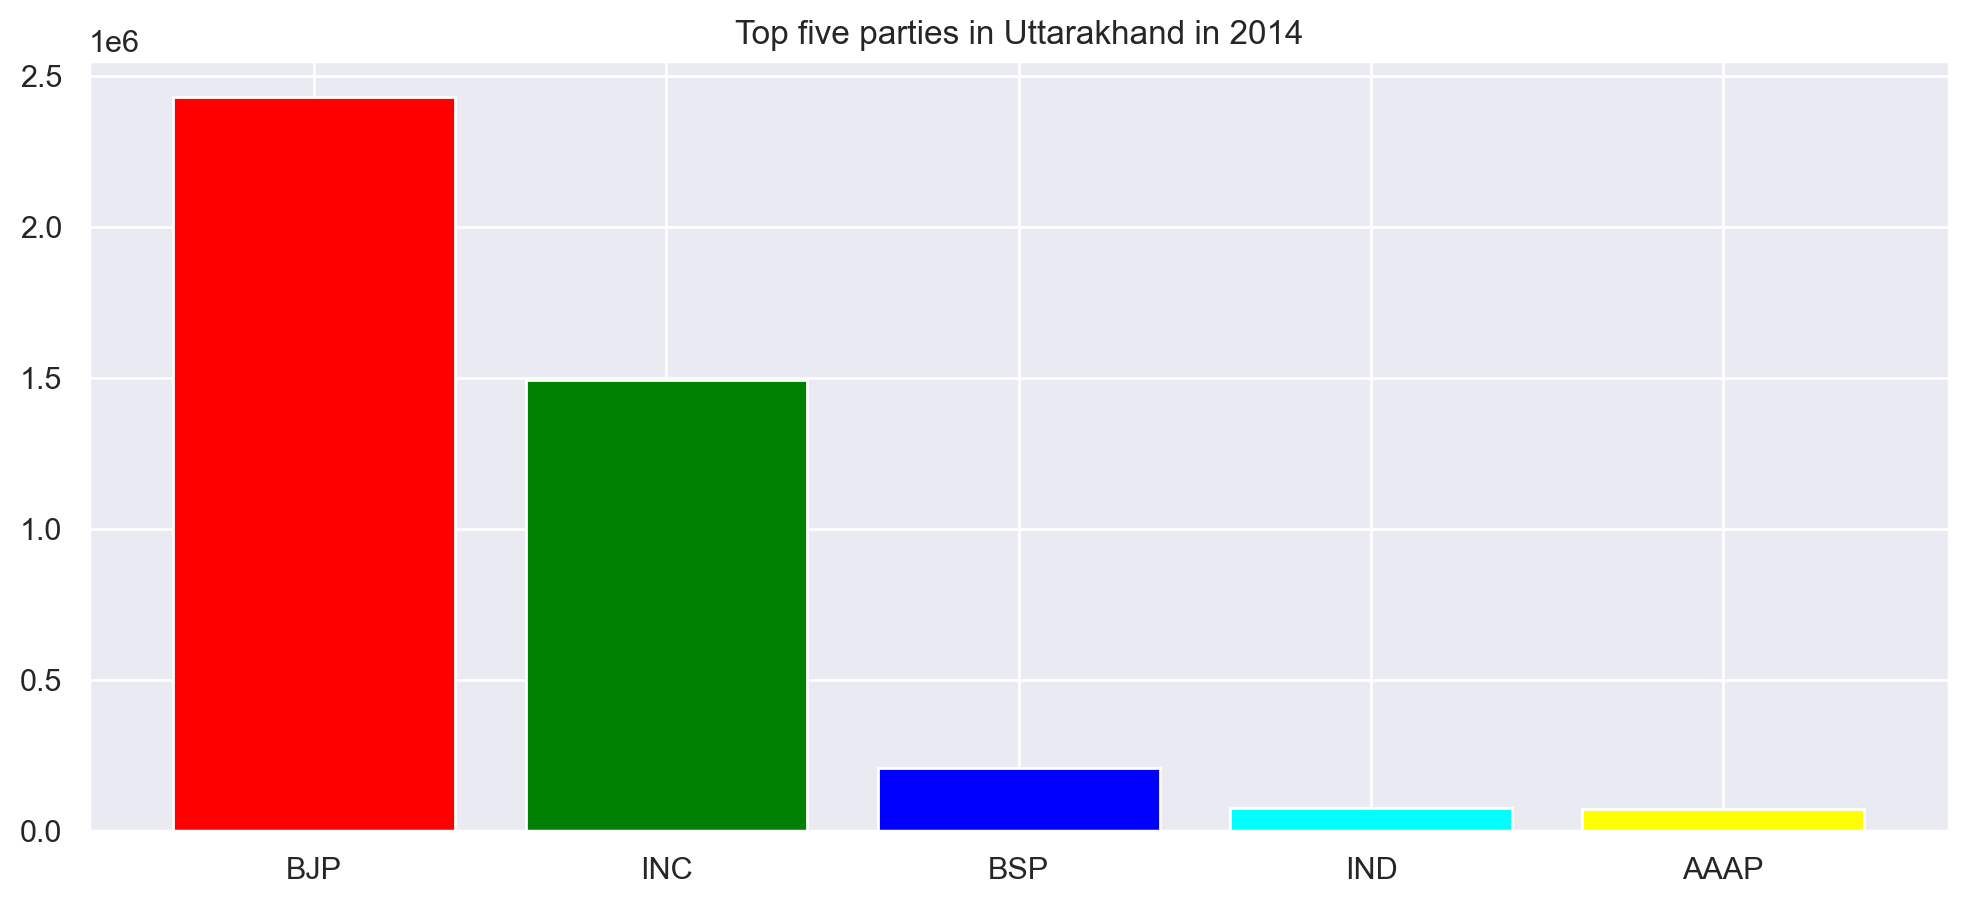

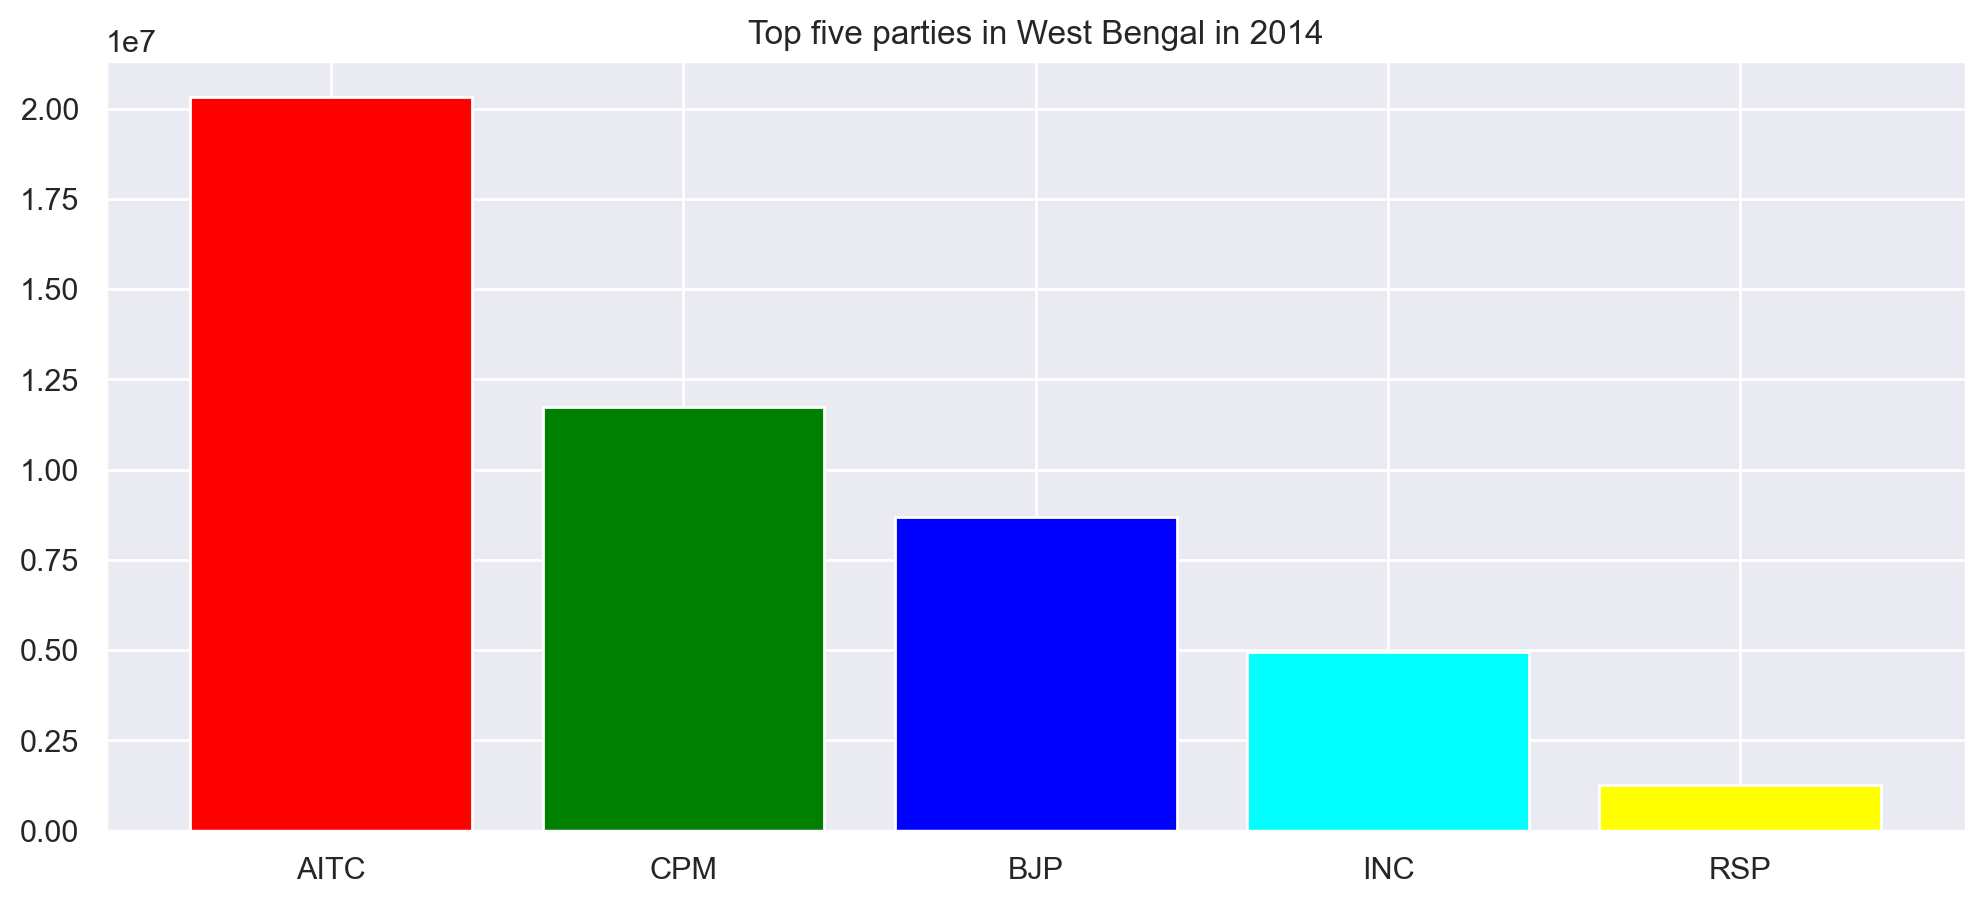

In [10]:
# states=df['st_name'].unique()
# data_2014 = national_data[national_data['year'] == 2014]
# for state in states:
#     data_2014 = data_2014[data_2014['st_name'] ==state]
#     data_2014_max_voted_party = data_2014.groupby('partyabbre')['totvotpoll'].sum()
#     data_2014_max_voted_party = pd.DataFrame(up_data_2014_max_voted_party)
#     data_2014_max_voted_party = data_2014_max_voted_party.sort_values(by= 'totvotpoll',ascending=False)
#     data_2014_top5_max_voted_party = data_2014_max_voted_party.head(5)
#     data_2014_top5_max_voted_party = data_2014_top5_max_voted_party.reset_index()

#     plt.figure(figsize = (12,5))
    
#     plt.bar(data_2014_top5_max_voted_party['partyabbre'],data_2014_top5_max_voted_party['totvotpoll'], color=[ 'red', 'green', 'blue', 'cyan', 'yellow'])
#     plt.title('top five party in '+state+ " in 2014")
#     plt.show()
states =pd.Series(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar','Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Nct Of Delhi', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
        'West Bengal'])
data_2014 = national_data[national_data['year'] == 2014]

for state in states:
    state_data_2014 = data_2014[data_2014['st_name'] == state]
    state_max_voted_party = state_data_2014.groupby('partyabbre')['totvotpoll'].sum()
    state_max_voted_party = pd.DataFrame(state_max_voted_party)
    state_max_voted_party = state_max_voted_party.sort_values(by='totvotpoll', ascending=False)
    state_top5_max_voted_party = state_max_voted_party.head(5)
    state_top5_max_voted_party = state_top5_max_voted_party.reset_index()

    plt.figure(figsize=(12, 5))
    plt.bar(state_top5_max_voted_party['partyabbre'], state_top5_max_voted_party['totvotpoll'],
            color=['red', 'green', 'blue', 'cyan', 'yellow'])
    plt.title('Top five parties in ' + state + ' in 2014')
    plt.show()


**6. What are the top 5 parties that got most votes in Maharastra** ?

In [11]:
data_2014 = national_data[national_data['year'] == 2014]
mh_data_2014 = data_2014[data_2014['st_name'] =='Maharashtra']
mh_data_2014_max_voted_party = mh_data_2014.groupby('partyabbre')['totvotpoll'].sum()
mh_data_2014_max_voted_party = pd.DataFrame(mh_data_2014_max_voted_party)
mh_data_2014_max_voted_party = mh_data_2014_max_voted_party.sort_values(by= 'totvotpoll',ascending=False)
mh_data_2014_top5_max_voted_party = mh_data_2014_max_voted_party.head(5)
mh_data_2014_top5_max_voted_party 

totvotpoll
partyabbre            
BJP           13308961
SHS           10050652
INC            8830190
NCP            7782275
IND            1577114

<BarContainer object of 5 artists>

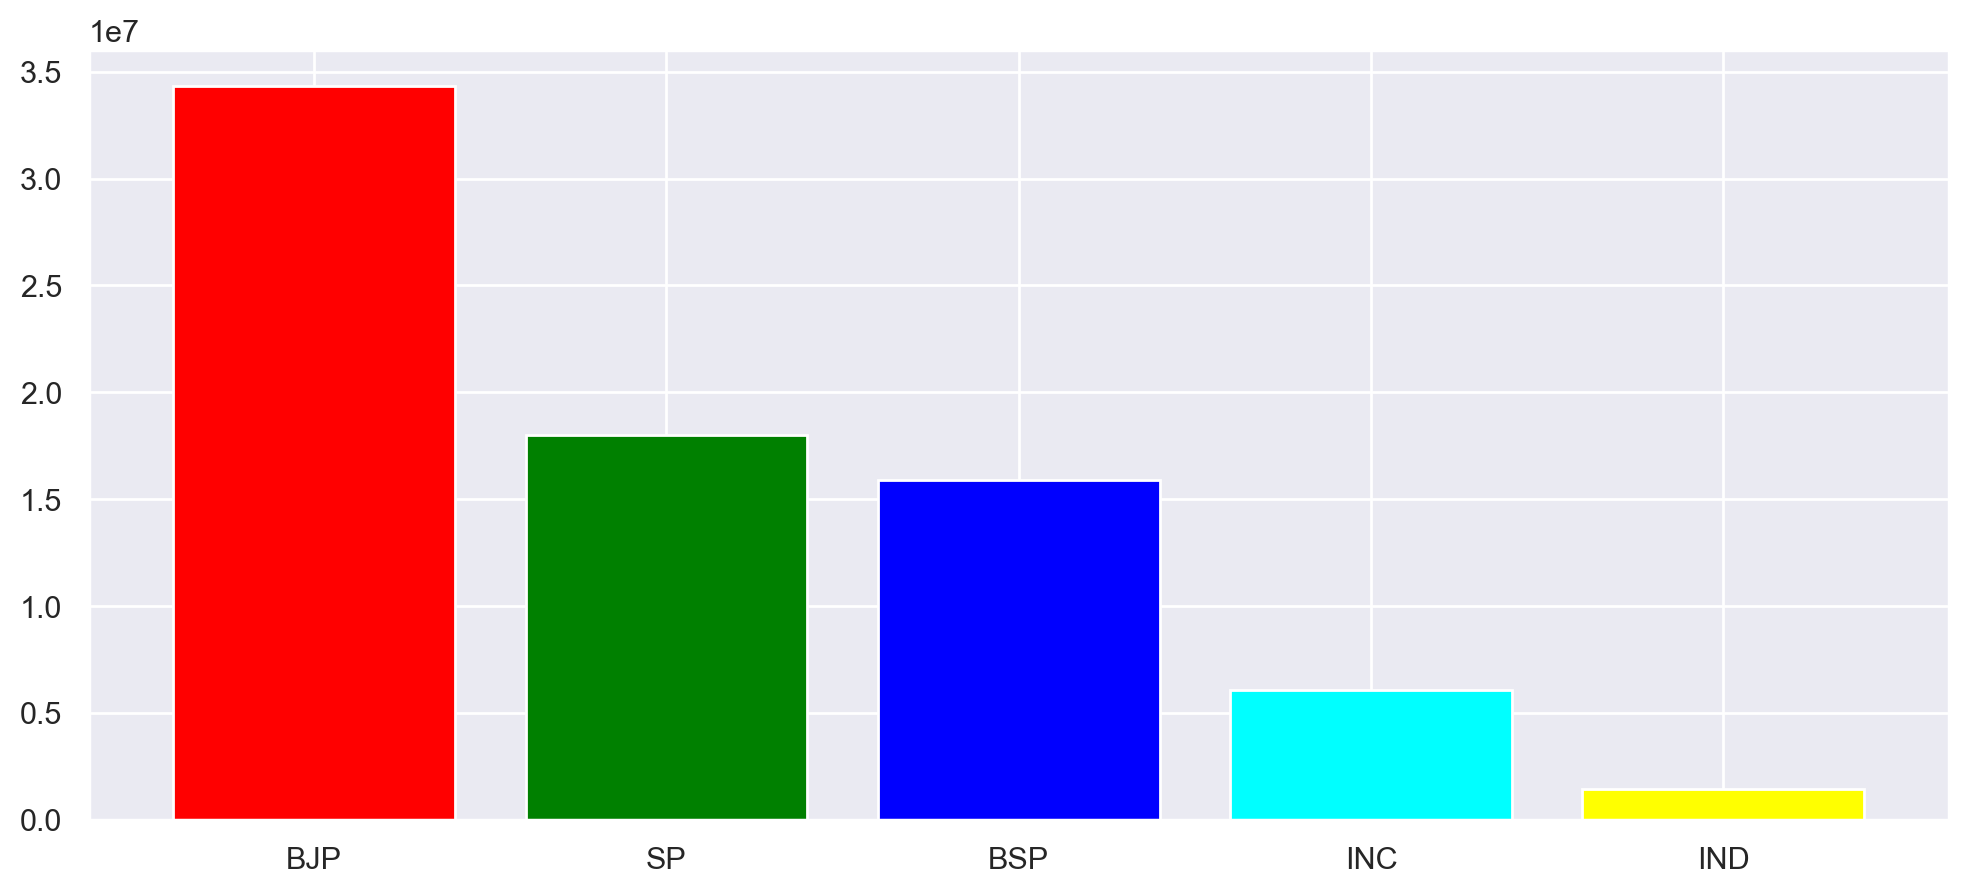

In [12]:
plt.figure(figsize = (12,5))
plt.bar(up_data_2014_top5_max_voted_party['partyabbre'],up_data_2014_top5_max_voted_party['totvotpoll'], color=[ 'red', 'green', 'blue', 'cyan', 'yellow'])

**7.  Plot the total votes corresponding to each party(top 8) for each year?**

In [13]:
yearwise_partywise_total_votes = national_data.groupby(['year','partyabbre'])['totvotpoll'].sum()
yearwise_partywise_total_votes = pd.DataFrame(yearwise_partywise_total_votes).reset_index()
years = yearwise_partywise_total_votes['year'].unique()
yearwise_partywise_total_votes_again = {}
for year in list(years):
    yearwise_partywise_total_votes_again['year_' + f'{year}'] = yearwise_partywise_total_votes[yearwise_partywise_total_votes['year'] == year].sort_values(by = 'totvotpoll',ascending= False).head(8)

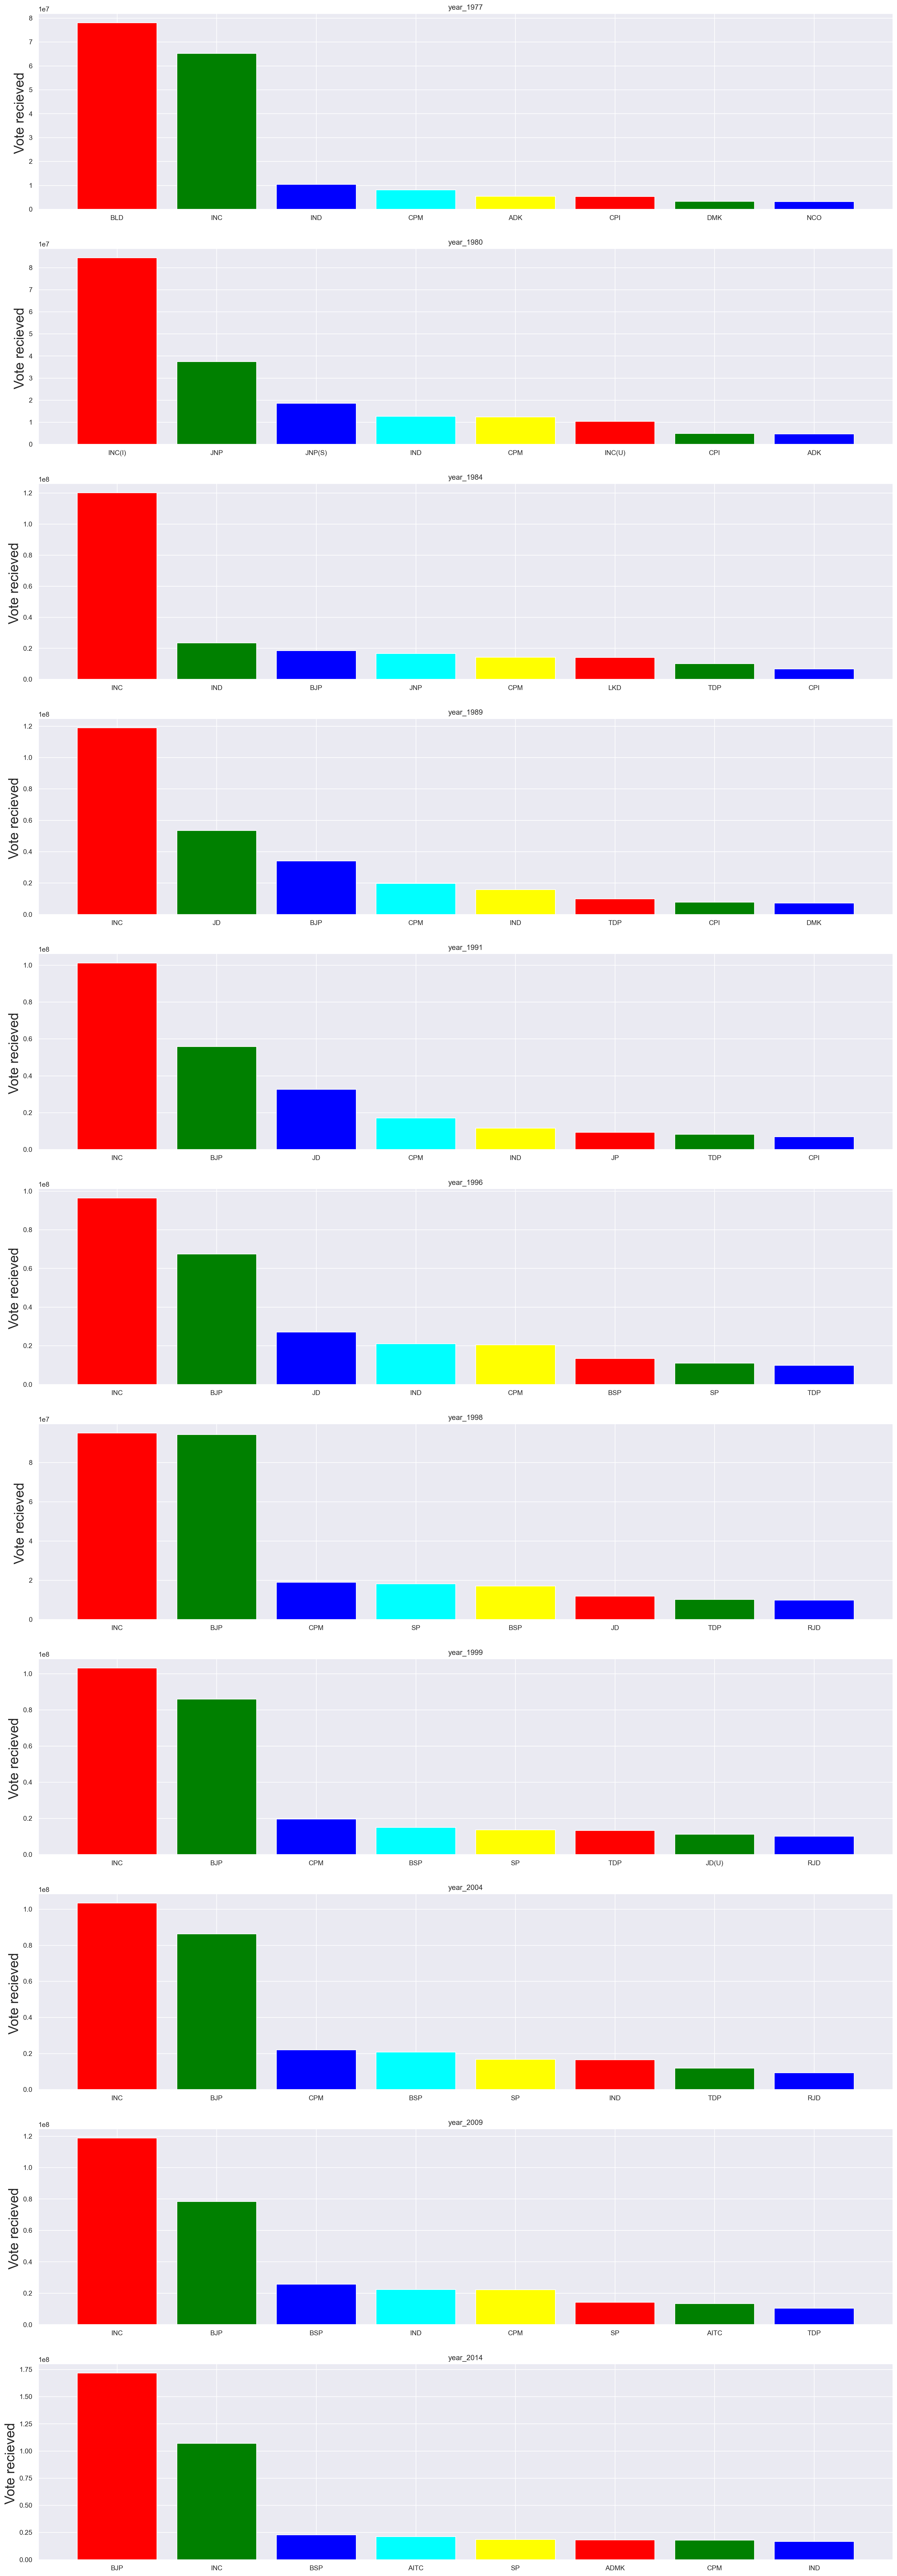

In [14]:
plt.rcParams.update({'font.size': 22})
plt.figure(figsize = (25,75))
for index,(key,value)  in enumerate(yearwise_partywise_total_votes_again.items()):
    dataframe = yearwise_partywise_total_votes_again[key]
    plt.subplot(11, 1, index+1)
    plt.bar(dataframe['partyabbre'],dataframe['totvotpoll'],color=[ 'red', 'green', 'blue', 'cyan', 'yellow'])
#     plt.plot(dataframe['partyabbre'],dataframe['totvotpoll'])
    plt.title(key)
    plt.ylabel('Vote recieved ')
    

### Total Constituencies per State

In [16]:
# Convert the 'year' column to datetime format
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Convert the 'year' column back to string format
df['year'] = df['year'].dt.strftime('%Y')

# Calculate the number of unique constituencies per state and year
constituencies_per_state_year = df.groupby(['st_name', 'year'])['pc_no'].nunique().reset_index().sort_values('pc_no', ascending=False)

# Create a dictionary to store the data for each year
data = {}
for year in sorted(df['year'].unique()):
    data[year] = constituencies_per_state_year[constituencies_per_state_year['year'] == year]

# Create the initial figure
fig = go.Figure()

# Add traces for each year
for year, year_data in data.items():
    fig.add_trace(go.Bar(
        x=year_data['st_name'],
        y=year_data['pc_no'],
        name=year
    ))

# Set up the layout
fig.update_layout(
    barmode='stack',
    showlegend=True,
    updatemenus=[
        {
            'buttons': [
                {
                    'label': 'All Years',
                    'method': 'update',
                    'args': [{'visible': [True] * len(fig.data)}, {'title': 'All Years'}]
                }
            ],
            'direction': 'down',
            'showactive': True,
            'active': 0
        }
    ]
)

# Add the JavaScript callback function for legends
buttons = []
for year in sorted(df['year'].unique()):
    visible = [False] * len(fig.data)
    visible[list(data.keys()).index(year)] = True
    buttons.append(
        dict(
            label=year,
            method='update',
            args=[{'visible': visible}, {'title': f'Year {year}'}]
        )
    )
fig.update_layout(
    updatemenus=[
        {
            'buttons': buttons,
            'direction': 'down',
            'showactive': True,
            'active': 0
        }
    ]
)


**Uttar Pradesh has the highest of constituencies.**

Text(0.5, 1.0, 'votes recieved by major parties till 2014')

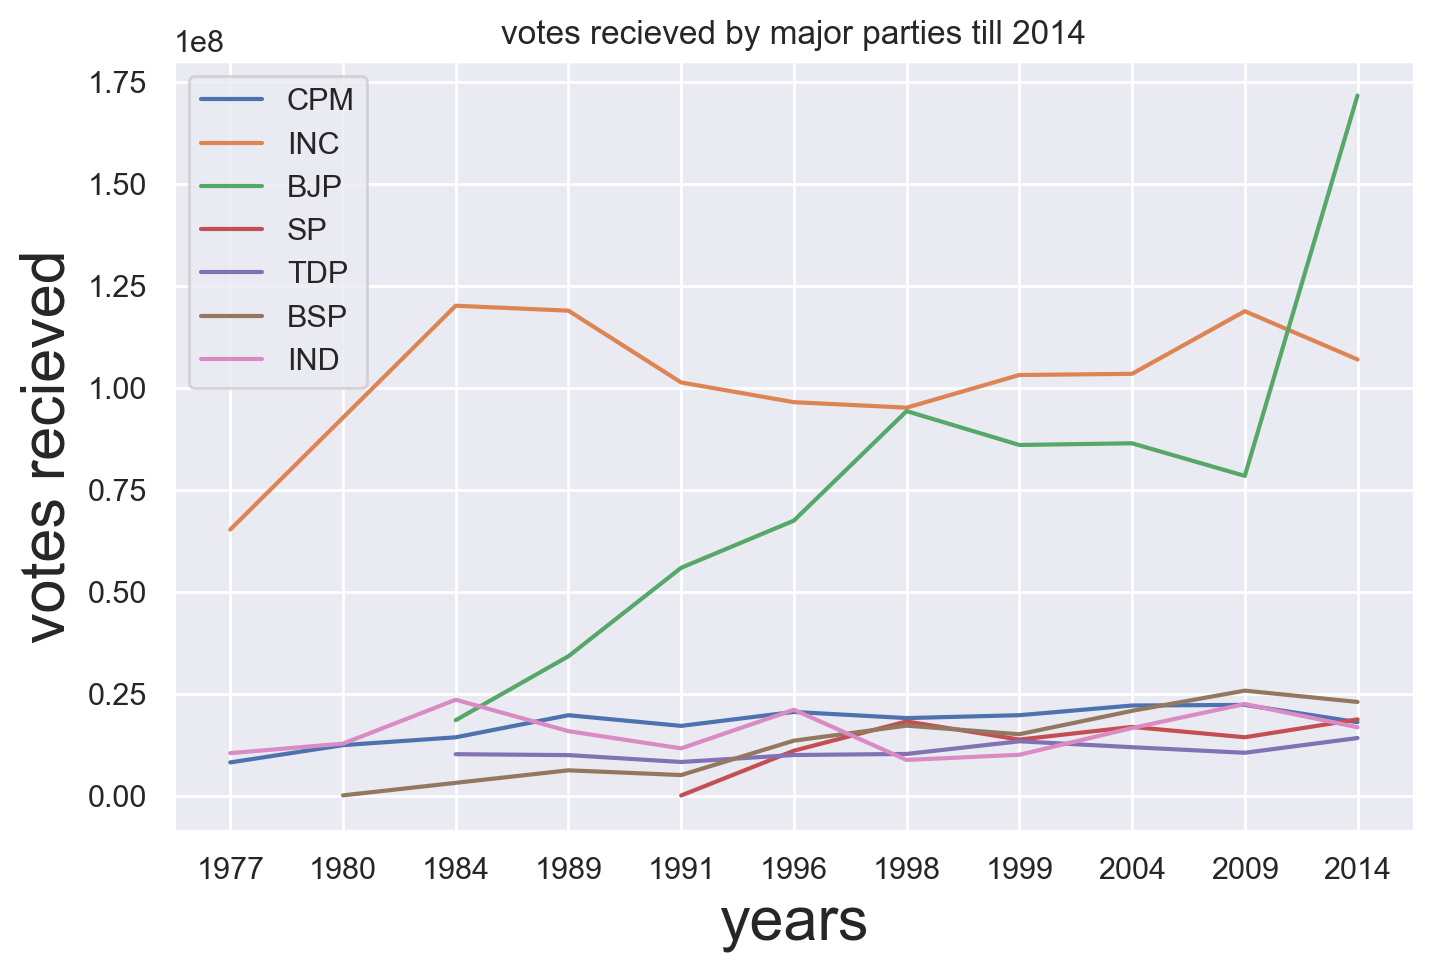

In [17]:
grouped_data=df.groupby(['year','partyabbre'])
x=grouped_data.sum()

x.describe()
data=pd.DataFrame(x).reset_index()
parties=['CPM','INC','BJP','SP','TDP','BSP','IND']
for party in parties:
    votes_per_party=data[data['partyabbre']==party]
    votes_per_party=votes_per_party[['year','totvotpoll']].sort_values(by = 'year',ascending= True)
    plt.plot(votes_per_party['year'],votes_per_party['totvotpoll'],label=party)
plt.legend()
plt.xlabel('years')
plt.ylabel('votes recieved')
plt.title('votes recieved by major parties till 2014')


# Candidates by Party

In [18]:
data=df[df['year']=='2014']
data=data.drop_duplicates();
candidates_per_party = data.partyabbre.value_counts().reset_index().rename(columns = {'index':'Party','partyabbre':'Total Candidates'}).head(20)
candidates_per_party = candidates_per_party[~((candidates_per_party['Party'] == 'BSP')|(candidates_per_party['Party'] == 'AAAP') |(candidates_per_party['Party'] == 'NOTA') | (candidates_per_party['Party'] == 'IND'))]
candidates_per_party
fig = px.bar(candidates_per_party, x='Party', y='Total Candidates', color='Total Candidates', height=500,title='total candidates by a party in 2014')
fig.show()

BJP had fielded the highest of 420 candidates whereas INC had 413 candidates.

### Partywise Vote Share

In [19]:

year=df['year'].unique()
for item in year:
    vote_share_top8 = df[df['year']==item].groupby('partyabbre')['totvotpoll'].sum().nlargest(8).index.tolist()

    def vote_share(row):
        if row['partyabbre'] not in vote_share_top8:
            return 'Other'
        else:
            return row['partyabbre']

    df['Party New'] = df.apply(vote_share, axis=1)

    counts = df[df['year']==item].groupby('Party New')['totvotpoll'].sum().sort_values(ascending=False)
    labels = counts.index
    values = counts.values

    pie = go.Pie(labels=labels, values=values, marker=dict(line=dict(color='#000000', width=1)))
    layout = go.Layout(title='Partywise Vote Share'+item)
    fig = go.Figure(data=[pie], layout=layout)
    py.iplot(fig)

From the above pie charts for diffrent years we can observe the variation of votes percentage with respect to year

### Seats Won by Party

BJP achieved a landslide victory winning 300 seats whereas INC won only 52 seats.

### Percentage of Voting by State

In [20]:
# df_voters_state = df[['year','st_name','pc_name','electors']].drop_duplicates()
df_votes_perct_constituency = df.groupby(['year','st_name','electors','pc_name']).sum().reset_index()
data=df_votes_perct_constituency.groupby(['year','st_name']).sum().reset_index()
data['percent votes']=round(data['totvotpoll']*100/data['electors'],2)
data

years=data['year'].unique()
years.sort()

for year in years:
    yearlydata=data[data['year']==year]
    fig = px.bar(yearlydata, x='st_name', y='percent votes', color='percent votes', height=500,title=year +' voting percentage in state')
    fig.show()
    

Lakshadweep witnessed highest percentage of voting whereas voting was least in Jammu & Kashmir.

### Total Voters by State

In [21]:
for year in years:
    yearlydata=data[data['year']==year]
    fig = px.bar(yearlydata, x='st_name', y='electors', color='electors', height=500,title=year +' total eligible voters in state')
    fig.show()

Utatr Pradesh has highest number of people who are eligible for voting.

### Reservations

In India, reservations exist in almost every field. Entire political game runs on the basis of religion,caste and all other forms of reservations.

In [22]:
for year in years:
    yearlydata=df[df['year']==year]
    df_category = yearlydata['pc_type'].value_counts().reset_index()
    df_category.columns = ['pc_type','COUNT']
    fig = px.bar(df_category, x='pc_type', y='COUNT', color='pc_type', height=500,title=year+" candidates category wise")
    fig.show()

### Gender of Candidates

In [23]:
for year in years:
    yearlydata=df[df['year']==year]
    df_gender = yearlydata['cand_sex'].value_counts().reset_index()
    df_gender.columns = ['cand_sex','COUNT']
    pie = go.Pie(labels=df_gender['cand_sex'], values=df_gender['COUNT'], marker=dict(line=dict(color='black', width=1)))
    layout = go.Layout(title='yearly Male vs Female Ratio - All Candidates '+year)
    fig = go.Figure(data=[pie], layout=layout)
    py.iplot(fig)

**Adding a new column winner, win=1,defeat=0**

In [24]:
df=national_data
df['winner'] = df.groupby(['year', 'pc_name'])['totvotpoll'].transform(max) == df['totvotpoll']
df['winner'] = df['winner'].astype(int)
df.head()

st_name  year  pc_no                    pc_name pc_type  \
0  Andaman & Nicobar Islands  1977      1  Andaman & Nicobar Islands     GEN   
1  Andaman & Nicobar Islands  1977      1  Andaman & Nicobar Islands     GEN   
2  Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   
3  Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   
4  Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   

           cand_name cand_sex                 partyname partyabbre  \
0        K.R. Ganesh        M              Independents        IND   
1  Manoranjan Bhakta        M  Indian National Congress        INC   
2    Ramesh Mazumdar        M              Independents        IND   
3      Alagiri Swamy        M              Independents        IND   
4        Kannu Chemy        M              Independents        IND   

   totvotpoll  electors  winner  
0       25168     85308       0  
1       35400     85308       1  
2         109     96084       0  
3         125     96084       0  
4         405     96084       0

### Gender of Winning Candidates

In [25]:
for year in years:
    df_gender_won =df[df['year']==int(year)]
    df_gender_won =df_gender_won[df_gender_won['winner'] == 1]
    df_gender_won = df_gender_won['cand_sex'].value_counts().reset_index()
    df_gender_won.columns = ['cand_sex','COUNT']
    pie = go.Pie(labels=df_gender_won['cand_sex'], values=df_gender_won['COUNT'], marker=dict(line=dict(color='black', width=1)))
    layout = go.Layout(title='Male vs Female Ratio - Winners '+year)
    fig = go.Figure(data=[pie], layout=layout)
    py.iplot(fig)

There is very clear gap between number of male & female representatives in the assembly.

# Winner Prediction Using Random Forest

### national election 2019 data processing

In [26]:
df19=pd.read_csv('./LS_2.0.csv')

In [27]:
df19.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'SYMBOL', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [28]:
columns_to_drop=['SYMBOL','CRIMINAL\nCASES','EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'POSTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY','AGE']

In [29]:
df.columns

Index(['st_name', 'year', 'pc_no', 'pc_name', 'pc_type', 'cand_name',
       'cand_sex', 'partyname', 'partyabbre', 'totvotpoll', 'electors',
       'winner'],
      dtype='object')

In [30]:
df19=df19.drop(columns_to_drop,axis=1)

In [31]:
new_column_names = {'STATE':'st_name','CONSTITUENCY':'pc_name','NAME':'cand_name','PARTY':'partyabbre','GENDER':'cand_sex','CATEGORY':'pc_type','TOTAL\nVOTES':'totvotpoll','TOTAL ELECTORS':'electors','WINNER':'winner'}
df19 = df19.rename(columns=new_column_names)

In [32]:
df19.columns

Index(['st_name', 'pc_name', 'cand_name', 'winner', 'partyabbre', 'cand_sex',
       'pc_type', 'totvotpoll', 'electors'],
      dtype='object')

In [33]:
df19['year']=2019

In [34]:
df19.loc[df19['st_name'] == 'NCT OF Delhi', 'st_name'] ='Nct Of Delhi'
states=df19['st_name'].unique()
states=np.sort(states)
states

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Nct Of Delhi',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [35]:
st=df['st_name'].unique()
st

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Nct Of Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'], dtype=object)

In [36]:
missing_columns = df19.isnull().sum()
# Get the number of columns that are not available
num_missing_columns = missing_columns[missing_columns > 0].count()

print("Number of columns with missing values:", num_missing_columns)

Number of columns with missing values: 2


In [37]:
# Count the number of missing values in each column
num_missing_values = df19.isna().sum()

print("Number of missing values in each column:")
print(num_missing_values)


Number of missing values in each column:
st_name         0
pc_name         0
cand_name       0
winner          0
partyabbre      0
cand_sex      245
pc_type       245
totvotpoll      0
electors        0
year            0
dtype: int64


In [38]:
df_cleaned = df19.dropna()

In [39]:
num_missing_values = df_cleaned.isna().sum()

print("Number of missing values in each column:")
print(num_missing_values)

Number of missing values in each column:
st_name       0
pc_name       0
cand_name     0
winner        0
partyabbre    0
cand_sex      0
pc_type       0
totvotpoll    0
electors      0
year          0
dtype: int64


In [40]:
df19=df_cleaned

In [41]:
df.head()

st_name  year  pc_no                    pc_name pc_type  \
0  Andaman & Nicobar Islands  1977      1  Andaman & Nicobar Islands     GEN   
1  Andaman & Nicobar Islands  1977      1  Andaman & Nicobar Islands     GEN   
2  Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   
3  Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   
4  Andaman & Nicobar Islands  1980      1  Andaman & Nicobar Islands     GEN   

           cand_name cand_sex                 partyname partyabbre  \
0        K.R. Ganesh        M              Independents        IND   
1  Manoranjan Bhakta        M  Indian National Congress        INC   
2    Ramesh Mazumdar        M              Independents        IND   
3      Alagiri Swamy        M              Independents        IND   
4        Kannu Chemy        M              Independents        IND   

   totvotpoll  electors  winner  
0       25168     85308       0  
1       35400     85308       1  
2         109     96084       0  
3         125     96084       0  
4         405     96084       0

### result prediction for 2014

In [42]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from joblib import dump, load

# Read the dataset
# df = pd.read_csv('./indian_national_level_election.csv')

# Filter the relevant columns for training
train_columns = ['st_name', 'year', 'partyabbre', 'totvotpoll', 'electors', 'pc_name','cand_name','winner']
train_data = df[train_columns].copy()

# Convert 'year' column to categorical
train_data['year'] = train_data['year'].astype('category')

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Perform ordinal encoding for categorical variables
categorical_columns = ['st_name', 'partyabbre', 'pc_name', 'year','cand_name']
encoded_data_train = train_data.copy()
encoded_data_train[categorical_columns] = ordinal_encoder.fit_transform(train_data[categorical_columns])

# Prepare the input features and target variable for training
X_train = encoded_data_train.drop('winner', axis=1)
y_train = encoded_data_train['winner']

# Define the years for training in phases
start_year = 0
end_year = 11
year_step = 1

##############              TEST DATA PREPARATION          ################################

# Filter the relevant columns for testing
test_columns = ['st_name', 'year', 'partyabbre', 'totvotpoll', 'electors', 'pc_name','cand_name','winner']
test_data = df[test_columns].copy()

# Convert 'year' column to categorical
test_data['year'] = test_data['year'].astype('category')

# Perform ordinal encoding for categorical variables on the test data
encoded_data_test = test_data.copy()
encoded_data_test[categorical_columns] = ordinal_encoder.transform(test_data[categorical_columns])

# Prepare the test data for the selected year (2014)
test_data_2014 = encoded_data_test[encoded_data_test['year'] == 10.0]
X_test_2014 = test_data_2014.drop('winner', axis=1)
y_test_2014 = test_data_2014['winner']

##################### END TEST DATA ########################################

# Initialize the model
model = RandomForestClassifier()
# X_test_2014
# Train the model in phases
for year in range(start_year, end_year, year_step):
    # Filter the data for the current phase
    
    phase_data = encoded_data_train[encoded_data_train['year'] == float(year)]
    # Check if the current phase has any data points
    if phase_data.shape[0] == 0:
        print(f"No data available for phase {1977+year*5}")
        continue

    # Prepare the input features and target variable for the current phase
    X_phase = phase_data.drop('winner', axis=1)
    y_phase = phase_data['winner']

    # Train the model on the current phase
    model.fit(X_phase, y_phase)

    # Save the trained model for the current phase
    model_filename = f'model_phase_{1977+year*5}.joblib'
    dump(model, model_filename)

    # Print information about the current phase
    print(f"Trained model for phase {year} saved as {model_filename}")

    # Make predictions on the 2014 test data
    predictions_2014 = model.predict(X_test_2014)
    print('predictions_2014 ',predictions_2014,predictions_2014.shape)
    # Evaluate the model performance for 2014
    mse_2014 = mean_squared_error(y_test_2014, predictions_2014)
    rmse_2014 = np.sqrt(mse_2014)
    print(f"Testing performance for 2014 data: RMSE = {rmse_2014}")
    # Calculate accuracy for the overall results
    accuracy = 100 * (1 - abs(predictions_2014 - y_test_2014) / y_test_2014.mean())
    overall_accuracy = accuracy.mean()
    print(f"Overall accuracy: {overall_accuracy:.2f}%")


Trained model for phase 0 saved as model_phase_1977.joblib
predictions_2014  [0 0 0 ... 1 1 1] (8794,)
Testing performance for 2014 data: RMSE = 0.26337326451487736
Overall accuracy: -12.96%
Trained model for phase 1 saved as model_phase_1982.joblib
predictions_2014  [0 0 0 ... 1 1 1] (8794,)
Testing performance for 2014 data: RMSE = 0.2741621511969973
Overall accuracy: -22.41%
Trained model for phase 2 saved as model_phase_1987.joblib
predictions_2014  [0 0 0 ... 0 0 1] (8794,)
Testing performance for 2014 data: RMSE = 0.23653168234367913
Overall accuracy: 8.89%
Trained model for phase 3 saved as model_phase_1992.joblib
predictions_2014  [0 0 0 ... 0 1 1] (8794,)
Testing performance for 2014 data: RMSE = 0.1954683324776471
Overall accuracy: 37.78%
Trained model for phase 4 saved as model_phase_1997.joblib
predictions_2014  [0 0 0 ... 0 1 1] (8794,)
Testing performance for 2014 data: RMSE = 0.22266400379360632
Overall accuracy: 19.26%
Trained model for phase 5 saved as model_phase_2002

### result prediction for 2019 

In [43]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from joblib import dump, load

# Read the dataset
# df = pd.read_csv('./indian_national_level_election.csv')

# Filter the relevant columns for training
train_columns = ['st_name', 'year', 'partyabbre', 'totvotpoll', 'electors', 'pc_name','cand_name','winner']
train_data = df[train_columns].copy()

# Convert 'year' column to categorical
train_data['year'] = train_data['year'].astype('category')

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Perform ordinal encoding for categorical variables
categorical_columns = ['st_name', 'partyabbre', 'pc_name', 'year','cand_name']
encoded_data_train = train_data.copy()
encoded_data_train[categorical_columns] = ordinal_encoder.fit_transform(train_data[categorical_columns])

# Prepare the input features and target variable for training
X_train = encoded_data_train.drop('winner', axis=1)
y_train = encoded_data_train['winner']

# Define the years for training in phases
start_year = 0
end_year = 11
year_step = 1

##############              TEST DATA PREPARATION          ################################
# df19.dtypes

# Filter the relevant columns for testing
test_columns = ['st_name', 'year', 'partyabbre', 'totvotpoll', 'electors', 'pc_name', 'cand_name', 'winner']
test_data = df19[test_columns].copy()

# Convert 'year' column to categorical
test_data['year'] = test_data['year'].astype('category')

# Perform ordinal encoding for categorical variables on the test data
encoded_data_test = test_data.copy()

# Initialize a new OrdinalEncoder
ordinal_encoder_test = OrdinalEncoder()

# Fit and transform the categorical columns in the test data
encoded_data_test[categorical_columns] = ordinal_encoder_test.fit_transform(test_data[categorical_columns])

encoded_data_test

# Prepare the test data for the selected year (2014)
test_data_2014 = encoded_data_test[encoded_data_test['year'] == 0.0]
X_test_2014 = test_data_2014.drop('winner', axis=1)
y_test_2014 = test_data_2014['winner']

##################### PREPARATION END ON TEST DATA ########################################


# Initialize the model
model = RandomForestClassifier()

# encoded_data_train.dtypes
# type(year)
# encoded_data_train
# encoded_data_train['year'].unique()

# X_test_2014
# Train the model in phases
for year in range(start_year, end_year, year_step):
    # Filter the data for the current phase
    
    phase_data = encoded_data_train[encoded_data_train['year'] == float(year)]
    # Check if the current phase has any data points
    if phase_data.shape[0] == 0:
        print(f"No data available for phase {year}")
        continue

    # Prepare the input features and target variable for the current phase
    X_phase = phase_data.drop('winner', axis=1)
    y_phase = phase_data['winner']

    # Train the model on the current phase
    model.fit(X_phase, y_phase)

    # Save the trained model for the current phase
    model_filename = f'model_phase_{year}.joblib'
    dump(model, model_filename)

    # Print information about the current phase
    print(f"Trained model for phase {year} saved as {model_filename}")

    # Make predictions on the 2014 test data
    predictions_2014 = model.predict(X_test_2014)
    print('predictions_2014 ',predictions_2014,predictions_2014.shape)
    # Evaluate the model performance for 2014
    mse_2014 = mean_squared_error(y_test_2014, predictions_2014)
    rmse_2014 = np.sqrt(mse_2014)
    print(f"Testing performance for 2014 data: RMSE = {rmse_2014}")
    # Calculate accuracy for the overall results
    accuracy = 100 * (1 - abs(predictions_2014 - y_test_2014) / y_test_2014.mean())
    overall_accuracy = accuracy.mean()
    print(f"Overall accuracy: {overall_accuracy:.2f}%")


Trained model for phase 0 saved as model_phase_0.joblib
predictions_2014  [1 1 1 ... 1 1 0] (2018,)
Testing performance for 2014 data: RMSE = 0.530534446394109
Overall accuracy: -5.38%
Trained model for phase 1 saved as model_phase_1.joblib
predictions_2014  [1 0 1 ... 0 0 0] (2018,)
Testing performance for 2014 data: RMSE = 0.5153731797160811
Overall accuracy: 0.56%
Trained model for phase 2 saved as model_phase_2.joblib
predictions_2014  [1 1 1 ... 1 1 0] (2018,)
Testing performance for 2014 data: RMSE = 0.5168134429239605
Overall accuracy: -0.00%
Trained model for phase 3 saved as model_phase_3.joblib
predictions_2014  [1 1 1 ... 1 1 0] (2018,)
Testing performance for 2014 data: RMSE = 0.49826259092407355
Overall accuracy: 7.05%
Trained model for phase 4 saved as model_phase_4.joblib
predictions_2014  [1 1 1 ... 1 1 0] (2018,)
Testing performance for 2014 data: RMSE = 0.526314485419072
Overall accuracy: -3.71%
Trained model for phase 5 saved as model_phase_5.joblib
predictions_2014 

### more on predictions

In [46]:
# Importing the required libraries
import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

try:
    # Reading the data into a pandas DataFrame
    data = pd.read_csv('./indian_national_level_election.csv')
    data1 = df19
    data1['year'] = 2019
    # Filtering the data for training and testing
    
    train_data = data[data['year'].between(2014,2014)]
    test_data = data1[data1['year'] == 2019]

    # Preparing the features and target variables for training
    train_features = train_data[['st_name',  'pc_name', 'pc_type', 'partyabbre']]
    train_target = train_data['totvotpoll']

    # Preparing the features and target variables for testing
    test_features = test_data[['st_name',  'pc_name', 'pc_type', 'partyabbre']]
    test_target = test_data['totvotpoll']

    # Encoding categorical variables using One-Hot Encoding
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    train_features_encoded = encoder.fit_transform(train_features)
    test_features_encoded = encoder.transform(test_features)
    encoded_columns = encoder.get_feature_names_out(train_features.columns)
    train_features_encoded_df = pd.DataFrame(train_features_encoded, columns=encoded_columns)
    test_features_encoded_df = pd.DataFrame(test_features_encoded, columns=encoded_columns)

    # Creating and training the Random Forest model
    model = RandomForestClassifier();
    model.fit(train_features_encoded_df, train_target)

    # Making predictions on the test set
    predictions = model.predict(test_features_encoded_df)

    # Evaluating the accuracy of the model
    r2 = r2_score(test_target, predictions)
    print('Accuracy:', r2)

except KeyError as e:
    print("KeyError:", str(e))

MemoryError: could not allocate 445251584 bytes

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from pyswarms.single.global_best import GlobalBestPSO

# Define the fitness function for PSO
def fitness_function(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    min_samples_split = int(params[2])
    min_samples_leaf = int(params[3])

    # Create the Random Forest Classifier with the given hyperparameters
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    predictions = model.predict(X_test_2014)

    # Calculate the mean squared error (MSE)
    mse = mean_squared_error(y_test_2014, predictions)

    # Return the negative MSE as the fitness value (since PSO minimizes the objective function)
    return -mse

# Define the bounds for each hyperparameter
bounds = (np.array([10, 2, 2, 1]), np.array([100, 20, 10, 5]))

# Define the number of particles and iterations for PSO
num_particles = 10
num_iterations = 50

# Create the optimizer instance
optimizer = GlobalBestPSO(n_particles=num_particles, dimensions=4, bounds=bounds)

# Perform the optimization
best_params, _ = optimizer.optimize(fitness_function, iters=num_iterations)

# Print the best parameters found by PSO
print("Best Parameters:")
print("n_estimators =", int(best_params[0]))
print("max_depth =", int(best_params[1]))
print("min_samples_split =", int(best_params[2]))
print("min_samples_leaf =", int(best_params[3]))

# Create the Random Forest Classifier with the best parameters
best_model = RandomForestClassifier(n_estimators=int(best_params[0]),
                                    max_depth=int(best_params[1]),
                                    min_samples_split=int(best_params[2]),
                                    min_samples_leaf=int(best_params[3]))

# Train the model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = best_model.predict(X_test_2014)

# Calculate the mean squared error (MSE) and accuracy
mse = mean_squared_error(y_test_2014, predictions)
accuracy = 100 * (1 - abs(predictions - y_test_2014) / y_test_2014.mean())
overall_accuracy = accuracy.mean()

# Print the evaluation metrics
print("Testing performance for 2014 data:")
print("MSE =", mse)
print("Overall accuracy =", overall_accuracy)
